In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My\ Drive/Colab\ Notebooks/GridlabD_LSTM_1

Mounted at /content/drive
/content/drive/My Drive/Colab Notebooks/GridlabD_LSTM_1


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Not connected to a GPU


In [ ]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

In [ ]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


In [ ]:
mypath=%pwd

In [ ]:
from os import listdir
from os.path import isfile, join
filenames=onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]##       equla to %ls

#Pre_Process



##Importing liberaris

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#pip install tensorflow_gpu

In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf

## keras
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers import TimeDistributed
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint
### from keras.layers.normalization import BatchNormalization
from time import time
from keras.layers.advanced_activations import LeakyReLU, PReLU, ReLU
from keras.layers import Bidirectional
from keras.layers import Input,Dropout
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

import matplotlib as mpl
##############################################################from mpl_toolkits.mplot3d import Axes3D
##############################################################import seaborn as sns
##############################################################
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
##############################################################from tqdm import tqdm
##############################################################
##############################################################
from numpy import nan
import numpy as np
import numpy as num
import pandas as pd
from pandas import Series

##############################################################import tensorflow as tf
##############################################################from tensorflow.python.client import device_lib
##############################################################
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter  # useful for logit scale
from matplotlib.ticker import MaxNLocator
##############################################################
##############################################################
##############################################################
import time
import math
#import sympy as sym
import io
from PIL import Image, ImageDraw
#from google.colab import files
from livelossplot import PlotLossesKeras
import subprocess
import datetime
from datetime import date
import dateutil.parser

import os

import joblib

In [ ]:
#from keras.optimizers import Adam, RMSprop, Nadam
from tensorflow.keras.optimizers import Adam, SGD, Nadam

In [ ]:
### from keras.layers.normalization import BatchNormalization
from tensorflow.keras.layers import BatchNormalization

In [ ]:
from tensorflow.keras import optimizers



##Dataset Preparation/ 21Years_IEEE13_Home_1_HVAC

###General for all

In [ ]:
pwd

'/content/drive/My Drive/Colab Notebooks/GridlabD_LSTM_1'

In [ ]:
%cd /content/drive/My\ Drive/Colab\ Notebooks/GridlabD_LSTM_1


/content/drive/My Drive/Colab Notebooks/GridlabD_LSTM_1


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#table3=table2=table1= table=pd.read_csv(io.StringIO(uploaded['21final_Seperate_105Homes_real_power_interval_60_SET_off.csv'].decode('utf-8')), skiprows=8)
tableuploaded=uploaded=df = pd.read_csv("U7_IEEE13_Home_12_HVAC_Year_21Yers.csv", skiprows=8)

#tableuploaded['House_1_Aparant_energy']=tableuploaded['measured_real_energy']+tableuploaded['measured_reactive_energy']## assumption cos=1

tableuploaded=tableuploaded.rename(columns={'# timestamp': "Timestamp", "energy": "House_1_HVAC_energy"})
tableuploaded = pd.DataFrame(tableuploaded)

In [ ]:
print(tableuploaded.shape)
tableuploaded.head()

(11570400, 18)


Timestamp  hvac_load House_1_HVAC_energy  heating_setpoint  \
0  2000-01-01 00:00:00 PST        0.0               +0+0i                72   
1  2000-01-01 00:01:00 PST        0.0               +0+0i                72   
2  2000-01-01 00:02:00 PST        0.0               +0+0i                72   
3  2000-01-01 00:03:00 PST        0.0               +0+0i                72   
4  2000-01-01 00:04:00 PST        0.0               +0+0i                72   

   cooling_setpoint  mass_temperature   air_temperature  outdoor_temperature  \
0                79           72.4301           72.4301               28.942   
1                79           72.4254           72.0956               28.942   
2                79           72.4091           71.8104               28.942   
3                79           72.3835           71.5655               28.942   
4                79           72.3502           71.3535               28.942   

  system_mode  thermostat_deadband  aux_heat_deadband  floor_area  \
0         OFF                    2                  2        2022   
1         OFF                    2                  2        2022   
2         OFF                    2                  2        2022   
3         OFF                    2                  2        2022   
4         OFF                    2                  2        2022   

   number_of_doors  number_of_stories  window_wall_ratio   heating_COP  \
0                4                  1            0.07575             4   
1                4                  1            0.07575             4   
2                4                  1            0.07575             4   
3                4                  1            0.07575             4   
4                4                  1            0.07575             4   

    cooling_COP  aux_heat_temperature_lockout  
0             4                            10  
1             4                            10  
2             4                            10  
3             4                            10  
4             4                            10

In [ ]:
print(tableuploaded.shape)
#tableuploaded.tail()

(11570400, 18)


In [ ]:
## Modify data i ----> j
tableuploaded['House_1_HVAC_energy'] = tableuploaded['House_1_HVAC_energy'].str.replace('i','j').apply(lambda x: np.complex(x))
print(tableuploaded.shape)
tableuploaded.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


(11570400, 18)


Timestamp  hvac_load  House_1_HVAC_energy  heating_setpoint  \
0  2000-01-01 00:00:00 PST        0.0             0.0+0.0j                72   
1  2000-01-01 00:01:00 PST        0.0             0.0+0.0j                72   
2  2000-01-01 00:02:00 PST        0.0             0.0+0.0j                72   
3  2000-01-01 00:03:00 PST        0.0             0.0+0.0j                72   
4  2000-01-01 00:04:00 PST        0.0             0.0+0.0j                72   

   cooling_setpoint  mass_temperature   air_temperature  outdoor_temperature  \
0                79           72.4301           72.4301               28.942   
1                79           72.4254           72.0956               28.942   
2                79           72.4091           71.8104               28.942   
3                79           72.3835           71.5655               28.942   
4                79           72.3502           71.3535               28.942   

  system_mode  thermostat_deadband  aux_heat_deadband  floor_area  \
0         OFF                    2                  2        2022   
1         OFF                    2                  2        2022   
2         OFF                    2                  2        2022   
3         OFF                    2                  2        2022   
4         OFF                    2                  2        2022   

   number_of_doors  number_of_stories  window_wall_ratio   heating_COP  \
0                4                  1            0.07575             4   
1                4                  1            0.07575             4   
2                4                  1            0.07575             4   
3                4                  1            0.07575             4   
4                4                  1            0.07575             4   

    cooling_COP  aux_heat_temperature_lockout  
0             4                            10  
1             4                            10  
2             4                            10  
3             4                            10  
4             4                            10

In [ ]:
#seperate Real and Imag
tableuploaded['House_1_HVAC_energy_imag'] = np.imag(tableuploaded.House_1_HVAC_energy)
tableuploaded['House_1_HVAC_energy_real'] = np.real(tableuploaded.House_1_HVAC_energy)

In [ ]:
tableuploaded_for_Modification=tableuploaded

Variable_name_1="Timestamp"
Variable_name_2='mass_temperature'
Variable_name_3=' air_temperature'
Variable_name_4='outdoor_temperature'
Variable_name_5="House_1_HVAC_energy_imag"
Variable_name_6="House_1_HVAC_energy_real"
Variable_name_7='House_1_HVAC_energy'

In [ ]:
tableuploaded_1 = tableuploaded['Timestamp'].str.split(n=2, expand=True)
tableuploaded_2=tableuploaded_1.rename(columns={0: "day", 1: "time", 2: "zone"})
tableuploaded['Timestamp']=tableuploaded_2['day'] + ' ' + tableuploaded_2['time']
tableuploaded_3=tableuploaded.rename(columns={'Timestamp': "data_time"})

In [ ]:
print(tableuploaded_3.shape)
tableuploaded_3.head()

(11570400, 20)


data_time  hvac_load  House_1_HVAC_energy  heating_setpoint  \
0  2000-01-01 00:00:00        0.0             0.0+0.0j                72   
1  2000-01-01 00:01:00        0.0             0.0+0.0j                72   
2  2000-01-01 00:02:00        0.0             0.0+0.0j                72   
3  2000-01-01 00:03:00        0.0             0.0+0.0j                72   
4  2000-01-01 00:04:00        0.0             0.0+0.0j                72   

   cooling_setpoint  mass_temperature   air_temperature  outdoor_temperature  \
0                79           72.4301           72.4301               28.942   
1                79           72.4254           72.0956               28.942   
2                79           72.4091           71.8104               28.942   
3                79           72.3835           71.5655               28.942   
4                79           72.3502           71.3535               28.942   

  system_mode  thermostat_deadband  aux_heat_deadband  floor_area  \
0         OFF                    2                  2        2022   
1         OFF                    2                  2        2022   
2         OFF                    2                  2        2022   
3         OFF                    2                  2        2022   
4         OFF                    2                  2        2022   

   number_of_doors  number_of_stories  window_wall_ratio   heating_COP  \
0                4                  1            0.07575             4   
1                4                  1            0.07575             4   
2                4                  1            0.07575             4   
3                4                  1            0.07575             4   
4                4                  1            0.07575             4   

    cooling_COP  aux_heat_temperature_lockout  House_1_HVAC_energy_imag  \
0             4                            10                       0.0   
1             4                            10                       0.0   
2             4                            10                       0.0   
3             4                            10                       0.0   
4             4                            10                       0.0   

   House_1_HVAC_energy_real  
0                       0.0  
1                       0.0  
2                       0.0  
3                       0.0  
4                       0.0

In [ ]:
print(tableuploaded_3.shape)
#tableuploaded_3.tail(100)

(11570400, 20)


In [ ]:
nubmerOfData=tableuploaded.shape[0]-1
LastDay=tableuploaded_2['day'][nubmerOfData]
print(LastDay)######### this is should be equal with index number


2021-12-30


In [ ]:
dataset_1 = tableuploaded_3.set_index('data_time')
#dataset_1 = tableuploaded_3.set_index('data_time').resample('H').last()
print (dataset_1)



                     hvac_load  House_1_HVAC_energy  heating_setpoint  \
data_time                                                               
2000-01-01 00:00:00    0.00000         0.000+0.000j                72   
2000-01-01 00:01:00    0.00000         0.000+0.000j                72   
2000-01-01 00:02:00    0.00000         0.000+0.000j                72   
2000-01-01 00:03:00    0.00000         0.000+0.000j                72   
2000-01-01 00:04:00    0.00000         0.000+0.000j                72   
...                        ...                  ...               ...   
2021-12-30 23:55:00    2.47317        151332.0+0.0j                72   
2021-12-30 23:56:00    2.47317        151332.0+0.0j                72   
2021-12-30 23:57:00    2.47317        151332.0+0.0j                72   
2021-12-30 23:58:00    2.47317        151332.0+0.0j                72   
2021-12-30 23:59:00    0.00000        151332.0+0.0j                72   

                     cooling_setpoint  mass_temper

In [ ]:
dataset_1.head()

hvac_load  House_1_HVAC_energy  heating_setpoint  \
data_time                                                               
2000-01-01 00:00:00        0.0             0.0+0.0j                72   
2000-01-01 00:01:00        0.0             0.0+0.0j                72   
2000-01-01 00:02:00        0.0             0.0+0.0j                72   
2000-01-01 00:03:00        0.0             0.0+0.0j                72   
2000-01-01 00:04:00        0.0             0.0+0.0j                72   

                     cooling_setpoint  mass_temperature   air_temperature  \
data_time                                                                   
2000-01-01 00:00:00                79           72.4301           72.4301   
2000-01-01 00:01:00                79           72.4254           72.0956   
2000-01-01 00:02:00                79           72.4091           71.8104   
2000-01-01 00:03:00                79           72.3835           71.5655   
2000-01-01 00:04:00                79           72.3502           71.3535   

                     outdoor_temperature system_mode  thermostat_deadband  \
data_time                                                                   
2000-01-01 00:00:00               28.942         OFF                    2   
2000-01-01 00:01:00               28.942         OFF                    2   
2000-01-01 00:02:00               28.942         OFF                    2   
2000-01-01 00:03:00               28.942         OFF                    2   
2000-01-01 00:04:00               28.942         OFF                    2   

                     aux_heat_deadband  floor_area  number_of_doors  \
data_time                                                             
2000-01-01 00:00:00                  2        2022                4   
2000-01-01 00:01:00                  2        2022                4   
2000-01-01 00:02:00                  2        2022                4   
2000-01-01 00:03:00                  2        2022                4   
2000-01-01 00:04:00                  2        2022                4   

                     number_of_stories  window_wall_ratio   heating_COP  \
data_time                                                                 
2000-01-01 00:00:00                  1            0.07575             4   
2000-01-01 00:01:00                  1            0.07575             4   
2000-01-01 00:02:00                  1            0.07575             4   
2000-01-01 00:03:00                  1            0.07575             4   
2000-01-01 00:04:00                  1            0.07575             4   

                      cooling_COP  aux_heat_temperature_lockout  \
data_time                                                         
2000-01-01 00:00:00             4                            10   
2000-01-01 00:01:00             4                            10   
2000-01-01 00:02:00             4                            10   
2000-01-01 00:03:00             4                            10   
2000-01-01 00:04:00             4                            10   

                     House_1_HVAC_energy_imag  House_1_HVAC_energy_real  
data_time                                                                
2000-01-01 00:00:00                       0.0                       0.0  
2000-01-01 00:01:00                       0.0                       0.0  
2000-01-01 00:02:00                       0.0                       0.0  
2000-01-01 00:03:00                       0.0                       0.0  
2000-01-01 00:04:00                       0.0                       0.0

In [ ]:
dataset_1.index = pd.to_datetime(dataset_1.index)
# Sum all of the attribute value for each Hour.
dataset_1.head()

hvac_load  House_1_HVAC_energy  heating_setpoint  \
data_time                                                               
2000-01-01 00:00:00        0.0             0.0+0.0j                72   
2000-01-01 00:01:00        0.0             0.0+0.0j                72   
2000-01-01 00:02:00        0.0             0.0+0.0j                72   
2000-01-01 00:03:00        0.0             0.0+0.0j                72   
2000-01-01 00:04:00        0.0             0.0+0.0j                72   

                     cooling_setpoint  mass_temperature   air_temperature  \
data_time                                                                   
2000-01-01 00:00:00                79           72.4301           72.4301   
2000-01-01 00:01:00                79           72.4254           72.0956   
2000-01-01 00:02:00                79           72.4091           71.8104   
2000-01-01 00:03:00                79           72.3835           71.5655   
2000-01-01 00:04:00                79           72.3502           71.3535   

                     outdoor_temperature system_mode  thermostat_deadband  \
data_time                                                                   
2000-01-01 00:00:00               28.942         OFF                    2   
2000-01-01 00:01:00               28.942         OFF                    2   
2000-01-01 00:02:00               28.942         OFF                    2   
2000-01-01 00:03:00               28.942         OFF                    2   
2000-01-01 00:04:00               28.942         OFF                    2   

                     aux_heat_deadband  floor_area  number_of_doors  \
data_time                                                             
2000-01-01 00:00:00                  2        2022                4   
2000-01-01 00:01:00                  2        2022                4   
2000-01-01 00:02:00                  2        2022                4   
2000-01-01 00:03:00                  2        2022                4   
2000-01-01 00:04:00                  2        2022                4   

                     number_of_stories  window_wall_ratio   heating_COP  \
data_time                                                                 
2000-01-01 00:00:00                  1            0.07575             4   
2000-01-01 00:01:00                  1            0.07575             4   
2000-01-01 00:02:00                  1            0.07575             4   
2000-01-01 00:03:00                  1            0.07575             4   
2000-01-01 00:04:00                  1            0.07575             4   

                      cooling_COP  aux_heat_temperature_lockout  \
data_time                                                         
2000-01-01 00:00:00             4                            10   
2000-01-01 00:01:00             4                            10   
2000-01-01 00:02:00             4                            10   
2000-01-01 00:03:00             4                            10   
2000-01-01 00:04:00             4                            10   

                     House_1_HVAC_energy_imag  House_1_HVAC_energy_real  
data_time                                                                
2000-01-01 00:00:00                       0.0                       0.0  
2000-01-01 00:01:00                       0.0                       0.0  
2000-01-01 00:02:00                       0.0                       0.0  
2000-01-01 00:03:00                       0.0                       0.0  
2000-01-01 00:04:00                       0.0                       0.0

In [ ]:
dataHour_1 = dataset_1.resample('H').first()
print (dataHour_1)

                     hvac_load  heating_setpoint  cooling_setpoint  \
data_time                                                            
2000-01-01 00:00:00    0.00000              72.0              79.0   
2000-01-01 01:00:00    2.31380              72.0              79.0   
2000-01-01 02:00:00    2.31380              72.0              79.0   
2000-01-01 03:00:00    2.31380              72.0              79.0   
2000-01-01 04:00:00    2.31380              72.0              79.0   
...                        ...               ...               ...   
2021-12-30 19:00:00    2.68521              72.0              79.0   
2021-12-30 20:00:00    0.00000              72.0              79.0   
2021-12-30 21:00:00    0.00000              72.0              79.0   
2021-12-30 22:00:00    0.00000              72.0              79.0   
2021-12-30 23:00:00    2.47317              72.0              79.0   

                     mass_temperature   air_temperature  outdoor_temperature  \
data_time

/usr/local/lib/python3.7/dist-packages/pandas/core/apply.py:577: FutureWarning: Dropping invalid columns in DataFrameGroupBy.first is deprecated. In a future version, a TypeError will be raised. Before calling .first, select only columns which should be valid for the function.
  return f(*args, **kwargs)


In [ ]:
#print(dataHour_1.shape)
dataHour_1.head()

hvac_load  heating_setpoint  cooling_setpoint  \
data_time                                                            
2000-01-01 00:00:00     0.0000              72.0              79.0   
2000-01-01 01:00:00     2.3138              72.0              79.0   
2000-01-01 02:00:00     2.3138              72.0              79.0   
2000-01-01 03:00:00     2.3138              72.0              79.0   
2000-01-01 04:00:00     2.3138              72.0              79.0   

                     mass_temperature   air_temperature  outdoor_temperature  \
data_time                                                                      
2000-01-01 00:00:00           72.4301           72.4301               28.942   
2000-01-01 01:00:00           72.1583           71.9060               19.042   
2000-01-01 02:00:00           71.7510           71.5382               19.042   
2000-01-01 03:00:00           71.3856           71.1881               19.042   
2000-01-01 04:00:00           71.1914           71.0260               19.042   

                    system_mode  thermostat_deadband  aux_heat_deadband  \
data_time                                                                 
2000-01-01 00:00:00         OFF                  2.0                2.0   
2000-01-01 01:00:00        HEAT                  2.0                2.0   
2000-01-01 02:00:00        HEAT                  2.0                2.0   
2000-01-01 03:00:00        HEAT                  2.0                2.0   
2000-01-01 04:00:00        HEAT                  2.0                2.0   

                     floor_area  number_of_doors  number_of_stories  \
data_time                                                             
2000-01-01 00:00:00      2022.0              4.0                1.0   
2000-01-01 01:00:00      2022.0              4.0                1.0   
2000-01-01 02:00:00      2022.0              4.0                1.0   
2000-01-01 03:00:00      2022.0              4.0                1.0   
2000-01-01 04:00:00      2022.0              4.0                1.0   

                     window_wall_ratio   heating_COP   cooling_COP  \
data_time                                                            
2000-01-01 00:00:00            0.07575           4.0           4.0   
2000-01-01 01:00:00            0.07575           4.0           4.0   
2000-01-01 02:00:00            0.07575           4.0           4.0   
2000-01-01 03:00:00            0.07575           4.0           4.0   
2000-01-01 04:00:00            0.07575           4.0           4.0   

                     aux_heat_temperature_lockout  House_1_HVAC_energy_imag  \
data_time                                                                     
2000-01-01 00:00:00                          10.0                       0.0   
2000-01-01 01:00:00                          10.0                       0.0   
2000-01-01 02:00:00                          10.0                       0.0   
2000-01-01 03:00:00                          10.0                       0.0   
2000-01-01 04:00:00                          10.0                       0.0   

                     House_1_HVAC_energy_real  
data_time                                      
2000-01-01 00:00:00                   0.00000  
2000-01-01 01:00:00                   1.61718  
2000-01-01 02:00:00                   3.93098  
2000-01-01 03:00:00                   6.24479  
2000-01-01 04:00:00                   8.55859

In [ ]:
#Variable_name_6="House_1_HVAC_energy_real"
dataHour_2=dataHour_1
dataHour_2[Variable_name_7]=dataHour_1[Variable_name_6]

In [ ]:
#Comulative_House_1_real_energy=dataHour_1.loc[LastDay:LastDay, :]['House_1_real_energy']##true vaule
Comulative_House_1_HVAC_energy_real=dataHour_1[Variable_name_6]##true vaule # Comulative energy


In [ ]:
Comulative_House_1_HVAC_energy_real

data_time
2000-01-01 00:00:00         0.00000
2000-01-01 01:00:00         1.61718
2000-01-01 02:00:00         3.93098
2000-01-01 03:00:00         6.24479
2000-01-01 04:00:00         8.55859
                           ...     
2021-12-30 19:00:00    151325.00000
2021-12-30 20:00:00    151326.00000
2021-12-30 21:00:00    151327.00000
2021-12-30 22:00:00    151329.00000
2021-12-30 23:00:00    151330.00000
Freq: H, Name: House_1_HVAC_energy_real, Length: 192840, dtype: float64

In [ ]:
H_House_1_HVAC_energy_real = []

j=0
Number_OFF_hours=0
for i in Comulative_House_1_HVAC_energy_real:
  if j>=1 :
    if (Comulative_House_1_HVAC_energy_real[j] > Comulative_House_1_HVAC_energy_real[j-1]):
      H_House_1_HVAC_energy_real.append(Comulative_House_1_HVAC_energy_real[j]- Comulative_House_1_HVAC_energy_real[j-1])
    else:
      #print("H_House_1_HVAC_energy_real * HVAC OFF * ")
      H_House_1_HVAC_energy_real.append(0.00)
      Number_OFF_hours=Number_OFF_hours+1
  else:
    H_House_1_HVAC_energy_real.append(Comulative_House_1_HVAC_energy_real[j])
  j=j+1


Number_Total_hours=len(H_House_1_HVAC_energy_real)

Percent_OFF=Number_OFF_hours/Number_Total_hours

print('{} is Number OFF Hours for HVAC between {} total hours '.format(Number_OFF_hours, Number_Total_hours))
print('{} % of hours are OFF in 21 Yeears'.format(Percent_OFF))

69565 is Number OFF Hours for HVAC between 192840 total hours 
0.36073947313835303 % of hours are OFF in 21 Yeears


In [ ]:
D_H_House_1_HVAC_energy_real=Comulative_House_1_HVAC_energy_real########## dataset_ = D_## initialize with incorrect numbers

x=range(len(D_H_House_1_HVAC_energy_real))

for n in x:
  D_H_House_1_HVAC_energy_real[n]=H_House_1_HVAC_energy_real[n]

D_H_House_1_HVAC_energy_real = pd.DataFrame([D_H_House_1_HVAC_energy_real])
D_H_House_1_HVAC_energy_real=D_H_House_1_HVAC_energy_real.T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# THIS PART IS NESSESARY IF YOUR DATA COMES FROM TRIPEL METTER: D_H_House_1_HVAC_energy_real=D_H_House_1_HVAC_energy_real/1000### make kW

LastDay

'2021-12-30'

In [ ]:
D_H_House_1_HVAC_energy_real.head(100)

House_1_HVAC_energy_real
data_time                                    
2000-01-01 00:00:00                   0.00000
2000-01-01 01:00:00                   1.61718
2000-01-01 02:00:00                   2.31380
2000-01-01 03:00:00                   2.31381
2000-01-01 04:00:00                   2.31380
...                                       ...
2000-01-04 23:00:00                   1.75700
2000-01-05 00:00:00                   1.83900
2000-01-05 01:00:00                   1.85300
2000-01-05 02:00:00                   1.85500
2000-01-05 03:00:00                   1.77400

[100 rows x 1 columns]

####Find outlires and replace it

In [ ]:
Temp_Find_outlires = D_H_House_1_HVAC_energy_real
Temp_Find_outlires.describe()

House_1_HVAC_energy_real
count             192840.000000
mean                   0.784625
std                    1.048648
min                    0.000000
25%                    0.000000
50%                    0.620000
75%                    1.100000
max                   12.000000

In [ ]:
# detleting outlires accordint to https://cxl.com/blog/outliers/
pecent_25_quartile1=Temp_Find_outlires.describe().loc[['25%']]##quartile (q1), or 25th
pecent_75_quartile3=Temp_Find_outlires.describe().loc[['75%']]##quartile (q3), or 75th
IQR=pecent_75_quartile3['House_1_HVAC_energy_real'][0]-pecent_25_quartile1['House_1_HVAC_energy_real'][0] #Interquartile range
print('{} is IQR '.format(IQR))
Temp=1.5*IQR
Find_max_acceptabe=pecent_75_quartile3['House_1_HVAC_energy_real'][0]+Temp
print('{} is last number that is acceptabe as Max'.format(Find_max_acceptabe))


Find_min_acceptabe=pecent_25_quartile1['House_1_HVAC_energy_real'][0]-Temp
print('{} is least number that is acceptabe as Min '.format(Find_min_acceptabe))


1.1000000000058208 is IQR 
2.750000000014552 is last number that is acceptabe as Max
-1.6500000000087311 is least number that is acceptabe as Min 


In [ ]:
## Replace outlires
count1_outliers_max=0
count1_outliers_min=0
total_number=0

if (IQR !=0):
  total_number=len(Temp_Find_outlires)
  for x in Temp_Find_outlires.index:
      if (Temp_Find_outlires['House_1_HVAC_energy_real'][x]>Find_max_acceptabe):
            Temp_Find_outlires['House_1_HVAC_energy_real'].replace(Temp_Find_outlires['House_1_HVAC_energy_real'][x],Find_max_acceptabe,inplace=True)
            count1_outliers_max=count1_outliers_max+1
      elif (Temp_Find_outlires['House_1_HVAC_energy_real'][x]< Find_min_acceptabe):
            Temp_Find_outlires['House_1_HVAC_energy_real'].replace(Temp_Find_outlires['House_1_HVAC_energy_real'][x],Find_min_acceptabe,inplace=True)
            count1_outliers_min=count1_outliers_min+1




print('{} of {} are numbers of ourliers lager than acceptable range  '.format(count1_outliers_max, total_number))
print('{} of {} are numbers of ourliers less than acceptable range  '.format(count1_outliers_min, total_number))


285 of 192840 are numbers of ourliers lager than acceptable range  
0 of 192840 are numbers of ourliers less than acceptable range  


In [ ]:
D_H_House_1_HVAC_energy_real = Temp_Find_outlires

# max should be equal to last acceptable number
D_H_House_1_HVAC_energy_real.describe()

House_1_HVAC_energy_real
count             192840.000000
mean                   0.735281
std                    0.742599
min                    0.000000
25%                    0.000000
50%                    0.620000
75%                    1.100000
max                    2.750000

In [ ]:
dataHour_2[Variable_name_7]=D_H_House_1_HVAC_energy_real[Variable_name_6]
dataHour_2

hvac_load  heating_setpoint  cooling_setpoint  \
data_time                                                            
2000-01-01 00:00:00    0.00000              72.0              79.0   
2000-01-01 01:00:00    2.31380              72.0              79.0   
2000-01-01 02:00:00    2.31380              72.0              79.0   
2000-01-01 03:00:00    2.31380              72.0              79.0   
2000-01-01 04:00:00    2.31380              72.0              79.0   
...                        ...               ...               ...   
2021-12-30 19:00:00    2.68521              72.0              79.0   
2021-12-30 20:00:00    0.00000              72.0              79.0   
2021-12-30 21:00:00    0.00000              72.0              79.0   
2021-12-30 22:00:00    0.00000              72.0              79.0   
2021-12-30 23:00:00    2.47317              72.0              79.0   

                     mass_temperature   air_temperature  outdoor_temperature  \
data_time                                                                      
2000-01-01 00:00:00           72.4301           72.4301               28.942   
2000-01-01 01:00:00           72.1583           71.9060               19.042   
2000-01-01 02:00:00           71.7510           71.5382               19.042   
2000-01-01 03:00:00           71.3856           71.1881               19.042   
2000-01-01 04:00:00           71.1914           71.0260               19.042   
...                               ...               ...                  ...   
2021-12-30 19:00:00           71.9320           72.2085               39.922   
2021-12-30 20:00:00           71.9739           71.0083               37.042   
2021-12-30 21:00:00           72.1384           71.6113               30.922   
2021-12-30 22:00:00           72.3061           72.1782               28.942   
2021-12-30 23:00:00           72.1656           72.2298               28.942   

                    system_mode  thermostat_deadband  aux_heat_deadband  \
data_time                                                                 
2000-01-01 00:00:00         OFF                  2.0                2.0   
2000-01-01 01:00:00        HEAT                  2.0                2.0   
2000-01-01 02:00:00        HEAT                  2.0                2.0   
2000-01-01 03:00:00        HEAT                  2.0                2.0   
2000-01-01 04:00:00        HEAT                  2.0                2.0   
...                         ...                  ...                ...   
2021-12-30 19:00:00        HEAT                  2.0                2.0   
2021-12-30 20:00:00         OFF                  2.0                2.0   
2021-12-30 21:00:00         OFF                  2.0                2.0   
2021-12-30 22:00:00         OFF                  2.0                2.0   
2021-12-30 23:00:00        HEAT                  2.0                2.0   

                     floor_area  number_of_doors  number_of_stories  \
data_time                                                             
2000-01-01 00:00:00      2022.0              4.0                1.0   
2000-01-01 01:00:00      2022.0              4.0                1.0   
2000-01-01 02:00:00      2022.0              4.0                1.0   
2000-01-01 03:00:00      2022.0              4.0                1.0   
2000-01-01 04:00:00      2022.0              4.0                1.0   
...                         ...              ...                ...   
2021-12-30 19:00:00      2022.0              4.0                1.0   
2021-12-30 20:00:00      2022.0              4.0                1.0   
2021-12-30 21:00:00      2022.0              4.0                1.0   
2021-12-30 22:00:00      2022.0              4.0                1.0   
2021-12-30 23:00:00      2022.0              4.0                1.0   

                     window_wall_ratio   heating_COP   cooling_COP  \
data_time                                                            
2000-01-01 00:00:00          

## Make different types of datasets

In [ ]:
dataHour_2.head()

hvac_load  heating_setpoint  cooling_setpoint  \
data_time                                                            
2000-01-01 00:00:00     0.0000              72.0              79.0   
2000-01-01 01:00:00     2.3138              72.0              79.0   
2000-01-01 02:00:00     2.3138              72.0              79.0   
2000-01-01 03:00:00     2.3138              72.0              79.0   
2000-01-01 04:00:00     2.3138              72.0              79.0   

                     mass_temperature   air_temperature  outdoor_temperature  \
data_time                                                                      
2000-01-01 00:00:00           72.4301           72.4301               28.942   
2000-01-01 01:00:00           72.1583           71.9060               19.042   
2000-01-01 02:00:00           71.7510           71.5382               19.042   
2000-01-01 03:00:00           71.3856           71.1881               19.042   
2000-01-01 04:00:00           71.1914           71.0260               19.042   

                    system_mode  thermostat_deadband  aux_heat_deadband  \
data_time                                                                 
2000-01-01 00:00:00         OFF                  2.0                2.0   
2000-01-01 01:00:00        HEAT                  2.0                2.0   
2000-01-01 02:00:00        HEAT                  2.0                2.0   
2000-01-01 03:00:00        HEAT                  2.0                2.0   
2000-01-01 04:00:00        HEAT                  2.0                2.0   

                     floor_area  number_of_doors  number_of_stories  \
data_time                                                             
2000-01-01 00:00:00      2022.0              4.0                1.0   
2000-01-01 01:00:00      2022.0              4.0                1.0   
2000-01-01 02:00:00      2022.0              4.0                1.0   
2000-01-01 03:00:00      2022.0              4.0                1.0   
2000-01-01 04:00:00      2022.0              4.0                1.0   

                     window_wall_ratio   heating_COP   cooling_COP  \
data_time                                                            
2000-01-01 00:00:00            0.07575           4.0           4.0   
2000-01-01 01:00:00            0.07575           4.0           4.0   
2000-01-01 02:00:00            0.07575           4.0           4.0   
2000-01-01 03:00:00            0.07575           4.0           4.0   
2000-01-01 04:00:00            0.07575           4.0           4.0   

                     aux_heat_temperature_lockout  House_1_HVAC_energy_imag  \
data_time                                                                     
2000-01-01 00:00:00                          10.0                       0.0   
2000-01-01 01:00:00                          10.0                       0.0   
2000-01-01 02:00:00                          10.0                       0.0   
2000-01-01 03:00:00                          10.0                       0.0   
2000-01-01 04:00:00                          10.0                       0.0   

                     House_1_HVAC_energy_real  House_1_HVAC_energy  
data_time                                                           
2000-01-01 00:00:00                   0.00000              0.00000  
2000-01-01 01:00:00                   1.61718              1.61718  
2000-01-01 02:00:00                   2.31380              2.31380  
2000-01-01 03:00:00                   2.31381              2.31381  
2000-01-01 04:00:00                   2.31380              2.31380

In [ ]:
dataHour_2.shape

(192840, 19)

In [ ]:
Hedears=list(dataHour_2)
print(len(Hedears))
Hedears

19


['hvac_load',
 'heating_setpoint',
 'cooling_setpoint',
 'mass_temperature',
 ' air_temperature',
 'outdoor_temperature',
 'system_mode',
 'thermostat_deadband',
 'aux_heat_deadband',
 'floor_area',
 'number_of_doors',
 'number_of_stories',
 'window_wall_ratio',
 ' heating_COP',
 ' cooling_COP',
 'aux_heat_temperature_lockout',
 'House_1_HVAC_energy_imag',
 'House_1_HVAC_energy_real',
 'House_1_HVAC_energy']

In [ ]:
## for remoing clumns--->>> can be esist vay---->>> dataset[Duplicate_Variable_name] = dataset.loc[:, Variable_name]

tableuploaded_for_Modification=dataHour_2

Variable_name_1='hvac_load'
Variable_name_2='mass_temperature'
Variable_name_3=' air_temperature'
Variable_name_4='outdoor_temperature'
Variable_name_5='House_1_HVAC_energy'
##Variable_name_6='heating_setpoint' ---->>>>>> saved for our importatn variable
Variable_name_7='heating_setpoint'


for i in Hedears:
  #print(i)
  if i == (Variable_name_1) :
    continue
  elif i == (Variable_name_2) :
    continue
  elif i == (Variable_name_3) :
    continue
  elif i == (Variable_name_4) :
    continue
  elif i == (Variable_name_5) :
    continue
  elif i == (Variable_name_7) :
    continue
  else:
     tableuploaded_for_Modification = tableuploaded_for_Modification.drop(i, axis=1)



dataHour_2=tableuploaded_for_Modification

In [ ]:
print(Variable_name_6)
print(Variable_name_5)
dataHour_2=dataHour_2.rename(columns={Variable_name_5: Variable_name_6,' air_temperature': 'air_temperature'})
Hedears=list(dataHour_2)
print(len(Hedears))
print(Hedears)

House_1_HVAC_energy_real
House_1_HVAC_energy
6
['hvac_load', 'heating_setpoint', 'mass_temperature', 'air_temperature', 'outdoor_temperature', 'House_1_HVAC_energy_real']


In [ ]:
dataHour_2 = dataHour_2[['hvac_load', 'House_1_HVAC_energy_real', 'heating_setpoint', 'mass_temperature', 'air_temperature', 'outdoor_temperature']]


In [ ]:
Hedears=list(dataHour_2)
print(len(Hedears))
print(Hedears)

6
['hvac_load', 'House_1_HVAC_energy_real', 'heating_setpoint', 'mass_temperature', 'air_temperature', 'outdoor_temperature']


In [ ]:
dataHour_2

hvac_load  House_1_HVAC_energy_real  heating_setpoint  \
data_time                                                                    
2000-01-01 00:00:00    0.00000                   0.00000              72.0   
2000-01-01 01:00:00    2.31380                   1.61718              72.0   
2000-01-01 02:00:00    2.31380                   2.31380              72.0   
2000-01-01 03:00:00    2.31380                   2.31381              72.0   
2000-01-01 04:00:00    2.31380                   2.31380              72.0   
...                        ...                       ...               ...   
2021-12-30 19:00:00    2.68521                   1.00000              72.0   
2021-12-30 20:00:00    0.00000                   1.00000              72.0   
2021-12-30 21:00:00    0.00000                   1.00000              72.0   
2021-12-30 22:00:00    0.00000                   2.00000              72.0   
2021-12-30 23:00:00    2.47317                   1.00000              72.0   

                     mass_temperature  air_temperature  outdoor_temperature  
data_time                                                                    
2000-01-01 00:00:00           72.4301          72.4301               28.942  
2000-01-01 01:00:00           72.1583          71.9060               19.042  
2000-01-01 02:00:00           71.7510          71.5382               19.042  
2000-01-01 03:00:00           71.3856          71.1881               19.042  
2000-01-01 04:00:00           71.1914          71.0260               19.042  
...                               ...              ...                  ...  
2021-12-30 19:00:00           71.9320          72.2085               39.922  
2021-12-30 20:00:00           71.9739          71.0083               37.042  
2021-12-30 21:00:00           72.1384          71.6113               30.922  
2021-12-30 22:00:00           72.3061          72.1782               28.942  
2021-12-30 23:00:00           72.1656          72.2298               28.942  

[192840 rows x 6 columns]

###1.  12 Datasets, each Dataset show one month, e.x. Dataset1= data for Jan

In [ ]:
print("dataHour_2.shape= {} ".format(dataHour_2.shape))


dataHour_2.shape= (192840, 6) 


In [ ]:
#dataHour_2['year'] = dataHour_2.index.year
dataHour_2['month'] = dataHour_2.index.month
#dataHour_2['week'] = dataHour_2.index.week
#dataHour_2['hour'] = dataHour_2.index.hour
#dataHour_2['minute'] = dataHour_2.index.minute
#target_dataHour_2 = dataHour_2.groupby(['year', 'month' ,'week','hour','minute']).agg({'House_1_HVAC_energy_real': np.sum})
print("dataHour_2['month'].shape= {} ".format(dataHour_2['month'].shape))
print(" ")
print(" ")
print("First month= {} ".format(dataHour_2['month'][24*25]))
print(" ")
print(" ")
print("Second month= {} ".format(dataHour_2['month'][24*50]))
print(" ")
print(" ")
print("Third month= {} ".format(dataHour_2['month'][24*75]))
print(" ")
print(" ")
print(" ")
print("10 month= {} ".format(dataHour_2['month'][24*295]))
print(" ")
print(" ")
print("11 month= {} ".format(dataHour_2['month'][24*325]))
print(" ")
print(" ")
print("12 month= {} ".format(dataHour_2['month'][24*360]))
print(" ")
print(" ")

dataHour_2['month'].shape= (192840,) 
 
 
First month= 1 
 
 
Second month= 2 
 
 
Third month= 3 
 
 
 
10 month= 10 
 
 
11 month= 11 
 
 
12 month= 12 
 
 


In [ ]:
print("dataHour_2.shape= {} ".format(dataHour_2.shape))
Hedears=list(dataHour_2)
print(len(Hedears))
print(Hedears)

dataHour_2.shape= (192840, 7) 
7
['hvac_load', 'House_1_HVAC_energy_real', 'heating_setpoint', 'mass_temperature', 'air_temperature', 'outdoor_temperature', 'month']


In [ ]:
List_Months_1=[]#List_Row_numbers_for_Jan_from_2000_till_2021=[]
print("List_Row_numbers_for_Jan_from_2000_till_2021= {} ".format(len(List_Months_1)))

List_Months_2=[]
print("Feb= {} ".format(len(List_Months_2)))

List_Months_3=[]#
print("March= {} ".format(len(List_Months_3)))

List_Months_4=[]#
print("April= {} ".format(len(List_Months_4)))

List_Months_5=[]#
print("May= {} ".format(len(List_Months_5)))

List_Months_6=[]#
print("Jun= {} ".format(len(List_Months_6)))

List_Months_7=[]#
print("Julay= {} ".format(len(List_Months_7)))

List_Months_8=[]#
print("Agust= {} ".format(len(List_Months_8)))

List_Months_9=[]#
print("Sep= {} ".format(len(List_Months_9)))

List_Months_10=[]#
print("Oct= {} ".format(len(List_Months_10)))

List_Months_11=[]#
print("Nov= {} ".format(len(List_Months_11)))

List_Months_12=[]#
print("Dec= {} ".format(len(List_Months_12)))

#### e.x show Jan for 21 years, if only we want 2000 by (iter_1==2000 and iter_2==1):

iter_number=0
for iter_2 in dataHour_2['month']:
  if (iter_2==1):
    List_Months_1.append(iter_number)
  elif (iter_2==2):
    List_Months_2.append(iter_number)
  elif (iter_2==3):
    List_Months_3.append(iter_number)
  elif (iter_2==4):
    List_Months_4.append(iter_number)
  elif (iter_2==5):
    List_Months_5.append(iter_number)
  elif (iter_2==6):
    List_Months_6.append(iter_number)
  elif (iter_2==7):
    List_Months_7.append(iter_number)
  elif (iter_2==8):
    List_Months_8.append(iter_number)
  elif (iter_2==9):
    List_Months_9.append(iter_number)
  elif (iter_2==10):
    List_Months_10.append(iter_number)
  elif (iter_2==11):
    List_Months_11.append(iter_number)
  elif (iter_2==12):
    List_Months_12.append(iter_number)

  iter_number=iter_number+1




L_M_1_N=len(List_Months_1)
print("List_Row_numbers_for_Jan_from_2000_till_2021= {} ".format(L_M_1_N))

L_M_2_N=len(List_Months_1)

print("Feb= {} ".format(L_M_2_N))

L_M_3_N=len(List_Months_1)

print("March= {} ".format(L_M_3_N))

L_M_4_N=len(List_Months_1)
print("April= {} ".format(L_M_4_N))

L_M_5_N=len(List_Months_1)
print("May= {} ".format(L_M_5_N))

L_M_6_N=len(List_Months_1)

print("Jun= {} ".format(L_M_6_N))

L_M_7_N=len(List_Months_1)
print("Julay= {} ".format(L_M_7_N))

L_M_8_N=len(List_Months_1)
print("Agust= {} ".format(L_M_8_N))

L_M_9_N=len(List_Months_1)
print("Sep= {} ".format(L_M_9_N))

L_M_10_N=len(List_Months_1)
print("Oct= {} ".format(L_M_10_N))

L_M_11_N=len(List_Months_1)
print("Nov= {} ".format(L_M_11_N))

L_M_12_N=len(List_Months_1)
print("Dec= {} ".format(L_M_12_N))


print(" ")
print(" ")
print(" ")


Total=L_M_1_N+L_M_2_N+L_M_3_N+L_M_4_N+L_M_5_N+L_M_6_N+L_M_7_N+L_M_8_N+L_M_9_N+L_M_10_N+L_M_11_N+L_M_12_N
print("Total = {} ".format(Total))
print(" ")
print(" ")
print("dataHour_2['month'].shape= {} ".format(dataHour_2['month'].shape))
print(" ")
print(" ")
print("dataHour_2.shape = {} ".format(dataHour_2.shape))


List_Row_numbers_for_Jan_from_2000_till_2021= 0 
Feb= 0 
March= 0 
April= 0 
May= 0 
Jun= 0 
Julay= 0 
Agust= 0 
Sep= 0 
Oct= 0 
Nov= 0 
Dec= 0 
List_Row_numbers_for_Jan_from_2000_till_2021= 16368 
Feb= 16368 
March= 16368 
April= 16368 
May= 16368 
Jun= 16368 
Julay= 16368 
Agust= 16368 
Sep= 16368 
Oct= 16368 
Nov= 16368 
Dec= 16368 
 
 
 
Total = 196416 
 
 
dataHour_2['month'].shape= (192840,) 
 
 
dataHour_2.shape = (192840, 7) 


In [ ]:
dataset_Jans=dataHour_2.iloc[List_Months_1,[0,1,2,3,4,5]]
dataset_Jans.to_pickle("dataset_Jans_cons.pkl")
dataset_Jans_dupli = pd.read_pickle('dataset_Jans_cons.pkl')
# for display more details
dataset_Feb=dataHour_2.iloc[List_Months_2,[0,1,2,3,4,5]]
dataset_Feb.to_pickle("dataset_Feb_cons.pkl")
dataset_Feb_dupli = pd.read_pickle('dataset_Feb_cons.pkl')
# for display more details
dataset_March=dataHour_2.iloc[List_Months_3,[0,1,2,3,4,5]]
dataset_March.to_pickle("dataset_March_cons.pkl")
dataset_March_dupli = pd.read_pickle('dataset_March_cons.pkl')
# for display more details
dataset_April=dataHour_2.iloc[List_Months_4,[0,1,2,3,4,5]]
dataset_April.to_pickle("dataset_April_cons.pkl")
dataset_April_dupli = pd.read_pickle('dataset_April_cons.pkl')
# for display more details
dataset_May=dataHour_2.iloc[List_Months_5,[0,1,2,3,4,5]]
dataset_May.to_pickle("dataset_May_cons.pkl")
dataset_May_dupli = pd.read_pickle('dataset_May_cons.pkl')
# for display more details
dataset_Jun=dataHour_2.iloc[List_Months_6,[0,1,2,3,4,5]]
dataset_Jun.to_pickle("dataset_Jun_cons.pkl")
dataset_Jun_dupli = pd.read_pickle('dataset_Jun_cons.pkl')
# for display more details
dataset_July=dataHour_2.iloc[List_Months_7,[0,1,2,3,4,5]]
dataset_July.to_pickle("dataset_July_cons.pkl")
dataset_July_dupli = pd.read_pickle('dataset_July_cons.pkl')
# for display more details
dataset_Aug=dataHour_2.iloc[List_Months_8,[0,1,2,3,4,5]]
dataset_Aug.to_pickle("dataset_Aug_cons.pkl")
dataset_Aug_dupli = pd.read_pickle('dataset_Aug_cons.pkl')
# for display more details
dataset_Sep=dataHour_2.iloc[List_Months_9,[0,1,2,3,4,5]]
dataset_Sep.to_pickle("dataset_Sep_cons.pkl")
dataset_Sep_dupli = pd.read_pickle('dataset_Sep_cons.pkl')
# for display more details
dataset_Oct=dataHour_2.iloc[List_Months_10,[0,1,2,3,4,5]]
dataset_Oct.to_pickle("dataset_Oct_cons.pkl")
dataset_Oct_dupli = pd.read_pickle('dataset_Oct_cons.pkl')
# for display more details
dataset_Nov=dataHour_2.iloc[List_Months_11,[0,1,2,3,4,5]]
dataset_Nov.to_pickle("dataset_Nov_cons.pkl")
dataset_Novs_dupli = pd.read_pickle('dataset_Nov_cons.pkl')
# for display more details
dataset_Dec=dataHour_2.iloc[List_Months_12,[0,1,2,3,4,5]]
dataset_Dec.to_pickle("dataset_Dec_cons.pkl")
dataset_Dec_dupli = pd.read_pickle('dataset_Dec_cons.pkl')
# for display more details


In [ ]:
dataset_Jans.head()## not after 32 days should show second year too :)

hvac_load  House_1_HVAC_energy_real  heating_setpoint  \
data_time                                                                    
2000-01-01 00:00:00     0.0000                   0.00000              72.0   
2000-01-01 01:00:00     2.3138                   1.61718              72.0   
2000-01-01 02:00:00     2.3138                   2.31380              72.0   
2000-01-01 03:00:00     2.3138                   2.31381              72.0   
2000-01-01 04:00:00     2.3138                   2.31380              72.0   

                     mass_temperature  air_temperature  outdoor_temperature  
data_time                                                                    
2000-01-01 00:00:00           72.4301          72.4301               28.942  
2000-01-01 01:00:00           72.1583          71.9060               19.042  
2000-01-01 02:00:00           71.7510          71.5382               19.042  
2000-01-01 03:00:00           71.3856          71.1881               19.042  
2000-01-01 04:00:00           71.1914          71.0260               19.042

In [ ]:
dataset_Nov.head(24*32)## not after 32 days should show second year too :)

hvac_load  House_1_HVAC_energy_real  heating_setpoint  \
data_time                                                                    
2000-11-01 00:00:00    2.59979                      1.44              72.0   
2000-11-01 01:00:00    2.62868                      1.20              72.0   
2000-11-01 02:00:00    0.00000                      1.26              72.0   
2000-11-01 03:00:00    0.00000                      1.18              72.0   
2000-11-01 04:00:00    0.00000                      1.06              72.0   
...                        ...                       ...               ...   
2001-11-02 19:00:00    0.00000                      1.10              72.0   
2001-11-02 20:00:00    0.00000                      1.10              72.0   
2001-11-02 21:00:00    2.49210                      1.30              72.0   
2001-11-02 22:00:00    2.47317                      1.50              72.0   
2001-11-02 23:00:00    2.45767                      1.90              72.0   

                     mass_temperature  air_temperature  outdoor_temperature  
data_time                                                                    
2000-11-01 00:00:00           72.0930          72.7278               35.782  
2000-11-01 01:00:00           71.9905          71.4280               37.222  
2000-11-01 02:00:00           72.0489          71.2665               38.842  
2000-11-01 03:00:00           72.0496          71.4799               40.462  
2000-11-01 04:00:00           72.0664          71.7773               42.082  
...                               ...              ...                  ...  
2001-11-02 19:00:00           72.0587          71.3778               39.022  
2001-11-02 20:00:00           72.1184          71.9521               35.062  
2001-11-02 21:00:00           72.0506          72.4582               30.022  
2001-11-02 22:00:00           72.1920          71.0941               28.942  
2001-11-02 23:00:00           72.2597          72.7595               28.042  

[768 rows x 6 columns]

In [ ]:
dataset_Jans_2_lastYear=dataset_Jans.loc["2019-01-01 00:00:00	":"2020-01-31 23:00:00", :]
dataset_Feb_2_lastYear=dataset_Feb.loc["2019-02-01 00:00:00	":"2020-02-28 23:00:00", :]
dataset_March_2_lastYear=dataset_March.loc["2019-03-01 00:00:00	":"2020-03-31 23:00:00", :]
dataset_April_2_lastYear=dataset_April.loc["2019-04-01 00:00:00	":"2020-04-30 23:00:00", :]

dataset_May_2_lastYear=dataset_May.loc["2019-05-01 00:00:00	":"2020-05-31 23:00:00", :]
dataset_Jun_2_lastYear=dataset_Jun.loc["2019-06-01 00:00:00	":"2020-06-30 23:00:00", :]
dataset_July_2_lastYear=dataset_July.loc["2019-07-01 00:00:00	":"2020-07-31 23:00:00", :]
dataset_Aug_2_lastYear=dataset_Aug.loc["2019-08-01 00:00:00	":"2020-08-31 23:00:00", :]

dataset_Sep_2_lastYear=dataset_Sep.loc["2019-09-01 00:00:00	":"2020-09-30 23:00:00", :]
dataset_Oct_2_lastYear=dataset_Oct.loc["2019-10-01 00:00:00	":"2020-10-31 23:00:00", :]
dataset_Nov_2_lastYear=dataset_Nov.loc["2019-11-01 00:00:00	":"2020-11-30 23:00:00", :]
dataset_Dec_2_lastYear=dataset_Dec.loc["2019-12-01 00:00:00	":"2020-12-31 23:00:00", :]

In [ ]:
dataset_Nov_2_lastYear

hvac_load  House_1_HVAC_energy_real  heating_setpoint  \
data_time                                                                    
2019-11-01 00:00:00    0.00000                       2.0              72.0   
2019-11-01 01:00:00    2.59979                       1.0              72.0   
2019-11-01 02:00:00    2.62868                       2.0              72.0   
2019-11-01 03:00:00    0.00000                       1.0              72.0   
2019-11-01 04:00:00    0.00000                       1.0              72.0   
...                        ...                       ...               ...   
2020-11-30 19:00:00    0.00000                       1.0              72.0   
2020-11-30 20:00:00    0.00000                       1.0              72.0   
2020-11-30 21:00:00    2.56483                       1.0              72.0   
2020-11-30 22:00:00    0.00000                       2.0              72.0   
2020-11-30 23:00:00    0.00000                       1.0              72.0   

                     mass_temperature  air_temperature  outdoor_temperature  
data_time                                                                    
2019-11-01 00:00:00           72.1564          71.1388               34.162  
2019-11-01 01:00:00           72.0800          72.7582               35.782  
2019-11-01 02:00:00           71.9858          71.4930               37.222  
2019-11-01 03:00:00           72.0446          71.2406               38.842  
2019-11-01 04:00:00           72.0818          71.5779               40.462  
...                               ...              ...                  ...  
2020-11-30 19:00:00           72.0779          71.1880               35.962  
2020-11-30 20:00:00           72.1741          72.2992               35.062  
2020-11-30 21:00:00           72.0321          72.1406               33.982  
2020-11-30 22:00:00           72.2069          72.0666               32.542  
2020-11-30 23:00:00           72.1396          71.0830               31.282  

[1440 rows x 6 columns]

In [ ]:
dataset_Jans_5_lastYear=dataset_Jans.loc["2016-01-01 00:00:00	":"2020-01-31 23:00:00", :]
dataset_Feb_5_lastYear=dataset_Feb.loc["2016-02-01 00:00:00	":"2020-02-28 23:00:00", :]
dataset_March_5_lastYear=dataset_March.loc["2016-03-01 00:00:00	":"2020-03-31 23:00:00", :]
dataset_April_5_lastYear=dataset_April.loc["2016-04-01 00:00:00	":"2020-04-30 23:00:00", :]

dataset_May_5_lastYear=dataset_May.loc["2016-05-01 00:00:00	":"2020-05-31 23:00:00", :]
dataset_Jun_5_lastYear=dataset_Jun.loc["2016-06-01 00:00:00	":"2020-06-30 23:00:00", :]
dataset_July_5_lastYear=dataset_July.loc["2016-07-01 00:00:00	":"2020-07-31 23:00:00", :]
dataset_Aug_5_lastYear=dataset_Aug.loc["2016-08-01 00:00:00	":"2020-08-31 23:00:00", :]

dataset_Sep_5_lastYear=dataset_Sep.loc["2016-09-01 00:00:00	":"2020-09-30 23:00:00", :]
dataset_Oct_5_lastYear=dataset_Oct.loc["2016-10-01 00:00:00	":"2020-10-31 23:00:00", :]
dataset_Nov_5_lastYear=dataset_Nov.loc["2016-11-01 00:00:00	":"2020-11-30 23:00:00", :]
dataset_Dec_5_lastYear=dataset_Dec.loc["2016-12-01 00:00:00	":"2020-12-31 23:00:00", :]

In [ ]:
dataset_Nov_5_lastYear

hvac_load  House_1_HVAC_energy_real  heating_setpoint  \
data_time                                                                    
2016-11-01 00:00:00    0.00000                       1.0              72.0   
2016-11-01 01:00:00    2.59979                       1.0              72.0   
2016-11-01 02:00:00    2.62868                       2.0              72.0   
2016-11-01 03:00:00    0.00000                       1.0              72.0   
2016-11-01 04:00:00    0.00000                       1.0              72.0   
...                        ...                       ...               ...   
2020-11-30 19:00:00    0.00000                       1.0              72.0   
2020-11-30 20:00:00    0.00000                       1.0              72.0   
2020-11-30 21:00:00    2.56483                       1.0              72.0   
2020-11-30 22:00:00    0.00000                       2.0              72.0   
2020-11-30 23:00:00    0.00000                       1.0              72.0   

                     mass_temperature  air_temperature  outdoor_temperature  
data_time                                                                    
2016-11-01 00:00:00           72.1592          71.1475               34.162  
2016-11-01 01:00:00           72.0784          72.7482               35.782  
2016-11-01 02:00:00           71.9873          71.4696               37.222  
2016-11-01 03:00:00           72.0457          71.2481               38.842  
2016-11-01 04:00:00           72.0826          71.5873               40.462  
...                               ...              ...                  ...  
2020-11-30 19:00:00           72.0779          71.1880               35.962  
2020-11-30 20:00:00           72.1741          72.2992               35.062  
2020-11-30 21:00:00           72.0321          72.1406               33.982  
2020-11-30 22:00:00           72.2069          72.0666               32.542  
2020-11-30 23:00:00           72.1396          71.0830               31.282  

[3600 rows x 6 columns]

In [ ]:
dataset_Jans_7_lastYear=dataset_Jans.loc["2014-01-01 00:00:00	":"2020-01-31 23:00:00", :]
dataset_Feb_7_lastYear=dataset_Feb.loc["2014-02-01 00:00:00	":"2020-02-28 23:00:00", :]
dataset_March_7_lastYear=dataset_March.loc["2014-03-01 00:00:00	":"2020-03-31 23:00:00", :]
dataset_April_7_lastYear=dataset_April.loc["2014-04-01 00:00:00	":"2020-04-30 23:00:00", :]

dataset_May_7_lastYear=dataset_May.loc["2014-05-01 00:00:00	":"2020-05-31 23:00:00", :]
dataset_Jun_7_lastYear=dataset_Jun.loc["2014-06-01 00:00:00	":"2020-06-30 23:00:00", :]
dataset_July_7_lastYear=dataset_July.loc["2014-07-01 00:00:00	":"2020-07-31 23:00:00", :]
dataset_Aug_7_lastYear=dataset_Aug.loc["2014-08-01 00:00:00	":"2020-08-31 23:00:00", :]

dataset_Sep_7_lastYear=dataset_Sep.loc["2014-09-01 00:00:00	":"2020-09-30 23:00:00", :]
dataset_Oct_7_lastYear=dataset_Oct.loc["2014-10-01 00:00:00	":"2020-10-31 23:00:00", :]
dataset_Nov_7_lastYear=dataset_Nov.loc["2014-11-01 00:00:00	":"2020-11-30 23:00:00", :]
dataset_Dec_7_lastYear=dataset_Dec.loc["2014-12-01 00:00:00	":"2020-12-31 23:00:00", :]


In [ ]:
dataset_Nov_7_lastYear

hvac_load  House_1_HVAC_energy_real  heating_setpoint  \
data_time                                                                    
2014-11-01 00:00:00    0.00000                       1.0              72.0   
2014-11-01 01:00:00    2.59979                       2.0              72.0   
2014-11-01 02:00:00    2.62868                       1.0              72.0   
2014-11-01 03:00:00    0.00000                       1.0              72.0   
2014-11-01 04:00:00    0.00000                       1.0              72.0   
...                        ...                       ...               ...   
2020-11-30 19:00:00    0.00000                       1.0              72.0   
2020-11-30 20:00:00    0.00000                       1.0              72.0   
2020-11-30 21:00:00    2.56483                       1.0              72.0   
2020-11-30 22:00:00    0.00000                       2.0              72.0   
2020-11-30 23:00:00    0.00000                       1.0              72.0   

                     mass_temperature  air_temperature  outdoor_temperature  
data_time                                                                    
2014-11-01 00:00:00           72.1577          71.1441               34.162  
2014-11-01 01:00:00           72.0803          72.7585               35.782  
2014-11-01 02:00:00           71.9860          71.4933               37.222  
2014-11-01 03:00:00           72.0448          71.2409               38.842  
2014-11-01 04:00:00           72.0821          71.5782               40.462  
...                               ...              ...                  ...  
2020-11-30 19:00:00           72.0779          71.1880               35.962  
2020-11-30 20:00:00           72.1741          72.2992               35.062  
2020-11-30 21:00:00           72.0321          72.1406               33.982  
2020-11-30 22:00:00           72.2069          72.0666               32.542  
2020-11-30 23:00:00           72.1396          71.0830               31.282  

[5040 rows x 6 columns]

In [ ]:
dataset_Jans_10_lastYear=dataset_Jans.loc["2011-01-01 00:00:00	":"2020-01-31 23:00:00", :]
dataset_Feb_10_lastYear=dataset_Feb.loc["2011-02-01 00:00:00	":"2020-02-28 23:00:00", :]
dataset_March_10_lastYear=dataset_March.loc["2011-03-01 00:00:00	":"2020-03-31 23:00:00", :]
dataset_April_10_lastYear=dataset_April.loc["2011-04-01 00:00:00	":"2020-04-30 23:00:00", :]

dataset_May_10_lastYear=dataset_May.loc["2011-05-01 00:00:00	":"2020-05-31 23:00:00", :]
dataset_Jun_10_lastYear=dataset_Jun.loc["2011-06-01 00:00:00	":"2020-06-30 23:00:00", :]
dataset_July_10_lastYear=dataset_July.loc["2011-07-01 00:00:00	":"2020-07-31 23:00:00", :]
dataset_Aug_10_lastYear=dataset_Aug.loc["2011-08-01 00:00:00	":"2020-08-31 23:00:00", :]

dataset_Sep_10_lastYear=dataset_Sep.loc["2011-09-01 00:00:00	":"2020-09-30 23:00:00", :]
dataset_Oct_10_lastYear=dataset_Oct.loc["2011-10-01 00:00:00	":"2020-10-31 23:00:00", :]
dataset_Nov_10_lastYear=dataset_Nov.loc["2011-11-01 00:00:00	":"2020-11-30 23:00:00", :]
dataset_Dec_10_lastYear=dataset_Dec.loc["2011-12-01 00:00:00	":"2020-12-31 23:00:00", :]



In [ ]:
dataset_Nov_10_lastYear

hvac_load  House_1_HVAC_energy_real  heating_setpoint  \
data_time                                                                    
2011-11-01 00:00:00    0.00000                       1.4              72.0   
2011-11-01 01:00:00    2.59979                       1.5              72.0   
2011-11-01 02:00:00    2.62868                       1.2              72.0   
2011-11-01 03:00:00    0.00000                       1.2              72.0   
2011-11-01 04:00:00    0.00000                       1.2              72.0   
...                        ...                       ...               ...   
2020-11-30 19:00:00    0.00000                       1.0              72.0   
2020-11-30 20:00:00    0.00000                       1.0              72.0   
2020-11-30 21:00:00    2.56483                       1.0              72.0   
2020-11-30 22:00:00    0.00000                       2.0              72.0   
2020-11-30 23:00:00    0.00000                       1.0              72.0   

                     mass_temperature  air_temperature  outdoor_temperature  
data_time                                                                    
2011-11-01 00:00:00           72.1627          71.1632               34.162  
2011-11-01 01:00:00           72.0753          72.7366               35.782  
2011-11-01 02:00:00           71.9880          71.4514               37.222  
2011-11-01 03:00:00           72.0473          71.2561               38.842  
2011-11-01 04:00:00           72.0840          71.6060               40.462  
...                               ...              ...                  ...  
2020-11-30 19:00:00           72.0779          71.1880               35.962  
2020-11-30 20:00:00           72.1741          72.2992               35.062  
2020-11-30 21:00:00           72.0321          72.1406               33.982  
2020-11-30 22:00:00           72.2069          72.0666               32.542  
2020-11-30 23:00:00           72.1396          71.0830               31.282  

[7200 rows x 6 columns]

###2. All 21 years in one data set

In [ ]:
dataHour_2=dataHour_2.iloc[:,[0,1,2,3,4,5]]## removing month column

In [ ]:
dataset=dataHour_2#######dataset


In [ ]:
dataset

hvac_load  House_1_HVAC_energy_real  heating_setpoint  \
data_time                                                                    
2000-01-01 00:00:00    0.00000                   0.00000              72.0   
2000-01-01 01:00:00    2.31380                   1.61718              72.0   
2000-01-01 02:00:00    2.31380                   2.31380              72.0   
2000-01-01 03:00:00    2.31380                   2.31381              72.0   
2000-01-01 04:00:00    2.31380                   2.31380              72.0   
...                        ...                       ...               ...   
2021-12-30 19:00:00    2.68521                   1.00000              72.0   
2021-12-30 20:00:00    0.00000                   1.00000              72.0   
2021-12-30 21:00:00    0.00000                   1.00000              72.0   
2021-12-30 22:00:00    0.00000                   2.00000              72.0   
2021-12-30 23:00:00    2.47317                   1.00000              72.0   

                     mass_temperature  air_temperature  outdoor_temperature  
data_time                                                                    
2000-01-01 00:00:00           72.4301          72.4301               28.942  
2000-01-01 01:00:00           72.1583          71.9060               19.042  
2000-01-01 02:00:00           71.7510          71.5382               19.042  
2000-01-01 03:00:00           71.3856          71.1881               19.042  
2000-01-01 04:00:00           71.1914          71.0260               19.042  
...                               ...              ...                  ...  
2021-12-30 19:00:00           71.9320          72.2085               39.922  
2021-12-30 20:00:00           71.9739          71.0083               37.042  
2021-12-30 21:00:00           72.1384          71.6113               30.922  
2021-12-30 22:00:00           72.3061          72.1782               28.942  
2021-12-30 23:00:00           72.1656          72.2298               28.942  

[192840 rows x 6 columns]

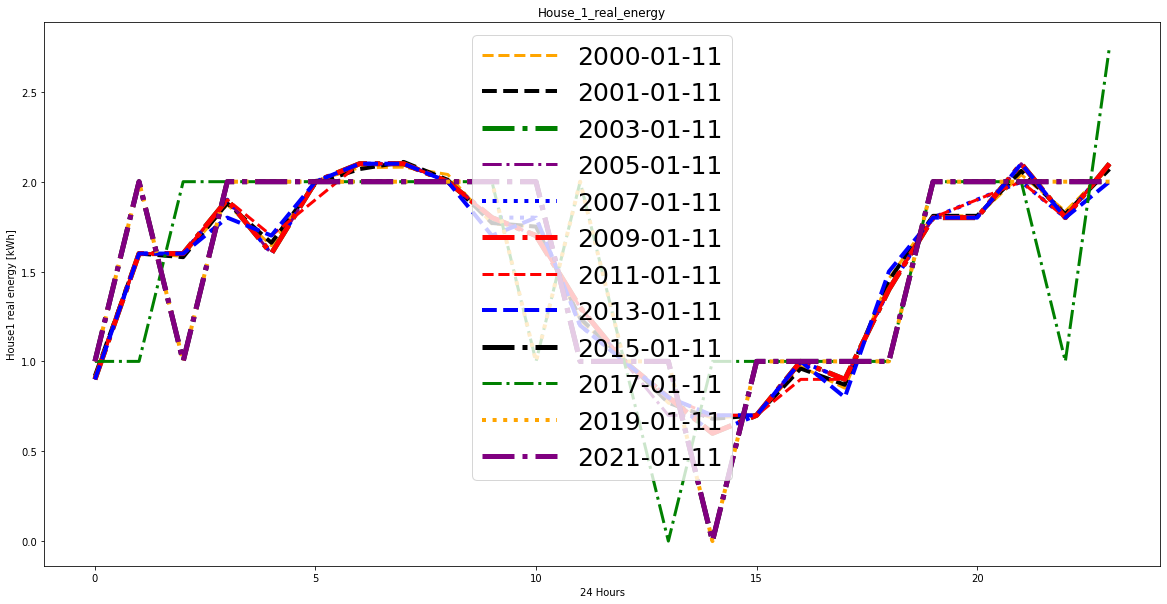

In [ ]:

Variable_name=dataset_Jans.columns[1]#

######
Actula_output1=dataset_Jans.loc["2000-01-11":"2000-01-11", :][Variable_name]##true vaule
Actula_output2=dataset_Jans.loc["2001-01-11":"2001-01-11", :][Variable_name]##true vaule
Actula_output3=dataset_Jans.loc["2003-01-11":"2003-01-11", :][Variable_name]##true vaule
Actula_output4=dataset_Jans.loc["2005-01-11":"2005-01-11", :][Variable_name]##true vaule
Actula_output5=dataset_Jans.loc["2007-01-11":"2007-01-11", :][Variable_name]##true vaule
Actula_output6=dataset_Jans.loc["2009-01-11":"2009-01-11", :][Variable_name]##true vaule
Actula_output7=dataset_Jans.loc["2011-01-11":"2011-01-11", :][Variable_name]##true vaule
Actula_output8=dataset_Jans.loc["2013-01-11":"2013-01-11", :][Variable_name]##true vaule
Actula_output9=dataset_Jans.loc["2015-01-11":"2015-01-11", :][Variable_name]##true vaule
Actula_output10=dataset_Jans.loc["2017-01-11":"2017-01-11", :][Variable_name]##true vaule
Actula_output11=dataset_Jans.loc["2019-01-11":"2019-01-11", :][Variable_name]##true vaule
Actula_output12=dataset_Jans.loc["2021-01-11":"2021-01-11", :][Variable_name]##true vaule



plot_act1=Actula_output1
plot_act2=Actula_output2
plot_act3=Actula_output3
plot_act4=Actula_output4
plot_act5=Actula_output5
plot_act6=Actula_output6
plot_act7=Actula_output7
plot_act8=Actula_output8
plot_act9=Actula_output9
plot_act10=Actula_output10
plot_act11=Actula_output11
plot_act12=Actula_output12



plt.figure(figsize=(20,10))
hours = list(range(0, 24))
plt.plot( hours, plot_act1, marker='', color='orange',  linewidth=3, linestyle='dashed', label="2000-01-11")
plt.plot( hours, plot_act2, marker='', color='black',  linewidth=4, linestyle='dashed', label="2001-01-11")
plt.plot( hours, plot_act3, marker='', color='green',  linewidth=5, linestyle='dashdot', label="2003-01-11")
plt.plot( hours, plot_act4, marker='', color='purple',  linewidth=3, linestyle='dashdot', label="2005-01-11")
plt.plot( hours, plot_act5, marker='', color='blue',  linewidth=4, linestyle='dotted', label="2007-01-11")
plt.plot( hours, plot_act6, marker='', color='red',  linewidth=5, linestyle='dashdot', label="2009-01-11")

plt.plot( hours, plot_act7, marker='', color='red',  linewidth=3, linestyle='dashed', label="2011-01-11")
plt.plot( hours, plot_act8, marker='', color='blue',  linewidth=4, linestyle='dashed', label="2013-01-11")
plt.plot( hours, plot_act9, marker='', color='black',  linewidth=5, linestyle='dashdot', label="2015-01-11")
plt.plot( hours, plot_act10, marker='', color='green',  linewidth=3, linestyle='dashdot', label="2017-01-11")
plt.plot( hours, plot_act11, marker='', color='orange',  linewidth=4, linestyle='dotted', label="2019-01-11")
plt.plot( hours, plot_act12, marker='', color='purple',  linewidth=5, linestyle='dashdot', label="2021-01-11")


plt.title('House_1_real_energy')
plt.xlabel('24 Hours')
plt.ylabel('House1 real energy [kWh]')
plt.legend(loc="best",fontsize=25, handlelength= 3)
plt.show()

##Bulding functions and Run_  lstm architecture_ first model_2 layer lstm


In [ ]:
# LSTMs for Multi-Step Forecasting
#
#>>>(1) LSTM model with vector output for multi-step forecasting with univariate input data.

# Vanilla LSTM model that reads in a sequence of days of total hourly
# power consumption and predicts a vector output of the next standard
# day of hourly power consumption. So, output will be a set of 24 values,
# one for each hour of next day. Input is 24 values of previous day or
# 24*number-of-days.
# A good starting point would be to use the prior day or seven days?


# univariate multi-step lstm
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import LSTM

import numpy as np


'''
# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard days; each day with 24 values;
    # we have 8400 rows in the dataset, one for each hour
    # 8400 = 24 x 350 days
    # let's split it roughly into 70% and 30% for training and or testing:
    # 8400 = 5880 + 2520 = 245 + 105 days
    # we will leave out the last day in the dataset;
    split_id = int( 0.7 * len(data) )
    # make split_id an integer number  of 24 values
    #split_id = int( split_id - (split_id % 7) ) # 24
    print('Splitting index: ', split_id)
    # split_id should be 24096 = 1004 x 24 representing about 70%
    # the remaining data represents test subset
    # split and leave the last day out, because that will only be predicted
    # tested and not used as input for a new prediction because
    # there nothing after it to do prediction for;
    train, test = data[0:split_id], data[split_id:(len(data)-1)]# -24, -7
    # restructure into windows of daily data
    train = array(split(train, len(train)/1))
    test = array(split(test, len(test)/1))
    # at this time train.shape = (245, 24, 7) with 7 columns, i.e., 7 variables
    # and test.shape = (104, 24, 7)
    return train, test
 '''


def split_dataset(data,data_dupli):
    # split into standard days; each day with 24 values;
    # we have 8400 rows in the dataset, one for each hour
    # 8400 = 24 x 350 days
    # let's split it roughly into 70% and 30% for training and or testing:
    # 8400 = 5880 + 2520 = 245 + 105 days
    # let's split it roughly into 70% and 30% for training and test subsets;
    split_id = int( 0.9 * len(data) )#######.9 for very big data
    # make split_id an integer number  of 24 values
    split_id = int( split_id - (split_id % 24) )
    print('Splitting index: ', split_id)
    # split_id should be 24096 = 1004 x 24 representing about 70%
    # the remaining data represents test subset
    # split and leave the last day out, because that will only be predicted
    # tested and not used as input for a new prediction because
    # there nothing after it to do prediction for;
    train, test = data[0:split_id], data[split_id:(len(data)-24)]
    testDates_H=test.index
    test_HVAC_energy_H=test.House_1_HVAC_energy_real
    print(" ")
    print("{} is train.shape before restructure ".format(train.shape))
    print("{} is test.shape before restructure ".format(test.shape))
    # restructure into windows of daily data
    train = array(split(train, len(train)/24))
    test = array(split(test, len(test)/24))
    print(" ")
    print("Out puts and their shape after restructure into windows")
    print("train,           test  :")

    print(train.shape, test.shape )

    print(" ")
    print(" ")
    # at this time train.shape = (245, 24, 7) with 7 columns, i.e., 7 variables
    # and test.shape = (104, 24, 7)

    ###########new features######################
    ############### rahman

    List_testDates_H=testDates_H.date
    List_testDates_D=[]
    print(" ")
    print(" ")
    print(" len(List_testDates_H): ")
    print(len(List_testDates_H))
    print(" ")
    print(" ")
    print(" ")

    for i in range(0,len(List_testDates_H)-1):
      if(i==0):
        #List_testDates_D.append(List_testDates_H[0])
        continue
      elif (i==len(List_testDates_H)-2):
        List_testDates_D.append(List_testDates_H[i])
      elif (List_testDates_H[i]==List_testDates_H[i+1]):
        continue
      else:
        List_testDates_D.append(List_testDates_H[i])

    print(" len(List_testDates_D): ")
    print(len(List_testDates_D))
    print(" ")
    print(" First one")
    print(List_testDates_D[0])
    print(" ")
    print(" Last one")
    print(List_testDates_D[len(List_testDates_D)-1])
    print(" ")

    data_unNormolized=data_dupli
    split_id_unN= int( 0.9 * len(data_unNormolized) )#######.9 for very big data
    # make split_id_unN an integer number  of 24 values
    split_id_unN = int( split_id_unN - (split_id_unN % 24) )
    print('Splitting index after consideration 90% for un normilized data : ', split_id_unN)
    print(" ")
    train_UN_Normalized, test_UN_Normalized = data_unNormolized[0:split_id_unN], data_unNormolized[split_id_unN:(len(data_unNormolized)-24)]
    print("test_UN_Normalized")
    print(test_UN_Normalized)
    #testDates_H_UN_Normalized=test_UN_Normalized.index
    test_HVAC_energy_H_UN_Normalized=test_UN_Normalized.House_1_HVAC_energy_real

    return train, test,List_testDates_D,test_HVAC_energy_H_UN_Normalized

In [ ]:
# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day;
    # actual.shape[1] should be 24 in our case;
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    # calculate overall RMSE
    # actual.shape[0] should be 26 in our case - as the number of days in
    # the test set;
    s = 0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores



In [ ]:

# evaluate one or more forecasts against expected values
# as relative errors expressed as percentages
# 100 * (predicted - actual)/actual
# in other  words, report mean absolute percentage error (MAPE)
# which is commonly used to measure the predictive accuracy of models
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res


In [ ]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

def evaluate_forecasts_MAPE(actual, predicted):
    print("#########################################################################")
    print("#################evaluate_forecasts_MAPE##########################################")
    print(" ")
    scores = list()
    # actual.shape[1] should be 24 in our case;
    for i in range(actual.shape[1]):
        # calculate mape for this hour
        mape = mean_absolute_percentage_error(actual[:, i], predicted[:, i])
        print("mape")
        print(mape)
        scores.append(mape)
    # calculate overall average MAPE over all 24 hours
    score = sum(scores)/len(scores)
    return score, scores

# summarize scores

# summarize scores
def summarize_scores(score_MAPE, scores_MAPE, score_RMSE,scores_RMSE):
      print('RMSE　Result')
      s_scores = ', '.join(['%.1f' % s for s in scores_RMSE])
      name='lstm_RMSEs'
      #print('%s: [%.3f] %s' % (name, score, s_scores))
      print('%s: %s' % (name, scores_RMSE))
      print(" ")
      print(" calculate overall average RMSE over all 24 hours = {} ".format(score_RMSE))
      print(" ")
      print('MAPE　Result')
      s_scores = ', '.join(['%.1f' % s for s in scores_MAPE])
      name='lstm_MAPEs'
      #print('%s: [%.3f] %s' % (name, score, s_scores))
      print('%s: %s' % (name, scores_MAPE))
      print(" ")
      print(" calculate overall average MAPE over all 24 hours = {} ".format(score_MAPE))
      print(" ")


In [ ]:

# convert history into inputs and outputs
def to_supervised(train, n_input, n_out=24): # =24, =7####### n_out=1 means always one y_lable will be there
    # flatten data
    data = train.reshape((train.shape[0]*train.shape[1], train.shape[2]))
    print("in func to_supervised; {} is data.shape (train.shape after reshape) ".format(data.shape))
    print("#########################################################################")
    print("#################to_supervised##########################################")
    print(" ")
    print("data[1]")
    print(data[1])
    print("data[10]")
    print(data[10])
    print("data[11]")
    print(data[11])
    N_days_for_training_data=int(data.shape[0]/24)
    print("Number of days for training data =  {} days".format(N_days_for_training_data))
    X, y = list(), list()
    in_start = 0
    # step over the entire history one time step at a time
    for _ in range(N_days_for_training_data):
        # define the end of the input sequence
        in_end = in_start + n_input
        out_end = in_end + n_out
        # ensure we have enough data for this instance
        if out_end <= len(data):
            # take the first 24 rows, only the 1-st column index 0
            # (which is total Net_total) of the data that has shape
            # (8400,6); that is "total calculated power" each hour,
            # for 24 hours, i.e., 1 days;
            x_input = data[in_start:in_end, 1] ### 0 is "Net total", 1, is "Lights", 2 is "HVAC"
            x_input = x_input.reshape((len(x_input), 1))
            X.append(x_input)
            y.append(data[in_end:out_end, 1]) ### 0 is "Net total", 1, is "Lights", 2 is "HVAC"
        else:
          print(" out_end > len(data) and out_end: {} ".format(out_end))
        # move along one time step
        # NOTE: when prediction was done for 7 days values, incrementing
        # one day at a time here was ok; it was sun-sat, mon-sun, tue-mon,
        # wed-tue, etc.
        # this was done like that to increase amount of train data; it was
        # ok because the daily total consumption does not vary that much;
        # however, when doing 24 h for 24 values prediction, incrementing
        # hourly for the sake of increasing amount of train data makes for the
        # outputs to predict "average values" because training of model is done
        # with data 0-23h, 1-0h, 2-1h, 3-2h etc. instead of
        # 0-23h, 0-23h, 0-23h, 0-23h, etc.
        # overlapping days I think diminishes the "daily pattern" of power
        # and kind-of-uniformizes it;
        in_start += 24 # 24
        print(" ")
        print("**********************************")
        print("*************** finish for loop in to_supervised **************")
        print(" len of list X =  {} ".format(len(X)))
        print(" len of list y =  {} ".format(len(y)))
    return array(X), array(y)

In [ ]:

# make a forecast
def forecast(model, history, n_input):

    # flatten data

    data = array(history)

    data = data.reshape((data.shape[0]*data.shape[1], data.shape[2]))
    print("  ")
    print("  ")
    print(" data.shape  for new prediction")
    print(data.shape)
    print("  ")
    print("  ")


    # retrieve last observations for input data
    # get the values from column 0, which is total Net_total power;
    input_x = data[-n_input:, 1] ### 0 is "Net total", 1, is "Lights", 2 is "HVAC"
    print('Previous Day : input ')
    Data_usedFor_prediction=input_x
    print(input_x)
    # reshape into [1, n_input, 1]
    input_x = input_x.reshape((1, len(input_x), 1))
    input_x=np.array(input_x).astype('float32')
    print("  ")
    print("  ")
    print('exact before put in the model ')
    print(input_x)
    print(input_x.shape)
    print(type(input_x.shape))

    # forecast the next day, as 24 values
    yhat = model.predict(input_x, verbose=0)
    # we only want the vector forecast
    #yhat = yhat
    return yhat,Data_usedFor_prediction


In [ ]:
# Walk-Forward Validation
# evaluate a single model
def evaluate_model(train, test, n_input, my_scaler,version,epochs,batch_size,lr,patience,verbose,LOSS,OPTIMIZER,act_sel,Num_LSTM_output_space,rec_act_sel,Dropout_level,Dense_output ,recurrent_dropout_level,List_testDates_D,test_HVAC_energy_H_UN_Normalized):
    # (1) fit model
    # this function does some more data manipulation; uses train
    # to generate train_x and train_y: by calling to_supervised(train, n_input);
    # those train_x and train_y take only the column with total load power
    # from the train data;
    model,network_history = build_model(train,n_input,version,epochs,batch_size,lr,patience,verbose,LOSS,OPTIMIZER,act_sel,Num_LSTM_output_space,rec_act_sel,Dropout_level,Dense_output,recurrent_dropout_level)


    # (2) history is a list of daily data; a "daily data point" is 24
    # sets (for 24 h), with 6 variables in each set, where  the last one
    # in each set is the total load power for that hour;

    history = [x for x in test]
    print(" ")
    print("len(history)  in evaluate_model= {}".format(len(history))) ## have all data for each 24 hours (hvac_load ...)
    n_testCase = test.shape[0]
    print("test.shape in evaluate_model= {}".format(test.shape))
    print("n_testCase in evaluate_model= {}".format(n_testCase))
    print(" ")


    # walk-forward validation over each week
    actuals = list()
    predictions = list()

    # create two lists to aggregate all predictions
    # we'll use them for ploting purposes only;
    plot_actuals = list()
    plot_predictions = list()
    #print("before Big For")

    print("#########################################################################")
    print("#################forecast##########################################")
    print(" ")
    print("history[1]")
    #print(history[1])

    for i in range(len(test)):
        print("  ")
        print("  ")
        print("  ")
        print("  ")
        print("  ")
        print("  ")
        print("  ")
        # a) predict the day as 24 values, each values one of the 24 h
        yhat_sequence,Data_usedFor_prediction = forecast(model, history, n_input)
        ############## print("forecast result",i)
        ############## print(yhat_sequence.shape)
        ##############print(yhat_sequence)



        # aggregate actuals and predictions for plotting
        plot_act = test[i, :]
        plot_act = plot_act[:, 1] ### 0 is "Net total", 1, is "Lights", 2 is "HVAC"
        plot_actuals.append(plot_act)
        plot_pred = yhat_sequence
        plot_predictions.append(plot_pred)
        ############## p print("forecast plot_act",i)
        ############## pprint(plot_act)
        #plot_act = plot_act.reshape(1, 24)
        #print(plot_act.shape)


        #if (i < 2):
        #print ('i = %d' %(i))
        print("  ")
        print('Actual day normalized:')
        print(plot_act)
        print("  ")
        print('test day i = %d' %(i))
            #print(plot_act)
            #print(plot_pred)
        print(List_testDates_D[i])
        print(" ")
        print(" ")
        hours = list(range(0, 24))
        plt.plot( hours, plot_act, marker='', color='olive', linewidth=1, label='Actual day!! ')
        plt.plot( hours, Data_usedFor_prediction, marker='', color='red',  linewidth=1, linestyle='dashed', label="Previous Day= Wich will be input of LSTM model")
        plt.title('House Previous Day, Next Day')
        plt.xlabel('24 Hours')
        plt.ylabel('Energy [kWh]')
        plt.legend(loc="upper left")
        plt.show()
        print(" ")
        print(" ")
        hours = list(range(0, 24))
        plt.plot( hours, plot_act, marker='', color='olive', linewidth=1, label='Actual')
        plot_pred = plot_pred.flatten()
        plt.plot( hours, plot_pred, marker='', color='red',  linewidth=1, linestyle='dashed', label="Predicted")
        #print("first")
        plt.title('LSTM Model result with : Input: Previous Day, Output: Next Day')
        plt.xlabel('24 Hours')
            #plt.ylabel('Lights Energy [kWh]')
        plt.ylabel('HVAC Energy [kWh]')
            #plt.ylabel('Total Energy [kWh]')
        plt.legend(loc="upper left")
        plt.show()

        print(List_testDates_D[i])
        print(" ")
        print(" ")
        hours = list(range(0, 24))
        plt.plot( hours, Data_usedFor_prediction, marker='', color='olive', linewidth=1, label='Previous Day= Wich will be input of LSTM model')
        plt.plot( hours, plot_pred, marker='', color='red',  linewidth=1, linestyle='dashed', label="Predicted")
        plt.title('Previous Day,Prediction based on it')
        plt.xlabel('24 Hours')
        plt.ylabel('Energy [kWh]')
        plt.legend(loc="upper left")
        plt.show()
        print(" ")
        print(" ")


        print('plot_act inversed:')
        Act_inv=my_scaler.inverse_transform(array(plot_act).reshape(-1,1))
        print(Act_inv)
        print('plot_act orginal (cheking inverse)')
        print(test_HVAC_energy_H_UN_Normalized[str(List_testDates_D[i])])
        print(' ')
        print(' ')
        print('predicted normalized:')
        print(yhat_sequence)
        print('predicted inversed:')
        pred_inv=my_scaler.inverse_transform(array(yhat_sequence).reshape(-1,1))
        print(pred_inv)

        print('test day i = %d' %(i))
        hours = list(range(0, 24))
        plt.plot( hours, Act_inv, marker='', color='olive', linewidth=1, label='Un normalized Actual')
        pred_inv = pred_inv.flatten()
        plt.plot( hours, pred_inv, marker='', color='red',  linewidth=1, linestyle='dashed', label="Un normalized Predicted")
        print(List_testDates_D[i])
        plt.title('Un normalized  LSTM Model result: Input: Previous Day, Output: Next Day')
        plt.xlabel('24 Hours')
        plt.ylabel('Energy [kWh]')
            #plt.ylabel('HVAC Energy [kWh]')
            #plt.ylabel('Total Energy [kWh]')
        plt.legend(loc="upper left")
        plt.show()

        # b) store the predictions

        #actuals.append(plot_act)
        #predictions.append(yhat_sequence)
        #print('plot_act normalized:')
        #print(plot_act)
        #print('plot_act inversed:')
        #print(my_scaler.inverse_transform(array(plot_act).reshape(-1,1)))
        #print('predicted normalized:')
        #print(yhat_sequence)
        #print('predicted inversed:')
        #print(my_scaler.inverse_transform(array(yhat_sequence).reshape(-1,1)))
        actuals.append( my_scaler.inverse_transform(array(plot_act).reshape(-1,1)) )
        predictions.append( my_scaler.inverse_transform(array(yhat_sequence).reshape(-1,1)) )

        # c) get real observation and add to history for predicting the next day
        #bad
        history.append(test[i, :])



    print("actuals ")
    actuals = np.asarray(actuals)
    print(actuals.shape)
    print("predictions")
    predictions = np.asarray(predictions)
    print(predictions.shape)
    ###score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    score_MAPE, scores_MAPE = evaluate_forecasts_MAPE(actuals, predictions)
    score_RMSE, scores_RMSE = evaluate_forecasts(actuals, predictions)
    return score_MAPE, scores_MAPE, score_RMSE,scores_RMSE,network_history




In [ ]:
# train the modelLoad
def build_model(train,n_input,version,epochs,batch_size,lr,patience,verbose,LOSS,OPTIMIZER,act_sel,Num_LSTM_output_space,rec_act_sel,Dropout_level,Dense_output,recurrent_dropout_level):
    # (1) prepare data; next function uses hard coded numbers, based
    # on knowing that 1st column, is "Net_total"
    train_x, train_y = to_supervised(train, n_input)
    print("#########################################################################")
    print("#################build_model##########################################")
    print(" ")
    print('After flattening the train dataset with function to_supervised:')
    print('train_x shape:')
    print(train_x.shape)
    train_x=np.array(train_x).astype('float32')
    print('train_x[1]  :')
    print(train_x[1])

    print('train_y shape:')
    print(train_y.shape)
    train_y=np.array(train_y).astype('float32')
    print('train_y[1]  :')
    print(train_y[1])

    # (2) define parameters;      recurrent_dropout_level,
    # I selected these randomly for now;
    #verbose, epochs, batch_size = 1, 32, 16 # 1,70,16; 1,30,32
    n_timesteps = train_x.shape[1]
    n_features  = train_x.shape[2]
    n_outputs   = train_y.shape[1]
    print("n_timesteps = train_x.shape[1]")
    print(n_timesteps)
    print("n_features = train_x.shape[2]")
    print(n_features)
    print("n_outputs   = train_y.shape[1]")
    print(n_outputs)
    print(" ")
    print(" ")

    ######Rahman####

        ######Rahman####

    ##################
    # (3) define model
    # Model #1: Simple Naive
    # model = Sequential()
    # model.add(LSTM(100, activation='relu', input_shape=(n_timesteps, n_features)))
    # model.add(Dense(50, activation='relu'))
    # model.add(Dense(n_outputs))
    # model.compile(loss='mse', optimizer='adam')
    # Model #2: More layers
    # model = Sequential()
    # model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_timesteps, n_features)))
    # model.add(LSTM(200, activation='relu', return_sequences=True))
    # model.add(LSTM(200, activation='relu'))
    # model.add(Dense(n_outputs))
    # model.compile(loss='mse', optimizer='adam')
    # Model #4 More layers

    ##train on gridlab-d data
    #epochs = 200
    #lr = 1e-2
    #bs=7
    #verbose, epochs, batch_size = 1, 200, 72
    print("version =",version)
    print(" ")
    print("epochs =", epochs)
    print(" ")
    print("batch_size =", batch_size)
    print(" ")
    print("lr =", lr)
    print(" ")
    print("patience =", patience)
    print(" ")
    print("LOSS =", LOSS)
    print(" ")
    print("OPTIMIZER =", OPTIMIZER)
    print(" ")
    print("verbose =", verbose)
    print(" ")

    print("#################")
    print(" ")
    print("#################")
    print(" ")
    print("#################")
    print(" ")

    print("act_sel =", str(act_sel))
    print(" ")
    print("Num_LSTM_output_space =", Num_LSTM_output_space)
    print(" ")
    print("rec_act_sel =", str(rec_act_sel))
    print(" ")
    print("Dropout_level =", str(Dropout_level))
    print(" ")

    print("Recurrent_Dropout =", str(recurrent_dropout_level))
    print(" ")

    print("Dense_output =", str(Dense_output))
    print(" ")





    #model.compile(optimizer='sgd',loss=tf.keras.losses.MeanAbsolutePercentageError()) ,act_sel,Num_LSTM_output_space,rec_act_sel,Dropout_level),Dense_output)     recurrent_dropout=0.0,


    model = Sequential()
    model.add(LSTM(Num_LSTM_output_space, activation=str(act_sel),recurrent_activation=str(rec_act_sel), return_sequences=True, input_shape=(n_timesteps, n_features), recurrent_dropout=recurrent_dropout_level))
    model.add(Dropout(Dropout_level))
    model.add(LSTM(int(Num_LSTM_output_space/2), activation=str(act_sel),recurrent_activation=str(rec_act_sel)))
    model.add(Dense(Dense_output))
    model.add(Dense(n_outputs))
    model.compile(loss=LOSS,optimizer=OPTIMIZER, metrics=['accuracy'])
    #model.compile(loss='mse',optimizer=adam, metrics=['mae','accuracy',msle])
    print(model.summary())

    for layer in model.layers:
      layer.trainable=False   ## wants to be sure all waiths are available



    #model=keras.models.load_model("/content/drive/My Drive/Colab Notebooks/GridlabD_LSTM_1/GridlabD_LSTM_6_LearnFromCrisCode_Uploaded_01_03_2022.hdf5")
    early_stopping_monitor = EarlyStopping(monitor='val_loss',min_delta=0,patience=patience,verbose=verbose, mode='auto')
    #early_stopping_monitor = EarlyStopping(monitor='loss', patience=5)




    #%cd /content/drive/MyDrive/Colab Notebooks/GridlabD_LSTM_1/Results_House2/All_months
    ##house2

    Savnig_Link='/content/drive/MyDrive/Colab Notebooks/GridlabD_LSTM_1/Results_House2/'+ version +'.hdf5'
    #Savnig_Link='/content/drive/My Drive/Colab Notebooks/GridlabD_LSTM_1/G_LSTM_UniVar_TrainedOn_Dec_IEEE13_House_1_HVAC_21Y_DataFrom_1Run_'+ version +'.hdf5'
    filepath=Savnig_Link
    checkpoint = ModelCheckpoint(filepath,monitor='accuracy', verbose=verbose, save_best_only=True, mode='min')
    #plt.savefig('RMSE'+ version +'.png')
    # (4) fit network
    network_history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=verbose, callbacks=[PlotLossesKeras(), early_stopping_monitor, checkpoint], shuffle=False)
    return model,network_history

# train for Feb

## Feb_21_years

In [ ]:
# train the modelLoad
def build_model(train,n_input,version,epochs,batch_size,lr,patience,verbose,LOSS,OPTIMIZER,act_sel,Num_LSTM_output_space,rec_act_sel,Dropout_level,Dense_output,recurrent_dropout_level):
    # (1) prepare data; next function uses hard coded numbers, based
    # on knowing that 1st column, is "Net_total"
    train_x, train_y = to_supervised(train, n_input)
    print("#########################################################################")
    print("#################build_model##########################################")
    print(" ")
    print('After flattening the train dataset with function to_supervised:')
    print('train_x shape:')
    print(train_x.shape)
    train_x=np.array(train_x).astype('float32')
    print('train_x[1]  :')
    print(train_x[1])

    print('train_y shape:')
    print(train_y.shape)
    train_y=np.array(train_y).astype('float32')
    print('train_y[1]  :')
    print(train_y[1])




    # (2) define parameters;      recurrent_dropout_level,
    # I selected these randomly for now;
    #verbose, epochs, batch_size = 1, 32, 16 # 1,70,16; 1,30,32
    n_timesteps = train_x.shape[1]
    n_features  = train_x.shape[2]
    n_outputs   = train_y.shape[1]
    print("n_timesteps = train_x.shape[1]")
    print(n_timesteps)
    print("n_features = train_x.shape[2]")
    print(n_features)
    print("n_outputs   = train_y.shape[1]")
    print(n_outputs)
    print(" ")
    print(" ")

    ######Rahman####

        ######Rahman####

    ##################
    # (3) define model
    # Model #1: Simple Naive
    # model = Sequential()
    # model.add(LSTM(100, activation='relu', input_shape=(n_timesteps, n_features)))
    # model.add(Dense(50, activation='relu'))
    # model.add(Dense(n_outputs))
    # model.compile(loss='mse', optimizer='adam')
    # Model #2: More layers
    # model = Sequential()
    # model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_timesteps, n_features)))
    # model.add(LSTM(200, activation='relu', return_sequences=True))
    # model.add(LSTM(200, activation='relu'))
    # model.add(Dense(n_outputs))
    # model.compile(loss='mse', optimizer='adam')
    # Model #4 More layers

    ##train on gridlab-d data
    #epochs = 200
    #lr = 1e-2
    #bs=7
    #verbose, epochs, batch_size = 1, 200, 72
    print("version =",version)
    print(" ")
    print("epochs =", epochs)
    print(" ")
    print("batch_size =", batch_size)
    print(" ")
    print("lr =", lr)
    print(" ")
    print("patience =", patience)
    print(" ")
    print("LOSS =", LOSS)
    print(" ")
    print("OPTIMIZER =", OPTIMIZER)
    print(" ")
    print("verbose =", verbose)
    print(" ")

    print("#################")
    print(" ")
    print("#################")
    print(" ")
    print("#################")
    print(" ")

    print("act_sel =", str(act_sel))
    print(" ")
    print("Num_LSTM_output_space =", Num_LSTM_output_space)
    print(" ")
    print("rec_act_sel =", str(rec_act_sel))
    print(" ")
    print("Dropout_level =", str(Dropout_level))
    print(" ")

    print("Recurrent_Dropout =", str(recurrent_dropout_level))
    print(" ")

    print("Dense_output =", str(Dense_output))
    print(" ")





    #model.compile(optimizer='sgd',loss=tf.keras.losses.MeanAbsolutePercentageError()) ,act_sel,Num_LSTM_output_space,rec_act_sel,Dropout_level),Dense_output)     recurrent_dropout=0.0,


    model = Sequential()
    model.add(LSTM(Num_LSTM_output_space, activation=str(act_sel),recurrent_activation=str(rec_act_sel), return_sequences=True, input_shape=(n_timesteps, n_features), recurrent_dropout=recurrent_dropout_level))
    model.add(Dropout(Dropout_level))
    model.add(LSTM(int(Num_LSTM_output_space/2), activation=str(act_sel),recurrent_activation=str(rec_act_sel)))
    model.add(Dense(Dense_output))
    model.add(Dense(n_outputs))
    model.compile(loss=LOSS,optimizer=OPTIMIZER, metrics=['accuracy'])
    #model.compile(loss='mse',optimizer=adam, metrics=['mae','accuracy',msle])
    print(model.summary())

    for layer in model.layers:
      layer.trainable=False   ## wants to be sure all waiths are available



    #model=keras.models.load_model("/content/drive/My Drive/Colab Notebooks/GridlabD_LSTM_1/GridlabD_LSTM_6_LearnFromCrisCode_Uploaded_01_03_2022.hdf5")
    early_stopping_monitor = EarlyStopping(monitor='val_loss',min_delta=0,patience=patience,verbose=verbose, mode='auto')
    #early_stopping_monitor = EarlyStopping(monitor='loss', patience=5)


    Savnig_Link='/content/drive/MyDrive/Colab Notebooks/GridlabD_LSTM_1/Results_House1/'+ version +'.hdf5'

    #Savnig_Link='/content/drive/My Drive/Colab Notebooks/GridlabD_LSTM_1/G_LSTM_UniVar_TrainedOn_Dec_IEEE13_House_1_HVAC_21Y_DataFrom_1Run_'+ version +'.hdf5'
    filepath=Savnig_Link
    #checkpoint = ModelCheckpoint(filepath,monitor='accuracy', verbose=verbose, save_best_only=True, mode='min')
    checkpoint = ModelCheckpoint(filepath, verbose=verbose, save_best_only=False)
    #plt.savefig('RMSE'+ version +'.png')
    # (4) fit network
    network_history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=verbose, callbacks=[PlotLossesKeras(), early_stopping_monitor, checkpoint], shuffle=False)
    print("checkpoint =")
    print(" verbose=verbose, save_best_only=False, mode='empty'")
    print(" ")
    print(" verbose=verbose, save_best_only=False, mode='empty'")
    print(" ")
    print(" verbose=verbose, save_best_only=False, mode='empty'")
    print(" ")
    print(" ")
    print(" ")
    print(" ")
    print("version =",version)
    print(" ")
    print("epochs =", epochs)
    return model,network_history

In [ ]:
#dataset_Jans=dataHour_2.iloc[List_Months_1,[0,1,2,3,4,5]]
#dataset_Feb=dataHour_2.iloc[List_Months_2,[0,1,2,3,4,5]]
#dataset_March=dataHour_2.iloc[List_Months_3,[0,1,2,3,4,5]]
#dataset_April=dataHour_2.iloc[List_Months_4,[0,1,2,3,4,5]]
#dataset_May=dataHour_2.iloc[List_Months_5,[0,1,2,3,4,5]]
#dataset_Jun=dataHour_2.iloc[List_Months_6,[0,1,2,3,4,5]]
#dataset_July=dataHour_2.iloc[List_Months_7,[0,1,2,3,4,5]]
#dataset_Aug=dataHour_2.iloc[List_Months_8,[0,1,2,3,4,5]]
#dataset_Sep=dataHour_2.iloc[List_Months_9,[0,1,2,3,4,5]]
#dataset_Oct=dataHour_2.iloc[List_Months_10,[0,1,2,3,4,5]]
#dataset_Nov=dataHour_2.iloc[List_Months_11,[0,1,2,3,4,5]]
#dataset_Dec=dataHour_2.iloc[List_Months_12,[0,1,2,3,4,5]]

dataset=dataset_Feb
dataset_dupli=dataset_Feb_dupli
## this part names are not important
loss_s_Dec=[]
accuracy_s_Dec=[]
val_loss_s_Dec=[]
val_accuracy_s_Dec=[]
scores_RMSE_Dec_list=[]
score_RMSE_Dec_list=[]
scores_MAPE_Dec_list=[]
score_MAPE_Dec_list=[]
Model_iteration_list=[]
print(dataset.shape)
print(dataset.head(24*32))
dataset.describe()

(14928, 6)
                     hvac_load  House_1_HVAC_energy_real  heating_setpoint  \
data_time                                                                    
2000-02-01 00:00:00    2.57866                      1.20              72.0   
2000-02-01 01:00:00    0.00000                      1.45              72.0   
2000-02-01 02:00:00    2.56483                      1.36              72.0   
2000-02-01 03:00:00    0.00000                      1.53              72.0   
2000-02-01 04:00:00    2.54782                      1.27              72.0   
...                        ...                       ...               ...   
2001-02-03 19:00:00    0.00000                      1.45              72.0   
2001-02-03 20:00:00    2.52778                      1.19              72.0   
2001-02-03 21:00:00    2.52778                      1.52              72.0   
2001-02-03 22:00:00    2.52778                      1.55              72.0   
2001-02-03 23:00:00    0.00000                      1

hvac_load  House_1_HVAC_energy_real  heating_setpoint  \
count  14928.000000              14928.000000           14928.0   
mean       1.142572                  1.168702              72.0   
std        1.276846                  0.569105               0.0   
min        0.000000                  0.000000              72.0   
25%        0.000000                  0.900000              72.0   
50%        0.000000                  1.100000              72.0   
75%        2.527780                  1.500000              72.0   
max        3.065530                  2.750000              72.0   

       mass_temperature  air_temperature  outdoor_temperature  
count      14928.000000     14928.000000         14928.000000  
mean          72.113868        71.954973            36.540199  
std            0.203091         0.626169             7.493004  
min           71.034900        70.898500            17.962000  
25%           72.013500        71.352200            32.002000  
50%           72.090300        71.933650            35.962000  
75%           72.203100        72.521875            42.082000  
max           72.864700        73.006300            55.942000

In [ ]:
Variable_name=dataset_Sep.columns[1]#

######  loc["2019-05-01 00:00:00":"2020-05-31 23:00:00", :]
Actula_output1=dataset_Feb.loc["2000-02-16 00:00:00":"2000-02-16 23:00:00", :][Variable_name]##true vaule
Actula_output2=dataset_Feb.loc["2001-02-16 00:00:00":"2001-02-16 23:00:00", :][Variable_name]##true vaule
Actula_output3=dataset_Feb.loc["2003-02-16 00:00:00":"2003-02-16 23:00:00", :][Variable_name]##true vaule
Actula_output4=dataset_Feb.loc["2005-02-16 00:00:00":"2005-02-16 23:00:00", :][Variable_name]##true vaule
Actula_output5=dataset_Feb.loc["2007-02-16 00:00:00":"2007-02-16 23:00:00", :][Variable_name]##true vaule
Actula_output6=dataset_Feb.loc["2009-02-16 00:00:00":"2009-02-16 23:00:00", :][Variable_name]##true vaule
Actula_output7=dataset_Feb.loc["2011-02-16 00:00:00":"2011-02-16 23:00:00", :][Variable_name]##true vaule
Actula_output8=dataset_Feb.loc["2013-02-16 00:00:00":"2013-02-16 23:00:00", :][Variable_name]##true vaule
Actula_output9=dataset_Feb.loc["2015-02-16 00:00:00":"2015-02-16 23:00:00", :][Variable_name]##true vaule
Actula_output10=dataset_Feb.loc["2017-02-16 00:00:00":"2017-02-16 23:00:00", :][Variable_name]##true vaule
Actula_output11=dataset_Feb.loc["2019-02-16 00:00:00":"2019-02-16 23:00:00", :][Variable_name]##true vaule
Actula_output12=dataset_Feb.loc["2021-02-16 00:00:00":"2021-02-16 23:00:00", :][Variable_name]##true vaule



plot_act1=Actula_output1
plot_act2=Actula_output2
plot_act3=Actula_output3
plot_act4=Actula_output4
plot_act5=Actula_output5
plot_act6=Actula_output6
plot_act7=Actula_output7
plot_act8=Actula_output8
plot_act9=Actula_output9
plot_act10=Actula_output10
plot_act11=Actula_output11
plot_act12=Actula_output12



plt.figure(figsize=(20,10))
hours = list(range(0, 24))
plt.plot( hours, plot_act1, marker='', color='orange',  linewidth=3, linestyle='dashed', label="2000-02-16")
plt.plot( hours, plot_act2, marker='', color='black',  linewidth=4, linestyle='dashed', label="2001-02-16")
plt.plot( hours, plot_act3, marker='', color='green',  linewidth=5, linestyle='dashdot', label="2003-02-16")
plt.plot( hours, plot_act4, marker='', color='purple',  linewidth=3, linestyle='dashdot', label="2005-02-16")
plt.plot( hours, plot_act5, marker='', color='blue',  linewidth=4, linestyle='dotted', label="2007-02-16")
plt.plot( hours, plot_act6, marker='', color='red',  linewidth=5, linestyle='dashdot', label="2009-02-16")

plt.plot( hours, plot_act7, marker='', color='red',  linewidth=3, linestyle='dashed', label="2011-02-16")
plt.plot( hours, plot_act8, marker='', color='blue',  linewidth=4, linestyle='dashed', label="2013-02-16")
plt.plot( hours, plot_act9, marker='', color='black',  linewidth=5, linestyle='dashdot', label="2015-02-16")
plt.plot( hours, plot_act10, marker='', color='green',  linewidth=3, linestyle='dashdot', label="2017-02-16")
plt.plot( hours, plot_act11, marker='', color='orange',  linewidth=4, linestyle='dotted', label="2019-02-16")
plt.plot( hours, plot_act12, marker='', color='purple',  linewidth=5, linestyle='dashdot', label="2021-02-16")


plt.title('House_1_real_energy')
plt.xlabel('24 Hours')
plt.ylabel('House1 real energy [kWh]')
plt.legend(loc="best",fontsize=25, handlelength= 3)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
plt.show()

In [ ]:
# normalize data
series = Series(dataset[dataset.columns[1]]) ##### 0 is "hvac_load", 1 is "House_1_HVAC_energy_real", 2 is "heating_setpoint", 3 is "heating_setpoint", 4 is "heating_setpoint", 5 is "heating_setpoint"
print("Frist hvac_load :")
print(series[0])
values = series.values
values = values.reshape((len(values), 1))
# train the normalization

min_max_scaler = MinMaxScaler(feature_range=(0, 1))

min_max_scaler = min_max_scaler.fit(values)
print('Scaler Min: %f, Max: %f' % (min_max_scaler.data_min_, min_max_scaler.data_max_))
# normalize the dataset

import joblib
joblib.dump(min_max_scaler, 'Feb_House1_scaler_loaded.gz')
Feb_House1_scaler_loaded = joblib.load('Feb_House1_scaler_loaded.gz')

#normalized = min_max_scaler.transform(values)
normalized = Feb_House1_scaler_loaded.transform(values)



# copy normalized column back into dataset
normalized = normalized.reshape((len(normalized), ))
dataset[dataset.columns[1]] = normalized

# split into train and test
train, test,List_testDates_D,test_HVAC_energy_H_UN_Normalized = split_dataset(dataset,dataset_dupli)
print(train.shape, test.shape )

# evaluate model and get scores
# determince number of train_x[1] for train_y[1]  :
print(" ")
print(" ")
n_input = 24 #

print("train[1][1] : ", train[1][1])



Frist hvac_load :
3.6900000000000546
Scaler Min: 0.000000, Max: 8.000000
Splitting index:  13416
 
(13416, 6) is train.shape before restructure 
(1488, 6) is test.shape before restructure 
 
Out puts and their shape after restructure into windows
train,           test  :
(559, 24, 6) (62, 24, 6)
 
 
 
 
 len(List_testDates_H): 
1488
 
 
 
 len(List_testDates_D): 
62
 
 First one
2019-02-23
 
 Last one
2021-02-27
 
Splitting index after consideration 90% for un normilized data :  13416
 
test_UN_Normalized
                     hvac_load  House_1_HVAC_energy_real  heating_setpoint  \
data_time                                                                    
2019-02-23 00:00:00    0.00000                       3.0              72.0   
2019-02-23 01:00:00    8.18354                       4.0              72.0   
2019-02-23 02:00:00    8.05514                       4.0              72.0   
2019-02-23 03:00:00    8.18354                       4.0              72.0   
2019-02-23 04:00:00  

In [ ]:
pwd

'/content/drive/MyDrive/Colab Notebooks/GridlabD_LSTM_1/Results_House1/upadteResample_PythonConnect_IEEE13_Home_1'

### Model_1

In [ ]:
# train the modelLoad
def build_model(train,n_input,version,epochs,batch_size,lr,patience,verbose,LOSS,OPTIMIZER,act_sel,Num_LSTM_output_space,rec_act_sel,Dropout_level,Dense_output,recurrent_dropout_level):
    # (1) prepare data; next function uses hard coded numbers, based
    # on knowing that 1st column, is "Net_total"
    train_x, train_y = to_supervised(train, n_input)
    print("#########################################################################")
    print("#################build_model##########################################")
    print(" ")
    print('After flattening the train dataset with function to_supervised:')
    print('train_x shape:')
    print(train_x.shape)
    train_x=np.array(train_x).astype('float32')
    print('train_x[1]  :')
    print(train_x[1])

    print('train_y shape:')
    print(train_y.shape)
    train_y=np.array(train_y).astype('float32')
    print('train_y[1]  :')
    print(train_y[1])




    # (2) define parameters;      recurrent_dropout_level,
    # I selected these randomly for now;
    #verbose, epochs, batch_size = 1, 32, 16 # 1,70,16; 1,30,32
    n_timesteps = train_x.shape[1]
    n_features  = train_x.shape[2]
    n_outputs   = train_y.shape[1]
    print("n_timesteps = train_x.shape[1]")
    print(n_timesteps)
    print("n_features = train_x.shape[2]")
    print(n_features)
    print("n_outputs   = train_y.shape[1]")
    print(n_outputs)
    print(" ")
    print(" ")

    ######Rahman####

        ######Rahman####

    ##################
    # (3) define model
    # Model #1: Simple Naive
    # model = Sequential()
    # model.add(LSTM(100, activation='relu', input_shape=(n_timesteps, n_features)))
    # model.add(Dense(50, activation='relu'))
    # model.add(Dense(n_outputs))
    # model.compile(loss='mse', optimizer='adam')
    # Model #2: More layers
    # model = Sequential()
    # model.add(LSTM(200, activation='relu', return_sequences=True, input_shape=(n_timesteps, n_features)))
    # model.add(LSTM(200, activation='relu', return_sequences=True))
    # model.add(LSTM(200, activation='relu'))
    # model.add(Dense(n_outputs))
    # model.compile(loss='mse', optimizer='adam')
    # Model #4 More layers

    ##train on gridlab-d data
    #epochs = 200
    #lr = 1e-2
    #bs=7
    #verbose, epochs, batch_size = 1, 200, 72
    print("version =",version)
    print(" ")
    print("epochs =", epochs)
    print(" ")
    print("batch_size =", batch_size)
    print(" ")
    print("lr =", lr)
    print(" ")
    print("patience =", patience)
    print(" ")
    print("LOSS =", LOSS)
    print(" ")
    print("OPTIMIZER =", OPTIMIZER)
    print(" ")
    print("verbose =", verbose)
    print(" ")

    print("#################")
    print(" ")
    print("#################")
    print(" ")
    print("#################")
    print(" ")

    print("act_sel =", str(act_sel))
    print(" ")
    print("Num_LSTM_output_space =", Num_LSTM_output_space)
    print(" ")
    print("rec_act_sel =", str(rec_act_sel))
    print(" ")
    print("Dropout_level =", str(Dropout_level))
    print(" ")

    print("Recurrent_Dropout =", str(recurrent_dropout_level))
    print(" ")

    print("Dense_output =", str(Dense_output))
    print(" ")





    #model.compile(optimizer='sgd',loss=tf.keras.losses.MeanAbsolutePercentageError()) ,act_sel,Num_LSTM_output_space,rec_act_sel,Dropout_level),Dense_output)     recurrent_dropout=0.0,


    model = Sequential()
    model.add(LSTM(Num_LSTM_output_space, activation=str(act_sel),recurrent_activation=str(rec_act_sel), return_sequences=True, input_shape=(n_timesteps, n_features), recurrent_dropout=recurrent_dropout_level))
    model.add(Dropout(Dropout_level))
    model.add(LSTM(int(Num_LSTM_output_space/2), activation=str(act_sel),recurrent_activation=str(rec_act_sel)))
    model.add(Dense(Dense_output))
    model.add(Dense(n_outputs))
    model.compile(loss=LOSS,optimizer=OPTIMIZER, metrics=['accuracy'])
    #model.compile(loss='mse',optimizer=adam, metrics=['mae','accuracy',msle])
    print(model.summary())

    for layer in model.layers:
      layer.trainable=False   ## wants to be sure all waiths are available



    #model=keras.models.load_model("/content/drive/My Drive/Colab Notebooks/GridlabD_LSTM_1/GridlabD_LSTM_6_LearnFromCrisCode_Uploaded_01_03_2022.hdf5")
    early_stopping_monitor = EarlyStopping(monitor='val_loss',min_delta=0,patience=patience,verbose=verbose, mode='auto')
    #early_stopping_monitor = EarlyStopping(monitor='loss', patience=5)


    Savnig_Link='/content/drive/MyDrive/Colab Notebooks/GridlabD_LSTM_1/Results_House1/'+ version +'.hdf5'

    #Savnig_Link='/content/drive/My Drive/Colab Notebooks/GridlabD_LSTM_1/G_LSTM_UniVar_TrainedOn_Dec_IEEE13_House_1_HVAC_21Y_DataFrom_1Run_'+ version +'.hdf5'
    filepath=Savnig_Link
    #checkpoint = ModelCheckpoint(filepath,monitor='accuracy', verbose=verbose, save_best_only=True, mode='min')
    checkpoint = ModelCheckpoint(filepath, verbose=verbose, save_best_only=False)
    #plt.savefig('RMSE'+ version +'.png')
    # (4) fit network
    network_history = model.fit(train_x, train_y, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=verbose, callbacks=[PlotLossesKeras(), early_stopping_monitor, checkpoint], shuffle=False)
    print("checkpoint =")
    print(" verbose=verbose, save_best_only=False, mode='empty'")
    print(" ")
    print(" verbose=verbose, save_best_only=False, mode='empty'")
    print(" ")
    print(" verbose=verbose, save_best_only=False, mode='empty'")
    print(" ")
    print(" ")
    print(" ")
    print(" ")
    print("version =",version)
    print(" ")
    print("epochs =", epochs)
    return model,network_history

accuracy
	training         	 (min:    0.018, max:    0.514, cur:    0.456)
	validation       	 (min:    0.089, max:    0.375, cur:    0.250)
Loss
	training         	 (min:    0.001, max:    0.143, cur:    0.001)
	validation       	 (min:    0.002, max:    0.066, cur:    0.002)

Epoch 1000: saving model to /content/drive/MyDrive/Colab Notebooks/GridlabD_LSTM_1/Results_House1/U3_V10_House1_Feb_06_13_2022_save_best_only=False_LOSS=mse_epochs=1000_batchSize=24_lr=0.001_patience=135_OPTIMIZER=RMSprop_Activation=tanh_LSTMOutputSpace=72_RecurrentActivation=relu_Dropout=0.2_RecurrentDropout=0.4_DenseOutput=96.hdf5
21/21 [==============================] - 3s 144ms/step - loss: 0.0014 - accuracy: 0.4562 - val_loss: 0.0019 - val_accuracy: 0.2500
checkpoint =
 verbose=verbose, save_best_only=False, mode='empty'
 
 verbose=verbose, save_best_only=False, mode='empty'
 
 verbose=verbose, save_best_only=False, mode='empty'
 
 
 
 
version = U3_V10_House1_Feb_06_13_2022_save_best_only=False_LOSS=mse_ep

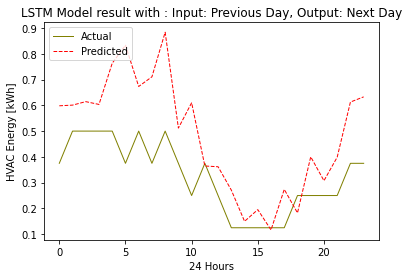

2019-02-23
 
 


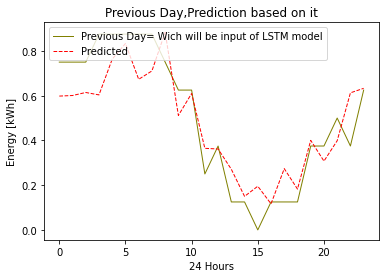

 
 
plot_act inversed:
[[3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [3.]
 [4.]
 [3.]
 [4.]
 [3.]
 [2.]
 [3.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2019-02-23 00:00:00    3.0
2019-02-23 01:00:00    4.0
2019-02-23 02:00:00    4.0
2019-02-23 03:00:00    4.0
2019-02-23 04:00:00    4.0
2019-02-23 05:00:00    3.0
2019-02-23 06:00:00    4.0
2019-02-23 07:00:00    3.0
2019-02-23 08:00:00    4.0
2019-02-23 09:00:00    3.0
2019-02-23 10:00:00    2.0
2019-02-23 11:00:00    3.0
2019-02-23 12:00:00    2.0
2019-02-23 13:00:00    1.0
2019-02-23 14:00:00    1.0
2019-02-23 15:00:00    1.0
2019-02-23 16:00:00    1.0
2019-02-23 17:00:00    1.0
2019-02-23 18:00:00    2.0
2019-02-23 19:00:00    2.0
2019-02-23 20:00:00    2.0
2019-02-23 21:00:00    2.0
2019-02-23 22:00:00    3.0
2019-02-23 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.59818214 0.6007745  0.61428607 0.6034549  0.7633301  0.8330987

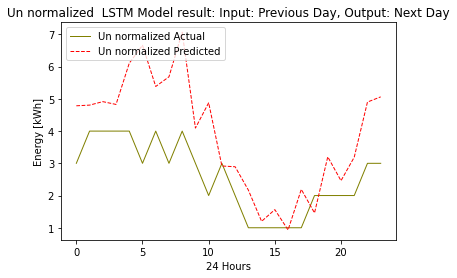

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1512, 6)
  
  
Previous Day : input 
[0.375 0.5   0.5   0.5   0.5   0.375 0.5   0.375 0.5   0.375 0.25  0.375
 0.25  0.125 0.125 0.125 0.125 0.125 0.25  0.25  0.25  0.25  0.375 0.375]
  
  
exact before put in the model 
[[[0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.5   0.375 0.5   0.5   0.375 0.375 0.5   0.375 0.375 0.25  0.25
 0.125 0.25  0.125 0.125 0.125 0.25  0.125 0.375 0.5   0.75  0.625 0.75 ]
  
test day i = 1
2019-02-24
 
 


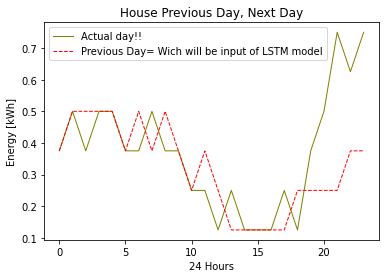

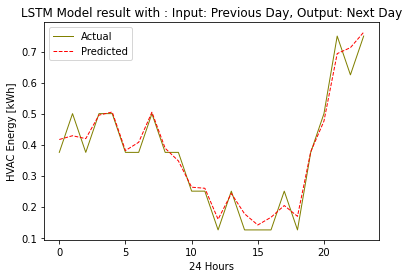

2019-02-24
 
 


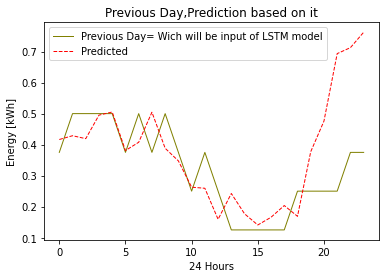

 
 
plot_act inversed:
[[3.]
 [4.]
 [3.]
 [4.]
 [4.]
 [3.]
 [3.]
 [4.]
 [3.]
 [3.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [3.]
 [4.]
 [6.]
 [5.]
 [6.]]
plot_act orginal (cheking inverse)
data_time
2019-02-24 00:00:00    3.0
2019-02-24 01:00:00    4.0
2019-02-24 02:00:00    3.0
2019-02-24 03:00:00    4.0
2019-02-24 04:00:00    4.0
2019-02-24 05:00:00    3.0
2019-02-24 06:00:00    3.0
2019-02-24 07:00:00    4.0
2019-02-24 08:00:00    3.0
2019-02-24 09:00:00    3.0
2019-02-24 10:00:00    2.0
2019-02-24 11:00:00    2.0
2019-02-24 12:00:00    1.0
2019-02-24 13:00:00    2.0
2019-02-24 14:00:00    1.0
2019-02-24 15:00:00    1.0
2019-02-24 16:00:00    1.0
2019-02-24 17:00:00    2.0
2019-02-24 18:00:00    1.0
2019-02-24 19:00:00    3.0
2019-02-24 20:00:00    4.0
2019-02-24 21:00:00    6.0
2019-02-24 22:00:00    5.0
2019-02-24 23:00:00    6.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.4165357  0.42869914 0.41930795 0.49515742 0.505177   0.3809190

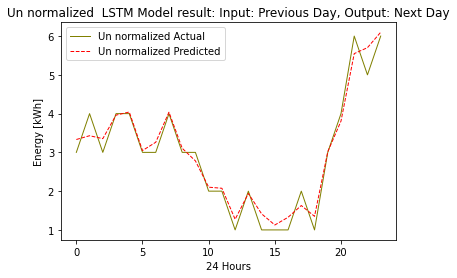

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1536, 6)
  
  
Previous Day : input 
[0.375 0.5   0.375 0.5   0.5   0.375 0.375 0.5   0.375 0.375 0.25  0.25
 0.125 0.25  0.125 0.125 0.125 0.25  0.125 0.375 0.5   0.75  0.625 0.75 ]
  
  
exact before put in the model 
[[[0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.125]
  [0.375]
  [0.5  ]
  [0.75 ]
  [0.625]
  [0.75 ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.875 0.75  0.875 0.625 0.625 0.75  0.875 0.75  0.75  0.375 0.375 0.25
 0.25  0.25  0.25  0.125 0.125 0.25  0.25  0.375 0.625 0.625 0.75  0.875]
  
test day i = 2
2019-02-25
 
 


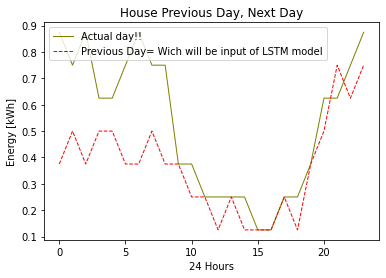

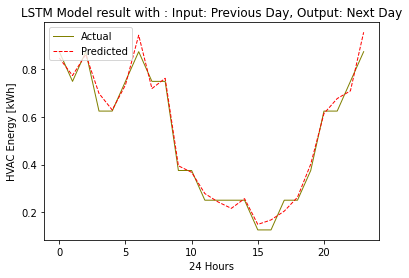

2019-02-25
 
 


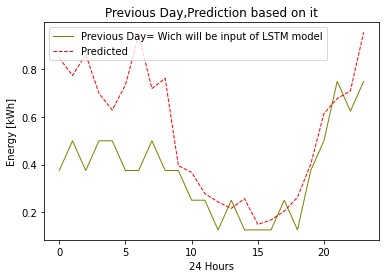

 
 
plot_act inversed:
[[7.]
 [6.]
 [7.]
 [5.]
 [5.]
 [6.]
 [7.]
 [6.]
 [6.]
 [3.]
 [3.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [3.]
 [5.]
 [5.]
 [6.]
 [7.]]
plot_act orginal (cheking inverse)
data_time
2019-02-25 00:00:00    7.0
2019-02-25 01:00:00    6.0
2019-02-25 02:00:00    7.0
2019-02-25 03:00:00    5.0
2019-02-25 04:00:00    5.0
2019-02-25 05:00:00    6.0
2019-02-25 06:00:00    7.0
2019-02-25 07:00:00    6.0
2019-02-25 08:00:00    6.0
2019-02-25 09:00:00    3.0
2019-02-25 10:00:00    3.0
2019-02-25 11:00:00    2.0
2019-02-25 12:00:00    2.0
2019-02-25 13:00:00    2.0
2019-02-25 14:00:00    2.0
2019-02-25 15:00:00    1.0
2019-02-25 16:00:00    1.0
2019-02-25 17:00:00    2.0
2019-02-25 18:00:00    2.0
2019-02-25 19:00:00    3.0
2019-02-25 20:00:00    5.0
2019-02-25 21:00:00    5.0
2019-02-25 22:00:00    6.0
2019-02-25 23:00:00    7.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.84792405 0.7746272  0.8634339  0.69939345 0.629717   0.7350033

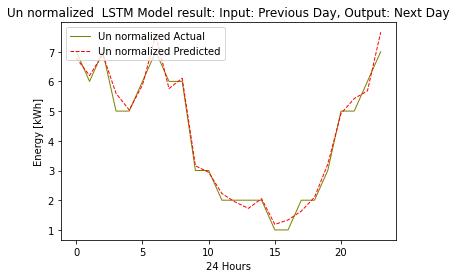

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1560, 6)
  
  
Previous Day : input 
[0.875 0.75  0.875 0.625 0.625 0.75  0.875 0.75  0.75  0.375 0.375 0.25
 0.25  0.25  0.25  0.125 0.125 0.25  0.25  0.375 0.625 0.625 0.75  0.875]
  
  
exact before put in the model 
[[[0.875]
  [0.75 ]
  [0.875]
  [0.625]
  [0.625]
  [0.75 ]
  [0.875]
  [0.75 ]
  [0.75 ]
  [0.375]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.625]
  [0.625]
  [0.75 ]
  [0.875]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[1.    0.75  0.875 0.875 0.875 0.875 0.875 0.875 0.75  0.625 0.625 0.375
 0.25  0.25  0.125 0.25  0.25  0.375 0.25  0.375 0.375 0.5   0.625 0.75 ]
  
test day i = 3
2019-02-26
 
 


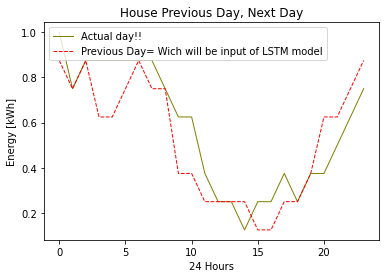

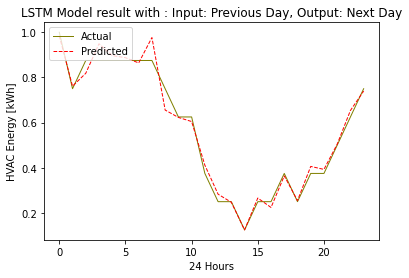

2019-02-26
 
 


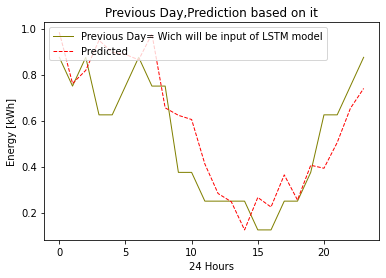

 
 
plot_act inversed:
[[8.]
 [6.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [6.]
 [5.]
 [5.]
 [3.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [3.]
 [2.]
 [3.]
 [3.]
 [4.]
 [5.]
 [6.]]
plot_act orginal (cheking inverse)
data_time
2019-02-26 00:00:00    8.0
2019-02-26 01:00:00    6.0
2019-02-26 02:00:00    7.0
2019-02-26 03:00:00    7.0
2019-02-26 04:00:00    7.0
2019-02-26 05:00:00    7.0
2019-02-26 06:00:00    7.0
2019-02-26 07:00:00    7.0
2019-02-26 08:00:00    6.0
2019-02-26 09:00:00    5.0
2019-02-26 10:00:00    5.0
2019-02-26 11:00:00    3.0
2019-02-26 12:00:00    2.0
2019-02-26 13:00:00    2.0
2019-02-26 14:00:00    1.0
2019-02-26 15:00:00    2.0
2019-02-26 16:00:00    2.0
2019-02-26 17:00:00    3.0
2019-02-26 18:00:00    2.0
2019-02-26 19:00:00    3.0
2019-02-26 20:00:00    3.0
2019-02-26 21:00:00    4.0
2019-02-26 22:00:00    5.0
2019-02-26 23:00:00    6.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.9839475  0.7613257  0.81827474 0.9490441  0.89687693 0.8873853

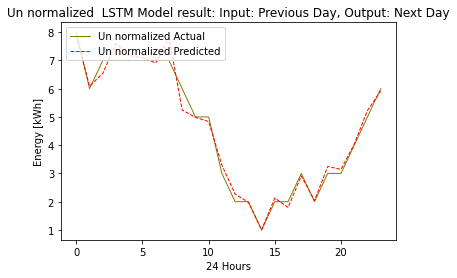

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1584, 6)
  
  
Previous Day : input 
[1.    0.75  0.875 0.875 0.875 0.875 0.875 0.875 0.75  0.625 0.625 0.375
 0.25  0.25  0.125 0.25  0.25  0.375 0.25  0.375 0.375 0.5   0.625 0.75 ]
  
  
exact before put in the model 
[[[1.   ]
  [0.75 ]
  [0.875]
  [0.875]
  [0.875]
  [0.875]
  [0.875]
  [0.875]
  [0.75 ]
  [0.625]
  [0.625]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.625]
  [0.75 ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.75  0.75  0.875 0.75  0.875 0.875 0.875 0.875 0.75  0.625 0.625 0.25
 0.375 0.125 0.125 0.    0.125 0.125 0.125 0.375 0.375 0.5   0.5   0.5  ]
  
test day i = 4
2019-02-27
 
 


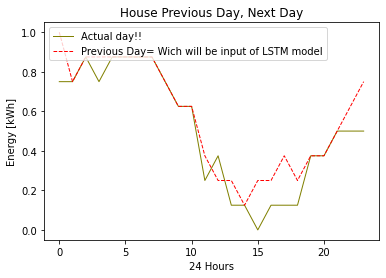

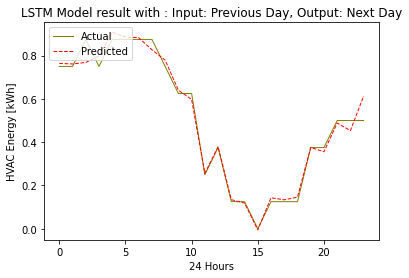

2019-02-27
 
 


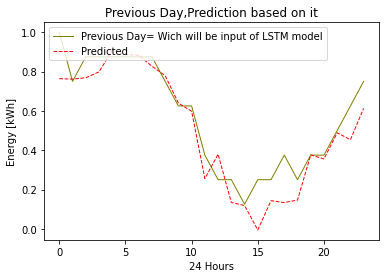

 
 
plot_act inversed:
[[6.]
 [6.]
 [7.]
 [6.]
 [7.]
 [7.]
 [7.]
 [7.]
 [6.]
 [5.]
 [5.]
 [2.]
 [3.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2019-02-27 00:00:00    6.0
2019-02-27 01:00:00    6.0
2019-02-27 02:00:00    7.0
2019-02-27 03:00:00    6.0
2019-02-27 04:00:00    7.0
2019-02-27 05:00:00    7.0
2019-02-27 06:00:00    7.0
2019-02-27 07:00:00    7.0
2019-02-27 08:00:00    6.0
2019-02-27 09:00:00    5.0
2019-02-27 10:00:00    5.0
2019-02-27 11:00:00    2.0
2019-02-27 12:00:00    3.0
2019-02-27 13:00:00    1.0
2019-02-27 14:00:00    1.0
2019-02-27 15:00:00    0.0
2019-02-27 16:00:00    1.0
2019-02-27 17:00:00    1.0
2019-02-27 18:00:00    1.0
2019-02-27 19:00:00    3.0
2019-02-27 20:00:00    3.0
2019-02-27 21:00:00    4.0
2019-02-27 22:00:00    4.0
2019-02-27 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[ 0.76402193  0.76146615  0.76849455  0.7982531   0.90809846  0.8

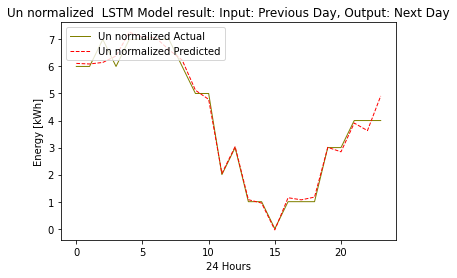

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1608, 6)
  
  
Previous Day : input 
[0.75  0.75  0.875 0.75  0.875 0.875 0.875 0.875 0.75  0.625 0.625 0.25
 0.375 0.125 0.125 0.    0.125 0.125 0.125 0.375 0.375 0.5   0.5   0.5  ]
  
  
exact before put in the model 
[[[0.75 ]
  [0.75 ]
  [0.875]
  [0.75 ]
  [0.875]
  [0.875]
  [0.875]
  [0.875]
  [0.75 ]
  [0.625]
  [0.625]
  [0.25 ]
  [0.375]
  [0.125]
  [0.125]
  [0.   ]
  [0.125]
  [0.125]
  [0.125]
  [0.375]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.625 0.625 0.625 0.625 0.75  0.875 0.625 0.75  0.875 0.5   0.625 0.375
 0.375 0.25  0.125 0.125 0.25  0.25  0.25  0.25  0.375 0.375 0.625 0.625]
  
test day i = 5
2019-02-28
 
 


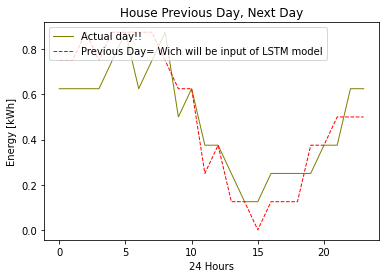

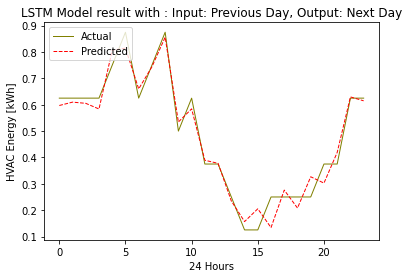

2019-02-28
 
 


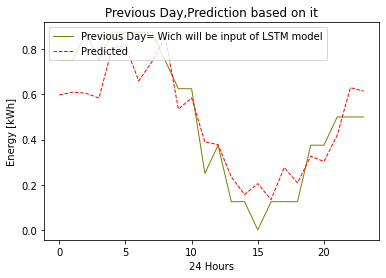

 
 
plot_act inversed:
[[5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [7.]
 [5.]
 [6.]
 [7.]
 [4.]
 [5.]
 [3.]
 [3.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [5.]
 [5.]]
plot_act orginal (cheking inverse)
data_time
2019-02-28 00:00:00    5.0
2019-02-28 01:00:00    5.0
2019-02-28 02:00:00    5.0
2019-02-28 03:00:00    5.0
2019-02-28 04:00:00    6.0
2019-02-28 05:00:00    7.0
2019-02-28 06:00:00    5.0
2019-02-28 07:00:00    6.0
2019-02-28 08:00:00    7.0
2019-02-28 09:00:00    4.0
2019-02-28 10:00:00    5.0
2019-02-28 11:00:00    3.0
2019-02-28 12:00:00    3.0
2019-02-28 13:00:00    2.0
2019-02-28 14:00:00    1.0
2019-02-28 15:00:00    1.0
2019-02-28 16:00:00    2.0
2019-02-28 17:00:00    2.0
2019-02-28 18:00:00    2.0
2019-02-28 19:00:00    2.0
2019-02-28 20:00:00    3.0
2019-02-28 21:00:00    3.0
2019-02-28 22:00:00    5.0
2019-02-28 23:00:00    5.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.5970478  0.60983664 0.6052662  0.5838188  0.8068024  0.8147099

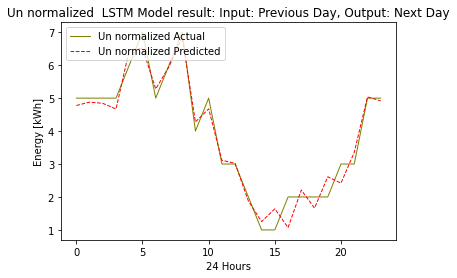

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1632, 6)
  
  
Previous Day : input 
[0.625 0.625 0.625 0.625 0.75  0.875 0.625 0.75  0.875 0.5   0.625 0.375
 0.375 0.25  0.125 0.125 0.25  0.25  0.25  0.25  0.375 0.375 0.625 0.625]
  
  
exact before put in the model 
[[[0.625]
  [0.625]
  [0.625]
  [0.625]
  [0.75 ]
  [0.875]
  [0.625]
  [0.75 ]
  [0.875]
  [0.5  ]
  [0.625]
  [0.375]
  [0.375]
  [0.25 ]
  [0.125]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.625]
  [0.625]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.5   0.5   0.5   0.625 0.5   0.5   0.5   0.375 0.5   0.125 0.125
 0.25  0.125 0.125 0.25  0.125 0.375 0.375 0.25  0.5   0.5   0.5   0.5  ]
  
test day i = 6
2020-02-01
 
 


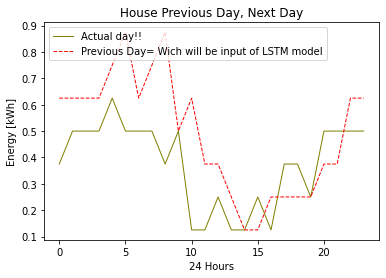

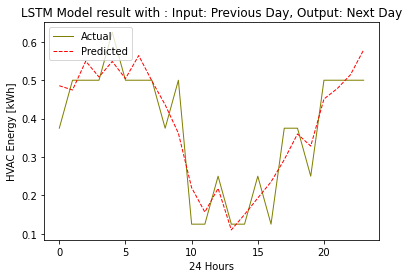

2020-02-01
 
 


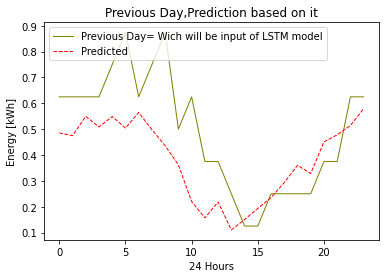

 
 
plot_act inversed:
[[3.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [3.]
 [4.]
 [1.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [3.]
 [3.]
 [2.]
 [4.]
 [4.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2020-02-01 00:00:00    3.0
2020-02-01 01:00:00    4.0
2020-02-01 02:00:00    4.0
2020-02-01 03:00:00    4.0
2020-02-01 04:00:00    5.0
2020-02-01 05:00:00    4.0
2020-02-01 06:00:00    4.0
2020-02-01 07:00:00    4.0
2020-02-01 08:00:00    3.0
2020-02-01 09:00:00    4.0
2020-02-01 10:00:00    1.0
2020-02-01 11:00:00    1.0
2020-02-01 12:00:00    2.0
2020-02-01 13:00:00    1.0
2020-02-01 14:00:00    1.0
2020-02-01 15:00:00    2.0
2020-02-01 16:00:00    1.0
2020-02-01 17:00:00    3.0
2020-02-01 18:00:00    3.0
2020-02-01 19:00:00    2.0
2020-02-01 20:00:00    4.0
2020-02-01 21:00:00    4.0
2020-02-01 22:00:00    4.0
2020-02-01 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.4856609  0.47456396 0.5497378  0.5084158  0.5488955  0.5041691

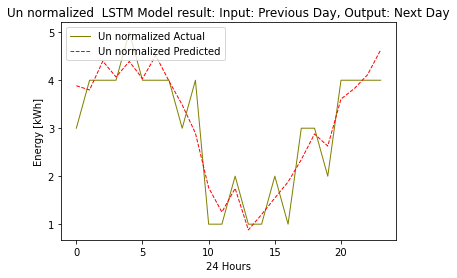

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1656, 6)
  
  
Previous Day : input 
[0.375 0.5   0.5   0.5   0.625 0.5   0.5   0.5   0.375 0.5   0.125 0.125
 0.25  0.125 0.125 0.25  0.125 0.375 0.375 0.25  0.5   0.5   0.5   0.5  ]
  
  
exact before put in the model 
[[[0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.125]
  [0.125]
  [0.25 ]
  [0.125]
  [0.125]
  [0.25 ]
  [0.125]
  [0.375]
  [0.375]
  [0.25 ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.375 0.5   0.375 0.375 0.375
 0.25  0.25  0.25  0.25  0.25  0.375 0.375 0.375 0.375 0.5   0.5   0.5  ]
  
test day i = 7
2020-02-02
 
 


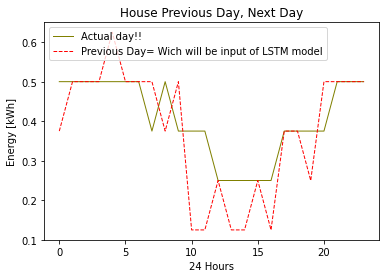

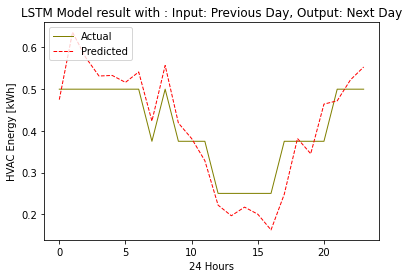

2020-02-02
 
 


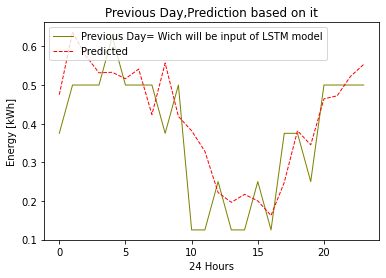

 
 
plot_act inversed:
[[4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [3.]
 [4.]
 [3.]
 [3.]
 [3.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2020-02-02 00:00:00    4.0
2020-02-02 01:00:00    4.0
2020-02-02 02:00:00    4.0
2020-02-02 03:00:00    4.0
2020-02-02 04:00:00    4.0
2020-02-02 05:00:00    4.0
2020-02-02 06:00:00    4.0
2020-02-02 07:00:00    3.0
2020-02-02 08:00:00    4.0
2020-02-02 09:00:00    3.0
2020-02-02 10:00:00    3.0
2020-02-02 11:00:00    3.0
2020-02-02 12:00:00    2.0
2020-02-02 13:00:00    2.0
2020-02-02 14:00:00    2.0
2020-02-02 15:00:00    2.0
2020-02-02 16:00:00    2.0
2020-02-02 17:00:00    3.0
2020-02-02 18:00:00    3.0
2020-02-02 19:00:00    3.0
2020-02-02 20:00:00    3.0
2020-02-02 21:00:00    4.0
2020-02-02 22:00:00    4.0
2020-02-02 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.47490185 0.63659745 0.5758141  0.53160554 0.5329638  0.5163389

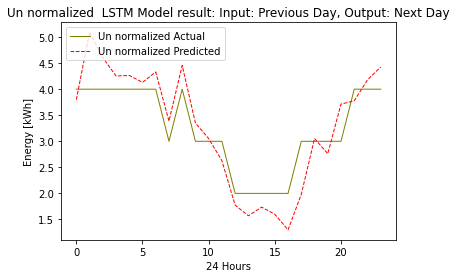

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1680, 6)
  
  
Previous Day : input 
[0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.375 0.5   0.375 0.375 0.375
 0.25  0.25  0.25  0.25  0.25  0.375 0.375 0.375 0.375 0.5   0.5   0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.625 0.625 0.625 0.625 0.625 0.75  0.625 0.625 0.5   0.375
 0.375 0.125 0.125 0.25  0.125 0.25  0.5   0.375 0.5   0.5   0.5   0.625]
  
test day i = 8
2020-02-03
 
 


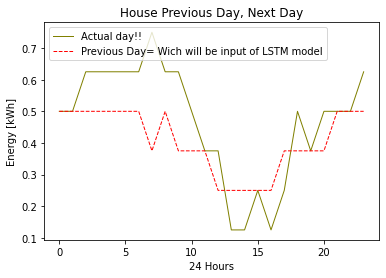

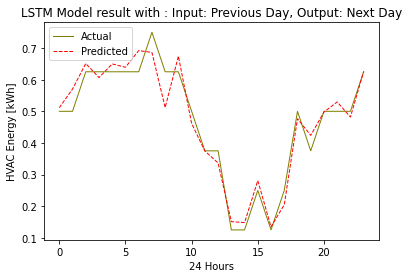

2020-02-03
 
 


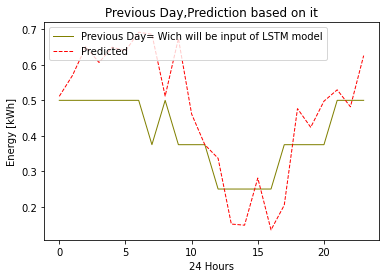

 
 
plot_act inversed:
[[4.]
 [4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [5.]
 [5.]
 [4.]
 [3.]
 [3.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [4.]
 [3.]
 [4.]
 [4.]
 [4.]
 [5.]]
plot_act orginal (cheking inverse)
data_time
2020-02-03 00:00:00    4.0
2020-02-03 01:00:00    4.0
2020-02-03 02:00:00    5.0
2020-02-03 03:00:00    5.0
2020-02-03 04:00:00    5.0
2020-02-03 05:00:00    5.0
2020-02-03 06:00:00    5.0
2020-02-03 07:00:00    6.0
2020-02-03 08:00:00    5.0
2020-02-03 09:00:00    5.0
2020-02-03 10:00:00    4.0
2020-02-03 11:00:00    3.0
2020-02-03 12:00:00    3.0
2020-02-03 13:00:00    1.0
2020-02-03 14:00:00    1.0
2020-02-03 15:00:00    2.0
2020-02-03 16:00:00    1.0
2020-02-03 17:00:00    2.0
2020-02-03 18:00:00    4.0
2020-02-03 19:00:00    3.0
2020-02-03 20:00:00    4.0
2020-02-03 21:00:00    4.0
2020-02-03 22:00:00    4.0
2020-02-03 23:00:00    5.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.5113419  0.5703752  0.6511036  0.60673654 0.6498643  0.6392674

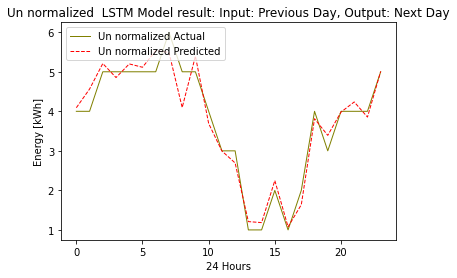

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1704, 6)
  
  
Previous Day : input 
[0.5   0.5   0.625 0.625 0.625 0.625 0.625 0.75  0.625 0.625 0.5   0.375
 0.375 0.125 0.125 0.25  0.125 0.25  0.5   0.375 0.5   0.5   0.5   0.625]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.625]
  [0.625]
  [0.625]
  [0.625]
  [0.625]
  [0.75 ]
  [0.625]
  [0.625]
  [0.5  ]
  [0.375]
  [0.375]
  [0.125]
  [0.125]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.625]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.625 0.625 0.625 0.5   0.625 0.5   0.625 0.625 0.5   0.625 0.375
 0.375 0.375 0.125 0.25  0.25  0.25  0.375 0.5   0.375 0.5   0.375 0.5  ]
  
test day i = 9
2020-02-04
 
 


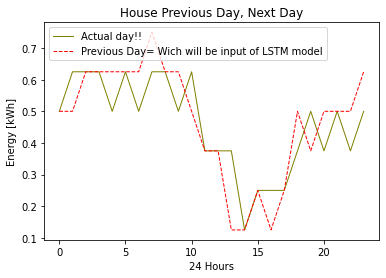

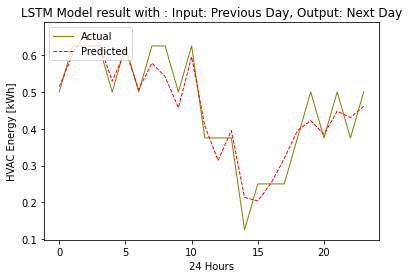

2020-02-04
 
 


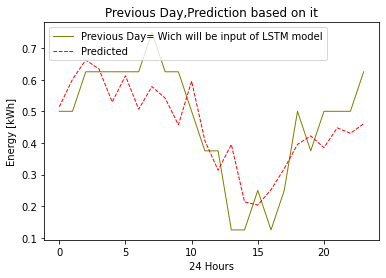

 
 
plot_act inversed:
[[4.]
 [5.]
 [5.]
 [5.]
 [4.]
 [5.]
 [4.]
 [5.]
 [5.]
 [4.]
 [5.]
 [3.]
 [3.]
 [3.]
 [1.]
 [2.]
 [2.]
 [2.]
 [3.]
 [4.]
 [3.]
 [4.]
 [3.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2020-02-04 00:00:00    4.0
2020-02-04 01:00:00    5.0
2020-02-04 02:00:00    5.0
2020-02-04 03:00:00    5.0
2020-02-04 04:00:00    4.0
2020-02-04 05:00:00    5.0
2020-02-04 06:00:00    4.0
2020-02-04 07:00:00    5.0
2020-02-04 08:00:00    5.0
2020-02-04 09:00:00    4.0
2020-02-04 10:00:00    5.0
2020-02-04 11:00:00    3.0
2020-02-04 12:00:00    3.0
2020-02-04 13:00:00    3.0
2020-02-04 14:00:00    1.0
2020-02-04 15:00:00    2.0
2020-02-04 16:00:00    2.0
2020-02-04 17:00:00    2.0
2020-02-04 18:00:00    3.0
2020-02-04 19:00:00    4.0
2020-02-04 20:00:00    3.0
2020-02-04 21:00:00    4.0
2020-02-04 22:00:00    3.0
2020-02-04 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.5142903  0.6012502  0.6622262  0.63368267 0.52933764 0.6122939

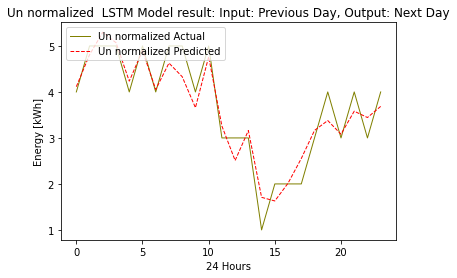

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1728, 6)
  
  
Previous Day : input 
[0.5   0.625 0.625 0.625 0.5   0.625 0.5   0.625 0.625 0.5   0.625 0.375
 0.375 0.375 0.125 0.25  0.25  0.25  0.375 0.5   0.375 0.5   0.375 0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.625]
  [0.625]
  [0.625]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.625]
  [0.625]
  [0.5  ]
  [0.625]
  [0.375]
  [0.375]
  [0.375]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.5   0.625 0.5   0.5   0.625 0.5   0.5   0.625 0.375 0.375
 0.125 0.25  0.125 0.125 0.    0.25  0.25  0.5   0.5   0.5   0.625 0.625]
  
test day i = 10
2020-02-05
 
 


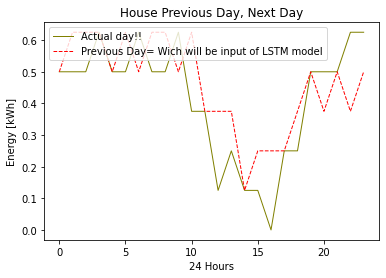

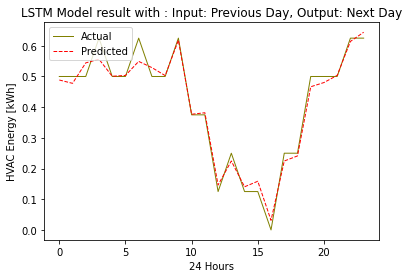

2020-02-05
 
 


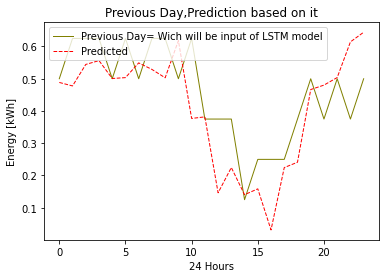

 
 
plot_act inversed:
[[4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [5.]
 [3.]
 [3.]
 [1.]
 [2.]
 [1.]
 [1.]
 [0.]
 [2.]
 [2.]
 [4.]
 [4.]
 [4.]
 [5.]
 [5.]]
plot_act orginal (cheking inverse)
data_time
2020-02-05 00:00:00    4.0
2020-02-05 01:00:00    4.0
2020-02-05 02:00:00    4.0
2020-02-05 03:00:00    5.0
2020-02-05 04:00:00    4.0
2020-02-05 05:00:00    4.0
2020-02-05 06:00:00    5.0
2020-02-05 07:00:00    4.0
2020-02-05 08:00:00    4.0
2020-02-05 09:00:00    5.0
2020-02-05 10:00:00    3.0
2020-02-05 11:00:00    3.0
2020-02-05 12:00:00    1.0
2020-02-05 13:00:00    2.0
2020-02-05 14:00:00    1.0
2020-02-05 15:00:00    1.0
2020-02-05 16:00:00    0.0
2020-02-05 17:00:00    2.0
2020-02-05 18:00:00    2.0
2020-02-05 19:00:00    4.0
2020-02-05 20:00:00    4.0
2020-02-05 21:00:00    4.0
2020-02-05 22:00:00    5.0
2020-02-05 23:00:00    5.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.48852795 0.47767532 0.5443602  0.55621606 0.5007485  0.5034597

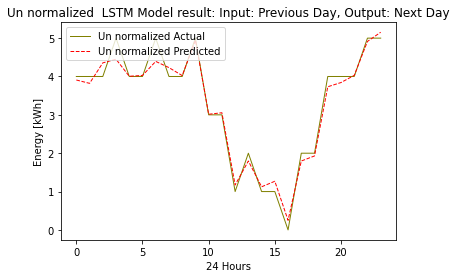

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1752, 6)
  
  
Previous Day : input 
[0.5   0.5   0.5   0.625 0.5   0.5   0.625 0.5   0.5   0.625 0.375 0.375
 0.125 0.25  0.125 0.125 0.    0.25  0.25  0.5   0.5   0.5   0.625 0.625]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.375]
  [0.375]
  [0.125]
  [0.25 ]
  [0.125]
  [0.125]
  [0.   ]
  [0.25 ]
  [0.25 ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.625]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.75  0.625 0.625 0.75  0.625 0.625 0.75  0.75  0.625 0.5   0.25
 0.25  0.125 0.125 0.25  0.125 0.25  0.25  0.5   0.375 0.625 0.5   0.625]
  
test day i = 11
2020-02-06
 
 


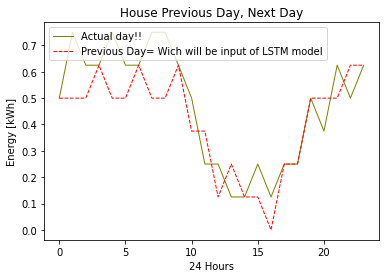

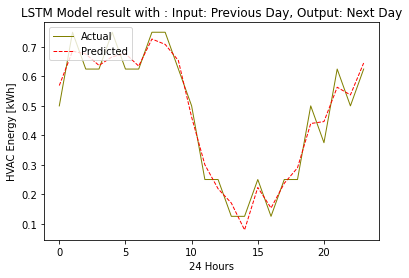

2020-02-06
 
 


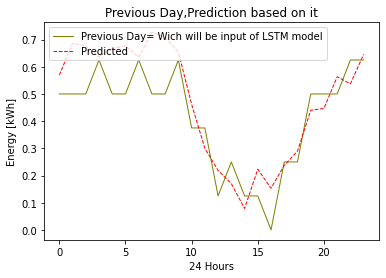

 
 
plot_act inversed:
[[4.]
 [6.]
 [5.]
 [5.]
 [6.]
 [5.]
 [5.]
 [6.]
 [6.]
 [5.]
 [4.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [4.]
 [3.]
 [5.]
 [4.]
 [5.]]
plot_act orginal (cheking inverse)
data_time
2020-02-06 00:00:00    4.0
2020-02-06 01:00:00    6.0
2020-02-06 02:00:00    5.0
2020-02-06 03:00:00    5.0
2020-02-06 04:00:00    6.0
2020-02-06 05:00:00    5.0
2020-02-06 06:00:00    5.0
2020-02-06 07:00:00    6.0
2020-02-06 08:00:00    6.0
2020-02-06 09:00:00    5.0
2020-02-06 10:00:00    4.0
2020-02-06 11:00:00    2.0
2020-02-06 12:00:00    2.0
2020-02-06 13:00:00    1.0
2020-02-06 14:00:00    1.0
2020-02-06 15:00:00    2.0
2020-02-06 16:00:00    1.0
2020-02-06 17:00:00    2.0
2020-02-06 18:00:00    2.0
2020-02-06 19:00:00    4.0
2020-02-06 20:00:00    3.0
2020-02-06 21:00:00    5.0
2020-02-06 22:00:00    4.0
2020-02-06 23:00:00    5.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.56909615 0.685989   0.6762319  0.63732713 0.6669352  0.6771464

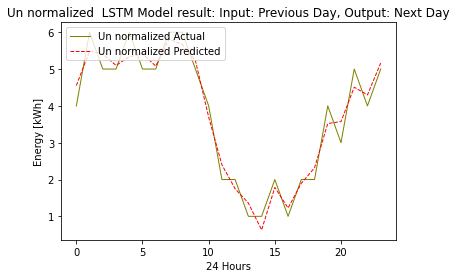

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1776, 6)
  
  
Previous Day : input 
[0.5   0.75  0.625 0.625 0.75  0.625 0.625 0.75  0.75  0.625 0.5   0.25
 0.25  0.125 0.125 0.25  0.125 0.25  0.25  0.5   0.375 0.625 0.5   0.625]
  
  
exact before put in the model 
[[[0.5  ]
  [0.75 ]
  [0.625]
  [0.625]
  [0.75 ]
  [0.625]
  [0.625]
  [0.75 ]
  [0.75 ]
  [0.625]
  [0.5  ]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.125]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.5  ]
  [0.375]
  [0.625]
  [0.5  ]
  [0.625]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.625 0.625 0.625 0.75  0.75  0.75  0.75  0.625 0.75  0.625 0.5   0.375
 0.25  0.125 0.25  0.125 0.125 0.25  0.375 0.25  0.5   0.5   0.625 0.625]
  
test day i = 12
2020-02-07
 
 


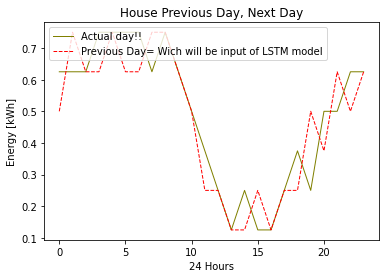

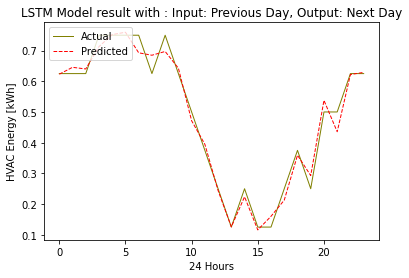

2020-02-07
 
 


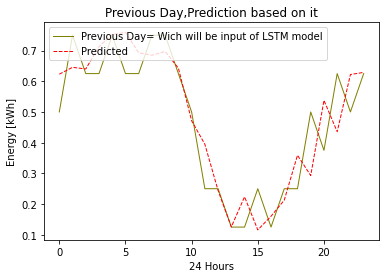

 
 
plot_act inversed:
[[5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [5.]
 [6.]
 [5.]
 [4.]
 [3.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [3.]
 [2.]
 [4.]
 [4.]
 [5.]
 [5.]]
plot_act orginal (cheking inverse)
data_time
2020-02-07 00:00:00    5.0
2020-02-07 01:00:00    5.0
2020-02-07 02:00:00    5.0
2020-02-07 03:00:00    6.0
2020-02-07 04:00:00    6.0
2020-02-07 05:00:00    6.0
2020-02-07 06:00:00    6.0
2020-02-07 07:00:00    5.0
2020-02-07 08:00:00    6.0
2020-02-07 09:00:00    5.0
2020-02-07 10:00:00    4.0
2020-02-07 11:00:00    3.0
2020-02-07 12:00:00    2.0
2020-02-07 13:00:00    1.0
2020-02-07 14:00:00    2.0
2020-02-07 15:00:00    1.0
2020-02-07 16:00:00    1.0
2020-02-07 17:00:00    2.0
2020-02-07 18:00:00    3.0
2020-02-07 19:00:00    2.0
2020-02-07 20:00:00    4.0
2020-02-07 21:00:00    4.0
2020-02-07 22:00:00    5.0
2020-02-07 23:00:00    5.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.6230505  0.64544153 0.6400738  0.71296173 0.7521287  0.759696


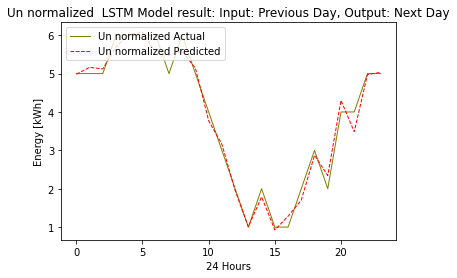

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1800, 6)
  
  
Previous Day : input 
[0.625 0.625 0.625 0.75  0.75  0.75  0.75  0.625 0.75  0.625 0.5   0.375
 0.25  0.125 0.25  0.125 0.125 0.25  0.375 0.25  0.5   0.5   0.625 0.625]
  
  
exact before put in the model 
[[[0.625]
  [0.625]
  [0.625]
  [0.75 ]
  [0.75 ]
  [0.75 ]
  [0.75 ]
  [0.625]
  [0.75 ]
  [0.625]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.125]
  [0.125]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.625]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.625 0.625 0.75  0.5   0.625 0.5   0.625 0.375 0.5   0.5   0.375
 0.25  0.25  0.125 0.125 0.125 0.25  0.375 0.5   0.375 0.5   0.5   0.5  ]
  
test day i = 13
2020-02-08
 
 


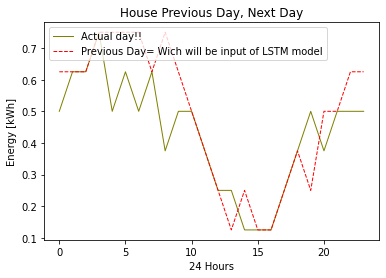

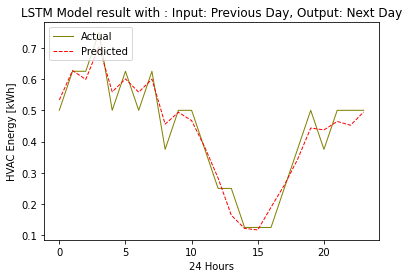

2020-02-08
 
 


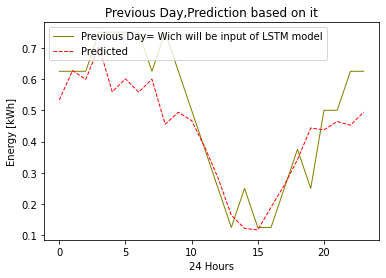

 
 
plot_act inversed:
[[4.]
 [5.]
 [5.]
 [6.]
 [4.]
 [5.]
 [4.]
 [5.]
 [3.]
 [4.]
 [4.]
 [3.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [3.]
 [4.]
 [3.]
 [4.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2020-02-08 00:00:00    4.0
2020-02-08 01:00:00    5.0
2020-02-08 02:00:00    5.0
2020-02-08 03:00:00    6.0
2020-02-08 04:00:00    4.0
2020-02-08 05:00:00    5.0
2020-02-08 06:00:00    4.0
2020-02-08 07:00:00    5.0
2020-02-08 08:00:00    3.0
2020-02-08 09:00:00    4.0
2020-02-08 10:00:00    4.0
2020-02-08 11:00:00    3.0
2020-02-08 12:00:00    2.0
2020-02-08 13:00:00    2.0
2020-02-08 14:00:00    1.0
2020-02-08 15:00:00    1.0
2020-02-08 16:00:00    1.0
2020-02-08 17:00:00    2.0
2020-02-08 18:00:00    3.0
2020-02-08 19:00:00    4.0
2020-02-08 20:00:00    3.0
2020-02-08 21:00:00    4.0
2020-02-08 22:00:00    4.0
2020-02-08 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.53318155 0.6271844  0.59909475 0.70436496 0.5592053  0.6007075

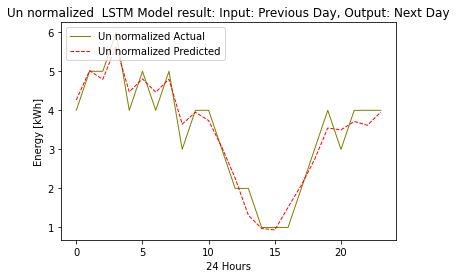

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1824, 6)
  
  
Previous Day : input 
[0.5   0.625 0.625 0.75  0.5   0.625 0.5   0.625 0.375 0.5   0.5   0.375
 0.25  0.25  0.125 0.125 0.125 0.25  0.375 0.5   0.375 0.5   0.5   0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.625]
  [0.625]
  [0.75 ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.625]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.5   0.625 0.5   0.5   0.625 0.5   0.5   0.625 0.375 0.5
 0.5   0.375 0.375 0.25  0.375 0.375 0.375 0.5   0.375 0.5   0.5   0.375]
  
test day i = 14
2020-02-09
 
 


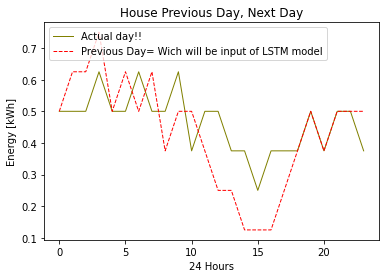

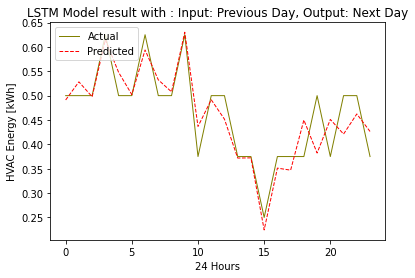

2020-02-09
 
 


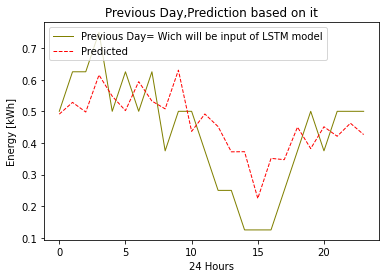

 
 
plot_act inversed:
[[4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [5.]
 [3.]
 [4.]
 [4.]
 [3.]
 [3.]
 [2.]
 [3.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [4.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2020-02-09 00:00:00    4.0
2020-02-09 01:00:00    4.0
2020-02-09 02:00:00    4.0
2020-02-09 03:00:00    5.0
2020-02-09 04:00:00    4.0
2020-02-09 05:00:00    4.0
2020-02-09 06:00:00    5.0
2020-02-09 07:00:00    4.0
2020-02-09 08:00:00    4.0
2020-02-09 09:00:00    5.0
2020-02-09 10:00:00    3.0
2020-02-09 11:00:00    4.0
2020-02-09 12:00:00    4.0
2020-02-09 13:00:00    3.0
2020-02-09 14:00:00    3.0
2020-02-09 15:00:00    2.0
2020-02-09 16:00:00    3.0
2020-02-09 17:00:00    3.0
2020-02-09 18:00:00    3.0
2020-02-09 19:00:00    4.0
2020-02-09 20:00:00    3.0
2020-02-09 21:00:00    4.0
2020-02-09 22:00:00    4.0
2020-02-09 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.49109185 0.5282661  0.4977284  0.61481225 0.5478234  0.5021778

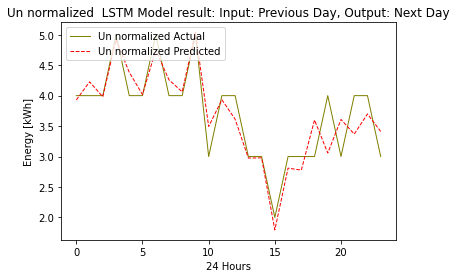

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1848, 6)
  
  
Previous Day : input 
[0.5   0.5   0.5   0.625 0.5   0.5   0.625 0.5   0.5   0.625 0.375 0.5
 0.5   0.375 0.375 0.25  0.375 0.375 0.375 0.5   0.375 0.5   0.5   0.375]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.375]
  [0.25 ]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.375 0.5   0.375 0.5   0.375
 0.25  0.25  0.25  0.25  0.25  0.375 0.375 0.25  0.5   0.375 0.375 0.5  ]
  
test day i = 15
2020-02-10
 
 


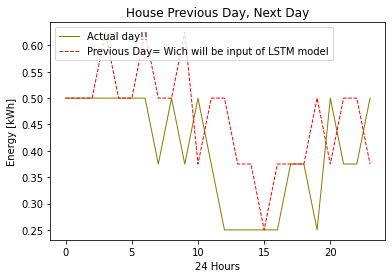

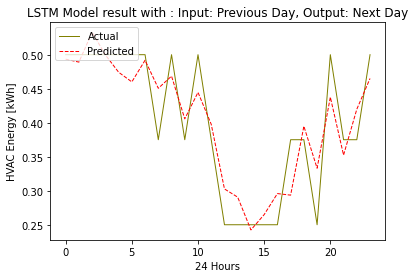

2020-02-10
 
 


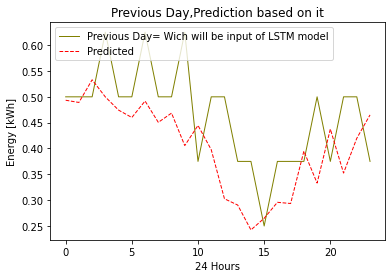

 
 
plot_act inversed:
[[4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [3.]
 [4.]
 [3.]
 [4.]
 [3.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [2.]
 [4.]
 [3.]
 [3.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2020-02-10 00:00:00    4.0
2020-02-10 01:00:00    4.0
2020-02-10 02:00:00    4.0
2020-02-10 03:00:00    4.0
2020-02-10 04:00:00    4.0
2020-02-10 05:00:00    4.0
2020-02-10 06:00:00    4.0
2020-02-10 07:00:00    3.0
2020-02-10 08:00:00    4.0
2020-02-10 09:00:00    3.0
2020-02-10 10:00:00    4.0
2020-02-10 11:00:00    3.0
2020-02-10 12:00:00    2.0
2020-02-10 13:00:00    2.0
2020-02-10 14:00:00    2.0
2020-02-10 15:00:00    2.0
2020-02-10 16:00:00    2.0
2020-02-10 17:00:00    3.0
2020-02-10 18:00:00    3.0
2020-02-10 19:00:00    2.0
2020-02-10 20:00:00    4.0
2020-02-10 21:00:00    3.0
2020-02-10 22:00:00    3.0
2020-02-10 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.4933861  0.4891032  0.5329857  0.49972874 0.47424623 0.4599867

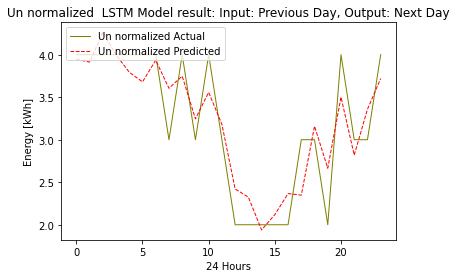

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1872, 6)
  
  
Previous Day : input 
[0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.375 0.5   0.375 0.5   0.375
 0.25  0.25  0.25  0.25  0.25  0.375 0.375 0.25  0.5   0.375 0.375 0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.25 ]
  [0.5  ]
  [0.375]
  [0.375]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.5   0.5   0.5   0.625 0.375 0.75  0.375 0.5   0.375 0.5   0.25
 0.25  0.125 0.    0.125 0.    0.    0.25  0.375 0.375 0.5   0.5   0.5  ]
  
test day i = 16
2020-02-11
 
 


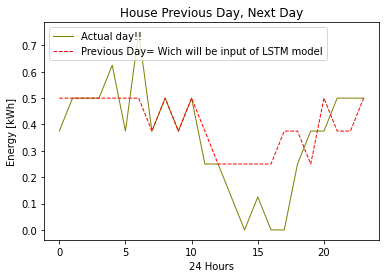

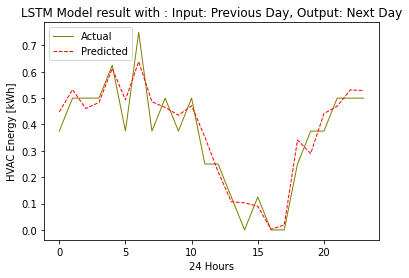

2020-02-11
 
 


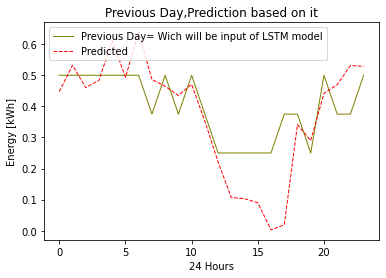

 
 
plot_act inversed:
[[3.]
 [4.]
 [4.]
 [4.]
 [5.]
 [3.]
 [6.]
 [3.]
 [4.]
 [3.]
 [4.]
 [2.]
 [2.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [2.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2020-02-11 00:00:00    3.0
2020-02-11 01:00:00    4.0
2020-02-11 02:00:00    4.0
2020-02-11 03:00:00    4.0
2020-02-11 04:00:00    5.0
2020-02-11 05:00:00    3.0
2020-02-11 06:00:00    6.0
2020-02-11 07:00:00    3.0
2020-02-11 08:00:00    4.0
2020-02-11 09:00:00    3.0
2020-02-11 10:00:00    4.0
2020-02-11 11:00:00    2.0
2020-02-11 12:00:00    2.0
2020-02-11 13:00:00    1.0
2020-02-11 14:00:00    0.0
2020-02-11 15:00:00    1.0
2020-02-11 16:00:00    0.0
2020-02-11 17:00:00    0.0
2020-02-11 18:00:00    2.0
2020-02-11 19:00:00    3.0
2020-02-11 20:00:00    3.0
2020-02-11 21:00:00    4.0
2020-02-11 22:00:00    4.0
2020-02-11 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.4476059  0.532313   0.46034825 0.48357308 0.61203563 0.4935989

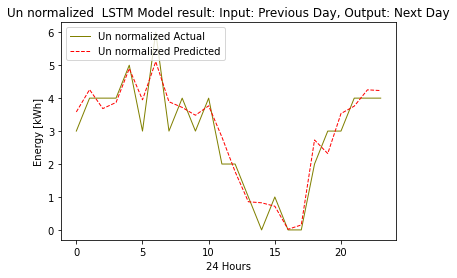

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1896, 6)
  
  
Previous Day : input 
[0.375 0.5   0.5   0.5   0.625 0.375 0.75  0.375 0.5   0.375 0.5   0.25
 0.25  0.125 0.    0.125 0.    0.    0.25  0.375 0.375 0.5   0.5   0.5  ]
  
  
exact before put in the model 
[[[0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.375]
  [0.75 ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.   ]
  [0.125]
  [0.   ]
  [0.   ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.625 0.625 0.625 0.625 0.5   0.5   0.375 0.625 0.375 0.375 0.25
 0.125 0.125 0.    0.125 0.    0.125 0.375 0.25  0.375 0.25  0.375 0.375]
  
test day i = 17
2020-02-12
 
 


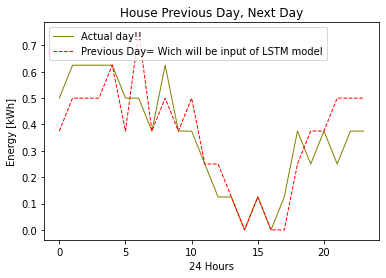

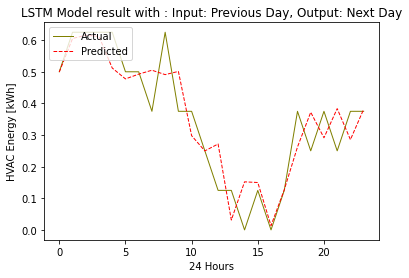

2020-02-12
 
 


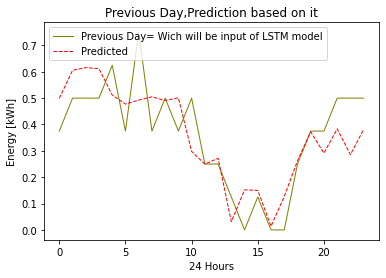

 
 
plot_act inversed:
[[4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [4.]
 [4.]
 [3.]
 [5.]
 [3.]
 [3.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [3.]
 [2.]
 [3.]
 [2.]
 [3.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2020-02-12 00:00:00    4.0
2020-02-12 01:00:00    5.0
2020-02-12 02:00:00    5.0
2020-02-12 03:00:00    5.0
2020-02-12 04:00:00    5.0
2020-02-12 05:00:00    4.0
2020-02-12 06:00:00    4.0
2020-02-12 07:00:00    3.0
2020-02-12 08:00:00    5.0
2020-02-12 09:00:00    3.0
2020-02-12 10:00:00    3.0
2020-02-12 11:00:00    2.0
2020-02-12 12:00:00    1.0
2020-02-12 13:00:00    1.0
2020-02-12 14:00:00    0.0
2020-02-12 15:00:00    1.0
2020-02-12 16:00:00    0.0
2020-02-12 17:00:00    1.0
2020-02-12 18:00:00    3.0
2020-02-12 19:00:00    2.0
2020-02-12 20:00:00    3.0
2020-02-12 21:00:00    2.0
2020-02-12 22:00:00    3.0
2020-02-12 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.4993716  0.6052242  0.61570066 0.61175114 0.5119028  0.4774652

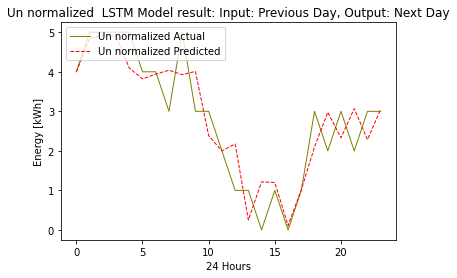

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1920, 6)
  
  
Previous Day : input 
[0.5   0.625 0.625 0.625 0.625 0.5   0.5   0.375 0.625 0.375 0.375 0.25
 0.125 0.125 0.    0.125 0.    0.125 0.375 0.25  0.375 0.25  0.375 0.375]
  
  
exact before put in the model 
[[[0.5  ]
  [0.625]
  [0.625]
  [0.625]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.625]
  [0.375]
  [0.375]
  [0.25 ]
  [0.125]
  [0.125]
  [0.   ]
  [0.125]
  [0.   ]
  [0.125]
  [0.375]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.375]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.375 0.375 0.5   0.5   0.375 0.375 0.375 0.375 0.375 0.375 0.25
 0.25  0.25  0.125 0.125 0.125 0.25  0.125 0.25  0.375 0.375 0.375 0.375]
  
test day i = 18
2020-02-13
 
 


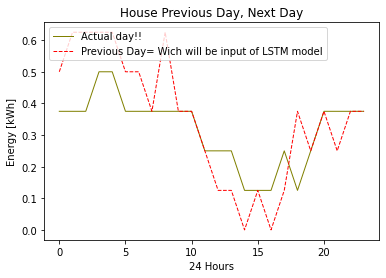

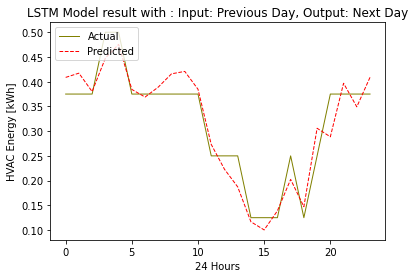

2020-02-13
 
 


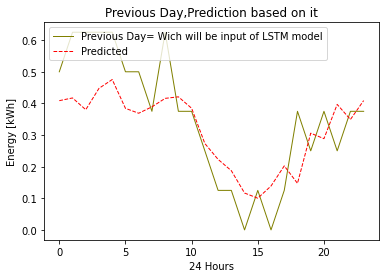

 
 
plot_act inversed:
[[3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2020-02-13 00:00:00    3.0
2020-02-13 01:00:00    3.0
2020-02-13 02:00:00    3.0
2020-02-13 03:00:00    4.0
2020-02-13 04:00:00    4.0
2020-02-13 05:00:00    3.0
2020-02-13 06:00:00    3.0
2020-02-13 07:00:00    3.0
2020-02-13 08:00:00    3.0
2020-02-13 09:00:00    3.0
2020-02-13 10:00:00    3.0
2020-02-13 11:00:00    2.0
2020-02-13 12:00:00    2.0
2020-02-13 13:00:00    2.0
2020-02-13 14:00:00    1.0
2020-02-13 15:00:00    1.0
2020-02-13 16:00:00    1.0
2020-02-13 17:00:00    2.0
2020-02-13 18:00:00    1.0
2020-02-13 19:00:00    2.0
2020-02-13 20:00:00    3.0
2020-02-13 21:00:00    3.0
2020-02-13 22:00:00    3.0
2020-02-13 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.40868235 0.41725656 0.3800581  0.4476264  0.47543907 0.3843699

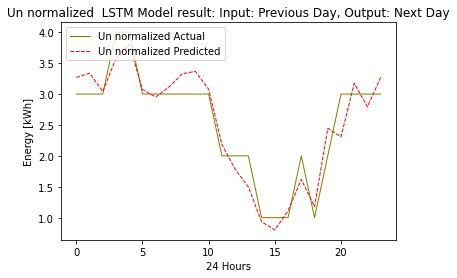

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1944, 6)
  
  
Previous Day : input 
[0.375 0.375 0.375 0.5   0.5   0.375 0.375 0.375 0.375 0.375 0.375 0.25
 0.25  0.25  0.125 0.125 0.125 0.25  0.125 0.25  0.375 0.375 0.375 0.375]
  
  
exact before put in the model 
[[[0.375]
  [0.375]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.375]
  [0.375]
  [0.375]
  [0.375]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.375]
  [0.375]
  [0.375]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.375 0.5   0.375 0.5   0.375 0.5   0.5   0.5   0.5   0.25  0.25
 0.    0.125 0.    0.125 0.125 0.125 0.375 0.25  0.375 0.375 0.375 0.375]
  
test day i = 19
2020-02-14
 
 


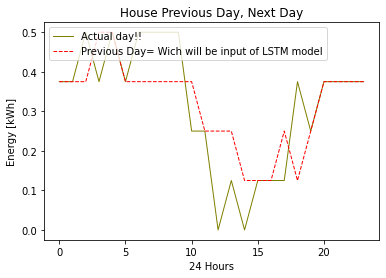

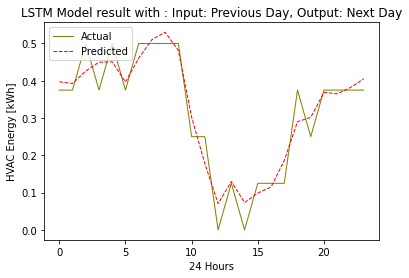

2020-02-14
 
 


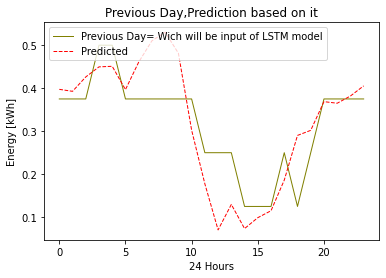

 
 
plot_act inversed:
[[3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [2.]
 [2.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [3.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2020-02-14 00:00:00    3.0
2020-02-14 01:00:00    3.0
2020-02-14 02:00:00    4.0
2020-02-14 03:00:00    3.0
2020-02-14 04:00:00    4.0
2020-02-14 05:00:00    3.0
2020-02-14 06:00:00    4.0
2020-02-14 07:00:00    4.0
2020-02-14 08:00:00    4.0
2020-02-14 09:00:00    4.0
2020-02-14 10:00:00    2.0
2020-02-14 11:00:00    2.0
2020-02-14 12:00:00    0.0
2020-02-14 13:00:00    1.0
2020-02-14 14:00:00    0.0
2020-02-14 15:00:00    1.0
2020-02-14 16:00:00    1.0
2020-02-14 17:00:00    1.0
2020-02-14 18:00:00    3.0
2020-02-14 19:00:00    2.0
2020-02-14 20:00:00    3.0
2020-02-14 21:00:00    3.0
2020-02-14 22:00:00    3.0
2020-02-14 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.39737082 0.3927182  0.4261694  0.44963485 0.45093343 0.3967254

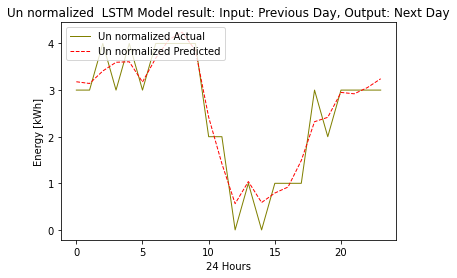

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1968, 6)
  
  
Previous Day : input 
[0.375 0.375 0.5   0.375 0.5   0.375 0.5   0.5   0.5   0.5   0.25  0.25
 0.    0.125 0.    0.125 0.125 0.125 0.375 0.25  0.375 0.375 0.375 0.375]
  
  
exact before put in the model 
[[[0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.25 ]
  [0.25 ]
  [0.   ]
  [0.125]
  [0.   ]
  [0.125]
  [0.125]
  [0.125]
  [0.375]
  [0.25 ]
  [0.375]
  [0.375]
  [0.375]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.375 0.375 0.5   0.375 0.5   0.375 0.375 0.375 0.5   0.375 0.25
 0.375 0.25  0.375 0.125 0.25  0.25  0.25  0.5   0.375 0.375 0.375 0.375]
  
test day i = 20
2020-02-15
 
 


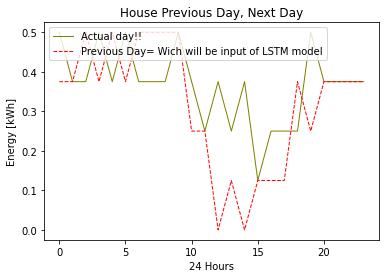

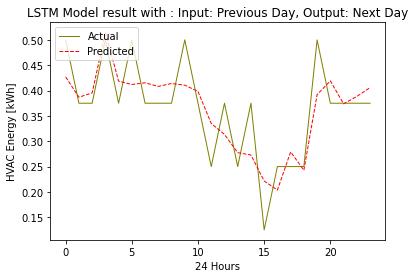

2020-02-15
 
 


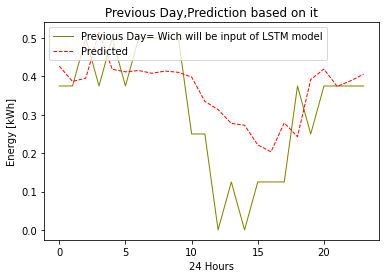

 
 
plot_act inversed:
[[4.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [3.]
 [3.]
 [3.]
 [4.]
 [3.]
 [2.]
 [3.]
 [2.]
 [3.]
 [1.]
 [2.]
 [2.]
 [2.]
 [4.]
 [3.]
 [3.]
 [3.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2020-02-15 00:00:00    4.0
2020-02-15 01:00:00    3.0
2020-02-15 02:00:00    3.0
2020-02-15 03:00:00    4.0
2020-02-15 04:00:00    3.0
2020-02-15 05:00:00    4.0
2020-02-15 06:00:00    3.0
2020-02-15 07:00:00    3.0
2020-02-15 08:00:00    3.0
2020-02-15 09:00:00    4.0
2020-02-15 10:00:00    3.0
2020-02-15 11:00:00    2.0
2020-02-15 12:00:00    3.0
2020-02-15 13:00:00    2.0
2020-02-15 14:00:00    3.0
2020-02-15 15:00:00    1.0
2020-02-15 16:00:00    2.0
2020-02-15 17:00:00    2.0
2020-02-15 18:00:00    2.0
2020-02-15 19:00:00    4.0
2020-02-15 20:00:00    3.0
2020-02-15 21:00:00    3.0
2020-02-15 22:00:00    3.0
2020-02-15 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.42691034 0.38686198 0.39532012 0.51506484 0.41858944 0.4119351

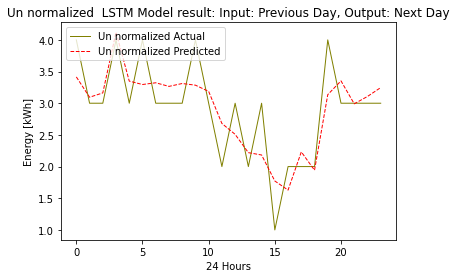

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(1992, 6)
  
  
Previous Day : input 
[0.5   0.375 0.375 0.5   0.375 0.5   0.375 0.375 0.375 0.5   0.375 0.25
 0.375 0.25  0.375 0.125 0.25  0.25  0.25  0.5   0.375 0.375 0.375 0.375]
  
  
exact before put in the model 
[[[0.5  ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.375]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.5  ]
  [0.375]
  [0.375]
  [0.375]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.5   0.5   0.625 0.5   0.5   0.625 0.5   0.5   0.5   0.375
 0.25  0.125 0.25  0.25  0.125 0.25  0.25  0.25  0.375 0.375 0.5   0.5  ]
  
test day i = 21
2020-02-16
 
 


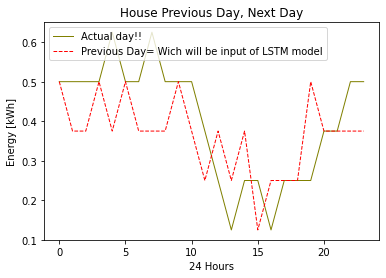

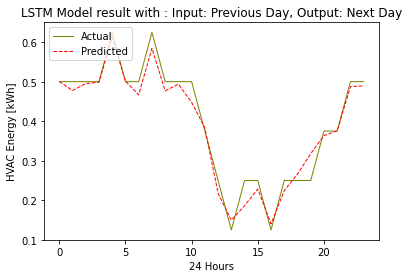

2020-02-16
 
 


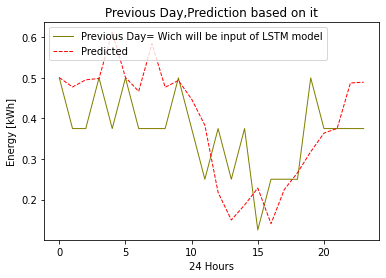

 
 
plot_act inversed:
[[4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [3.]
 [2.]
 [1.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2020-02-16 00:00:00    4.0
2020-02-16 01:00:00    4.0
2020-02-16 02:00:00    4.0
2020-02-16 03:00:00    4.0
2020-02-16 04:00:00    5.0
2020-02-16 05:00:00    4.0
2020-02-16 06:00:00    4.0
2020-02-16 07:00:00    5.0
2020-02-16 08:00:00    4.0
2020-02-16 09:00:00    4.0
2020-02-16 10:00:00    4.0
2020-02-16 11:00:00    3.0
2020-02-16 12:00:00    2.0
2020-02-16 13:00:00    1.0
2020-02-16 14:00:00    2.0
2020-02-16 15:00:00    2.0
2020-02-16 16:00:00    1.0
2020-02-16 17:00:00    2.0
2020-02-16 18:00:00    2.0
2020-02-16 19:00:00    2.0
2020-02-16 20:00:00    3.0
2020-02-16 21:00:00    3.0
2020-02-16 22:00:00    4.0
2020-02-16 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.5006243  0.47754616 0.49519747 0.49851078 0.6125771  0.5011049

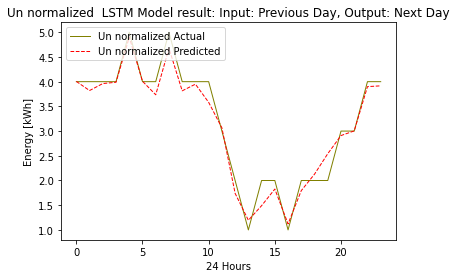

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2016, 6)
  
  
Previous Day : input 
[0.5   0.5   0.5   0.5   0.625 0.5   0.5   0.625 0.5   0.5   0.5   0.375
 0.25  0.125 0.25  0.25  0.125 0.25  0.25  0.25  0.375 0.375 0.5   0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.625 0.625 0.625 0.625 0.625 0.625 0.5   0.625 0.375 0.5
 0.25  0.125 0.125 0.125 0.25  0.125 0.25  0.375 0.375 0.375 0.625 0.5  ]
  
test day i = 22
2020-02-17
 
 


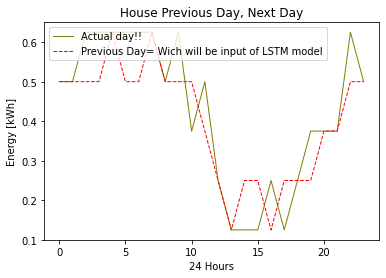

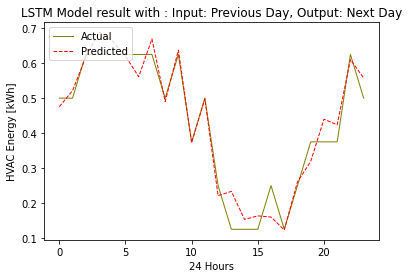

2020-02-17
 
 


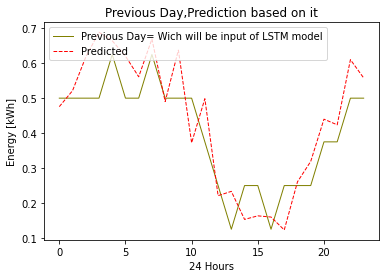

 
 
plot_act inversed:
[[4.]
 [4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [4.]
 [5.]
 [3.]
 [4.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [3.]
 [3.]
 [3.]
 [5.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2020-02-17 00:00:00    4.0
2020-02-17 01:00:00    4.0
2020-02-17 02:00:00    5.0
2020-02-17 03:00:00    5.0
2020-02-17 04:00:00    5.0
2020-02-17 05:00:00    5.0
2020-02-17 06:00:00    5.0
2020-02-17 07:00:00    5.0
2020-02-17 08:00:00    4.0
2020-02-17 09:00:00    5.0
2020-02-17 10:00:00    3.0
2020-02-17 11:00:00    4.0
2020-02-17 12:00:00    2.0
2020-02-17 13:00:00    1.0
2020-02-17 14:00:00    1.0
2020-02-17 15:00:00    1.0
2020-02-17 16:00:00    2.0
2020-02-17 17:00:00    1.0
2020-02-17 18:00:00    2.0
2020-02-17 19:00:00    3.0
2020-02-17 20:00:00    3.0
2020-02-17 21:00:00    3.0
2020-02-17 22:00:00    5.0
2020-02-17 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.47570407 0.5212939  0.6175073  0.6885297  0.6641423  0.6204263

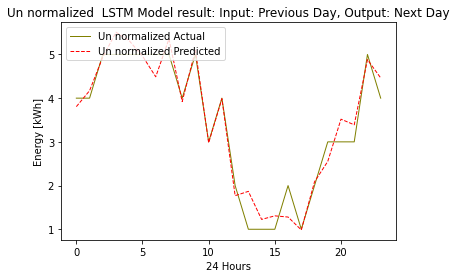

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2040, 6)
  
  
Previous Day : input 
[0.5   0.5   0.625 0.625 0.625 0.625 0.625 0.625 0.5   0.625 0.375 0.5
 0.25  0.125 0.125 0.125 0.25  0.125 0.25  0.375 0.375 0.375 0.625 0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.625]
  [0.625]
  [0.625]
  [0.625]
  [0.625]
  [0.625]
  [0.5  ]
  [0.625]
  [0.375]
  [0.5  ]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.375]
  [0.375]
  [0.375]
  [0.625]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.625 0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.5   0.375 0.375
 0.25  0.25  0.125 0.125 0.125 0.125 0.25  0.375 0.375 0.375 0.375 0.5  ]
  
test day i = 23
2020-02-18
 
 


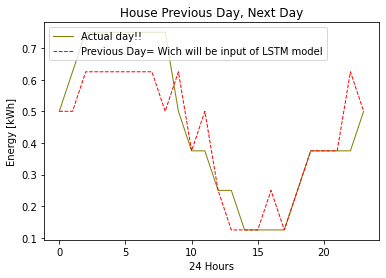

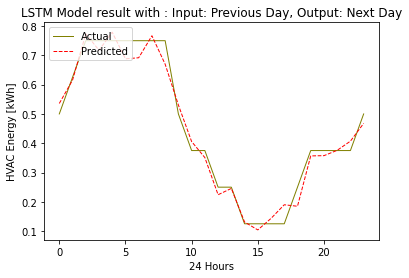

2020-02-18
 
 


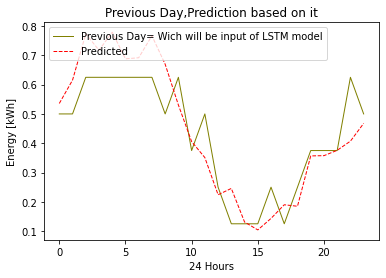

 
 
plot_act inversed:
[[4.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [6.]
 [4.]
 [3.]
 [3.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2020-02-18 00:00:00    4.0
2020-02-18 01:00:00    5.0
2020-02-18 02:00:00    6.0
2020-02-18 03:00:00    6.0
2020-02-18 04:00:00    6.0
2020-02-18 05:00:00    6.0
2020-02-18 06:00:00    6.0
2020-02-18 07:00:00    6.0
2020-02-18 08:00:00    6.0
2020-02-18 09:00:00    4.0
2020-02-18 10:00:00    3.0
2020-02-18 11:00:00    3.0
2020-02-18 12:00:00    2.0
2020-02-18 13:00:00    2.0
2020-02-18 14:00:00    1.0
2020-02-18 15:00:00    1.0
2020-02-18 16:00:00    1.0
2020-02-18 17:00:00    1.0
2020-02-18 18:00:00    2.0
2020-02-18 19:00:00    3.0
2020-02-18 20:00:00    3.0
2020-02-18 21:00:00    3.0
2020-02-18 22:00:00    3.0
2020-02-18 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.53576344 0.61531264 0.7732974  0.7175874  0.77883923 0.6880516

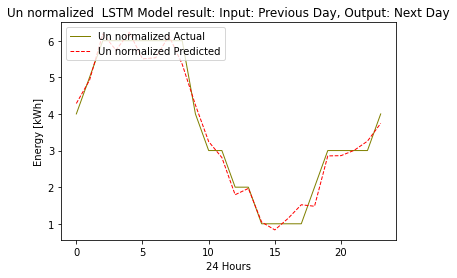

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2064, 6)
  
  
Previous Day : input 
[0.5   0.625 0.75  0.75  0.75  0.75  0.75  0.75  0.75  0.5   0.375 0.375
 0.25  0.25  0.125 0.125 0.125 0.125 0.25  0.375 0.375 0.375 0.375 0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.625]
  [0.75 ]
  [0.75 ]
  [0.75 ]
  [0.75 ]
  [0.75 ]
  [0.75 ]
  [0.75 ]
  [0.5  ]
  [0.375]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.375]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.625 0.5   0.5   0.625 0.5   0.5   0.5   0.5   0.375 0.125
 0.125 0.    0.125 0.    0.    0.    0.125 0.375 0.25  0.375 0.375 0.5  ]
  
test day i = 24
2020-02-19
 
 


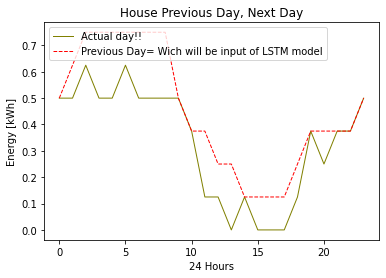

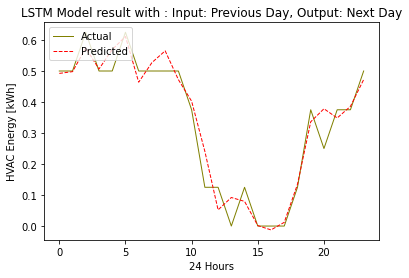

2020-02-19
 
 


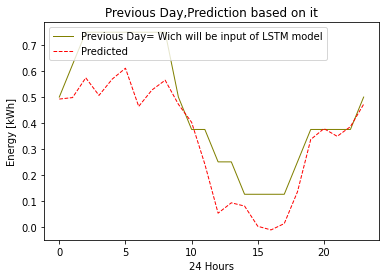

 
 
plot_act inversed:
[[4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [4.]
 [3.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [3.]
 [2.]
 [3.]
 [3.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2020-02-19 00:00:00    4.0
2020-02-19 01:00:00    4.0
2020-02-19 02:00:00    5.0
2020-02-19 03:00:00    4.0
2020-02-19 04:00:00    4.0
2020-02-19 05:00:00    5.0
2020-02-19 06:00:00    4.0
2020-02-19 07:00:00    4.0
2020-02-19 08:00:00    4.0
2020-02-19 09:00:00    4.0
2020-02-19 10:00:00    3.0
2020-02-19 11:00:00    1.0
2020-02-19 12:00:00    1.0
2020-02-19 13:00:00    0.0
2020-02-19 14:00:00    1.0
2020-02-19 15:00:00    0.0
2020-02-19 16:00:00    0.0
2020-02-19 17:00:00    0.0
2020-02-19 18:00:00    1.0
2020-02-19 19:00:00    3.0
2020-02-19 20:00:00    2.0
2020-02-19 21:00:00    3.0
2020-02-19 22:00:00    3.0
2020-02-19 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[ 0.49226564  0.49794763  0.5741448   0.5064743   0.5692825   0.6

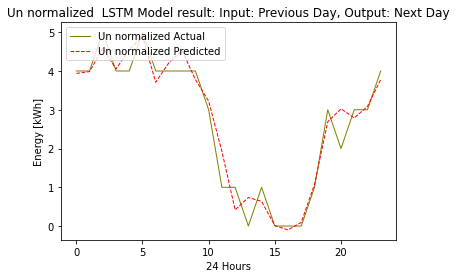

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2088, 6)
  
  
Previous Day : input 
[0.5   0.5   0.625 0.5   0.5   0.625 0.5   0.5   0.5   0.5   0.375 0.125
 0.125 0.    0.125 0.    0.    0.    0.125 0.375 0.25  0.375 0.375 0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.125]
  [0.125]
  [0.   ]
  [0.125]
  [0.   ]
  [0.   ]
  [0.   ]
  [0.125]
  [0.375]
  [0.25 ]
  [0.375]
  [0.375]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.625 0.5   0.625 0.625 0.75  0.625 0.75  0.625 0.5   0.375 0.375
 0.125 0.125 0.125 0.    0.    0.125 0.25  0.375 0.375 0.375 0.5   0.5  ]
  
test day i = 25
2020-02-20
 
 


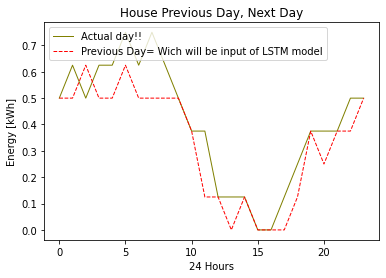

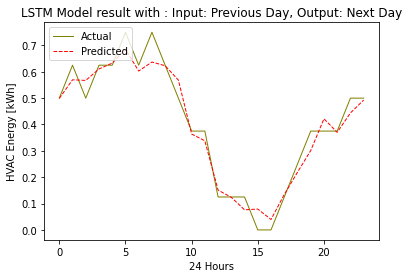

2020-02-20
 
 


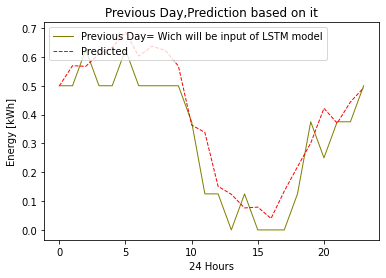

 
 
plot_act inversed:
[[4.]
 [5.]
 [4.]
 [5.]
 [5.]
 [6.]
 [5.]
 [6.]
 [5.]
 [4.]
 [3.]
 [3.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [2.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2020-02-20 00:00:00    4.0
2020-02-20 01:00:00    5.0
2020-02-20 02:00:00    4.0
2020-02-20 03:00:00    5.0
2020-02-20 04:00:00    5.0
2020-02-20 05:00:00    6.0
2020-02-20 06:00:00    5.0
2020-02-20 07:00:00    6.0
2020-02-20 08:00:00    5.0
2020-02-20 09:00:00    4.0
2020-02-20 10:00:00    3.0
2020-02-20 11:00:00    3.0
2020-02-20 12:00:00    1.0
2020-02-20 13:00:00    1.0
2020-02-20 14:00:00    1.0
2020-02-20 15:00:00    0.0
2020-02-20 16:00:00    0.0
2020-02-20 17:00:00    1.0
2020-02-20 18:00:00    2.0
2020-02-20 19:00:00    3.0
2020-02-20 20:00:00    3.0
2020-02-20 21:00:00    3.0
2020-02-20 22:00:00    4.0
2020-02-20 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.49904126 0.5695752  0.5672296  0.61057925 0.6328658  0.6855303

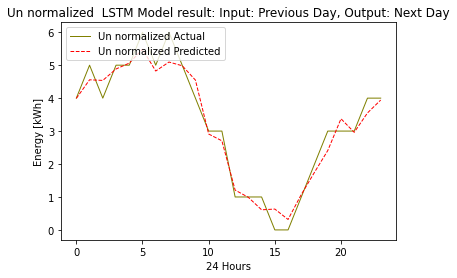

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2112, 6)
  
  
Previous Day : input 
[0.5   0.625 0.5   0.625 0.625 0.75  0.625 0.75  0.625 0.5   0.375 0.375
 0.125 0.125 0.125 0.    0.    0.125 0.25  0.375 0.375 0.375 0.5   0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.625]
  [0.5  ]
  [0.625]
  [0.625]
  [0.75 ]
  [0.625]
  [0.75 ]
  [0.625]
  [0.5  ]
  [0.375]
  [0.375]
  [0.125]
  [0.125]
  [0.125]
  [0.   ]
  [0.   ]
  [0.125]
  [0.25 ]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.625 0.375 0.5   0.375 0.375 0.5   0.375 0.5   0.375 0.25  0.25
 0.125 0.125 0.    0.    0.125 0.125 0.25  0.25  0.25  0.375 0.375 0.5  ]
  
test day i = 26
2020-02-21
 
 


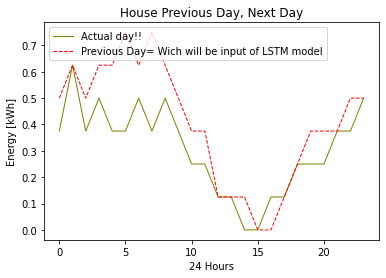

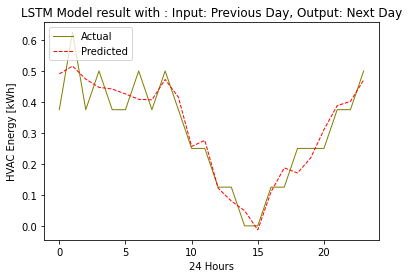

2020-02-21
 
 


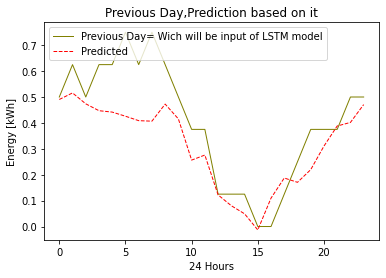

 
 
plot_act inversed:
[[3.]
 [5.]
 [3.]
 [4.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [3.]
 [2.]
 [2.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2020-02-21 00:00:00    3.0
2020-02-21 01:00:00    5.0
2020-02-21 02:00:00    3.0
2020-02-21 03:00:00    4.0
2020-02-21 04:00:00    3.0
2020-02-21 05:00:00    3.0
2020-02-21 06:00:00    4.0
2020-02-21 07:00:00    3.0
2020-02-21 08:00:00    4.0
2020-02-21 09:00:00    3.0
2020-02-21 10:00:00    2.0
2020-02-21 11:00:00    2.0
2020-02-21 12:00:00    1.0
2020-02-21 13:00:00    1.0
2020-02-21 14:00:00    0.0
2020-02-21 15:00:00    0.0
2020-02-21 16:00:00    1.0
2020-02-21 17:00:00    1.0
2020-02-21 18:00:00    2.0
2020-02-21 19:00:00    2.0
2020-02-21 20:00:00    2.0
2020-02-21 21:00:00    3.0
2020-02-21 22:00:00    3.0
2020-02-21 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[ 0.49047494  0.5157416   0.47369343  0.4471103   0.4417492   0.4

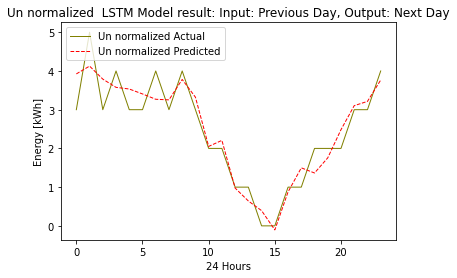

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2136, 6)
  
  
Previous Day : input 
[0.375 0.625 0.375 0.5   0.375 0.375 0.5   0.375 0.5   0.375 0.25  0.25
 0.125 0.125 0.    0.    0.125 0.125 0.25  0.25  0.25  0.375 0.375 0.5  ]
  
  
exact before put in the model 
[[[0.375]
  [0.625]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.125]
  [0.   ]
  [0.   ]
  [0.125]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.375 0.5   0.5   0.5   0.375 0.375 0.5   0.5   0.5   0.375 0.25
 0.125 0.125 0.125 0.125 0.125 0.25  0.25  0.25  0.5   0.375 0.375 0.375]
  
test day i = 27
2020-02-22
 
 


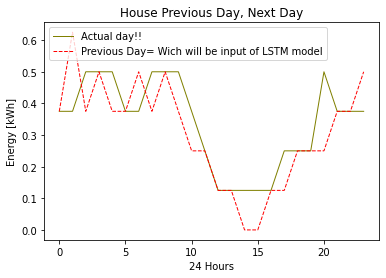

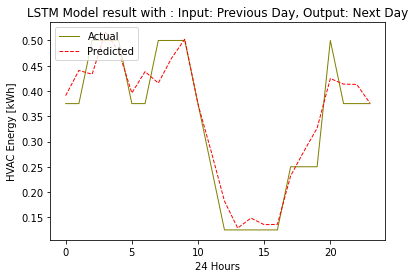

2020-02-22
 
 


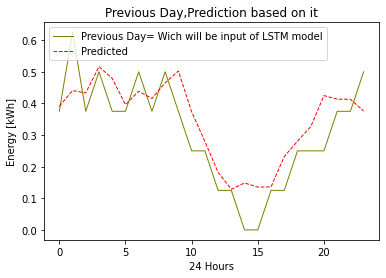

 
 
plot_act inversed:
[[3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [3.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [4.]
 [3.]
 [3.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2020-02-22 00:00:00    3.0
2020-02-22 01:00:00    3.0
2020-02-22 02:00:00    4.0
2020-02-22 03:00:00    4.0
2020-02-22 04:00:00    4.0
2020-02-22 05:00:00    3.0
2020-02-22 06:00:00    3.0
2020-02-22 07:00:00    4.0
2020-02-22 08:00:00    4.0
2020-02-22 09:00:00    4.0
2020-02-22 10:00:00    3.0
2020-02-22 11:00:00    2.0
2020-02-22 12:00:00    1.0
2020-02-22 13:00:00    1.0
2020-02-22 14:00:00    1.0
2020-02-22 15:00:00    1.0
2020-02-22 16:00:00    1.0
2020-02-22 17:00:00    2.0
2020-02-22 18:00:00    2.0
2020-02-22 19:00:00    2.0
2020-02-22 20:00:00    4.0
2020-02-22 21:00:00    3.0
2020-02-22 22:00:00    3.0
2020-02-22 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.39083973 0.44062352 0.43317714 0.51628125 0.47904956 0.3960464

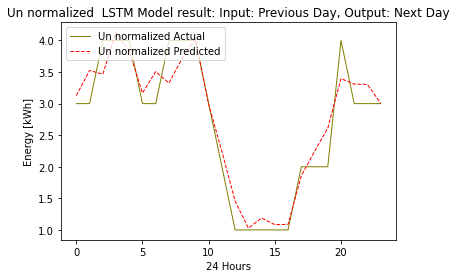

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2160, 6)
  
  
Previous Day : input 
[0.375 0.375 0.5   0.5   0.5   0.375 0.375 0.5   0.5   0.5   0.375 0.25
 0.125 0.125 0.125 0.125 0.125 0.25  0.25  0.25  0.5   0.375 0.375 0.375]
  
  
exact before put in the model 
[[[0.375]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.5  ]
  [0.375]
  [0.375]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.5   0.5   0.5   0.5   0.5   0.375 0.5   0.375 0.375 0.375 0.25
 0.25  0.125 0.25  0.    0.125 0.125 0.25  0.25  0.25  0.375 0.25  0.5  ]
  
test day i = 28
2020-02-23
 
 


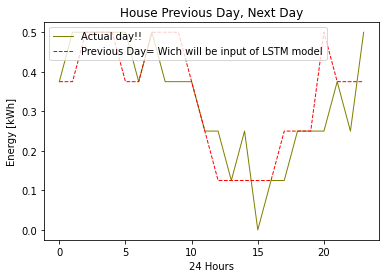

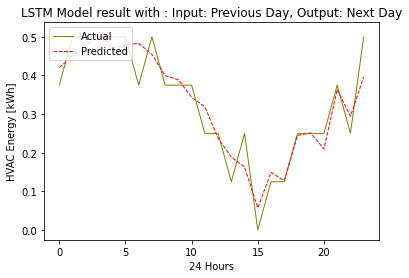

2020-02-23
 
 


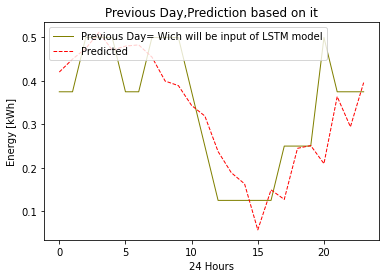

 
 
plot_act inversed:
[[3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [3.]
 [4.]
 [3.]
 [3.]
 [3.]
 [2.]
 [2.]
 [1.]
 [2.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [3.]
 [2.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2020-02-23 00:00:00    3.0
2020-02-23 01:00:00    4.0
2020-02-23 02:00:00    4.0
2020-02-23 03:00:00    4.0
2020-02-23 04:00:00    4.0
2020-02-23 05:00:00    4.0
2020-02-23 06:00:00    3.0
2020-02-23 07:00:00    4.0
2020-02-23 08:00:00    3.0
2020-02-23 09:00:00    3.0
2020-02-23 10:00:00    3.0
2020-02-23 11:00:00    2.0
2020-02-23 12:00:00    2.0
2020-02-23 13:00:00    1.0
2020-02-23 14:00:00    2.0
2020-02-23 15:00:00    0.0
2020-02-23 16:00:00    1.0
2020-02-23 17:00:00    1.0
2020-02-23 18:00:00    2.0
2020-02-23 19:00:00    2.0
2020-02-23 20:00:00    2.0
2020-02-23 21:00:00    3.0
2020-02-23 22:00:00    2.0
2020-02-23 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.42038894 0.45018852 0.4745646  0.5120414  0.4708621  0.4801348

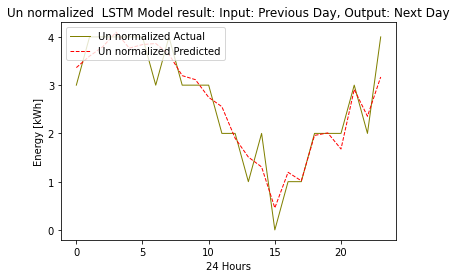

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2184, 6)
  
  
Previous Day : input 
[0.375 0.5   0.5   0.5   0.5   0.5   0.375 0.5   0.375 0.375 0.375 0.25
 0.25  0.125 0.25  0.    0.125 0.125 0.25  0.25  0.25  0.375 0.25  0.5  ]
  
  
exact before put in the model 
[[[0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.   ]
  [0.125]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.375 0.5   0.5   0.375 0.375 0.5   0.375 0.5   0.25  0.25  0.25
 0.25  0.125 0.125 0.125 0.25  0.125 0.25  0.25  0.5   0.75  0.75  0.625]
  
test day i = 29
2020-02-24
 
 


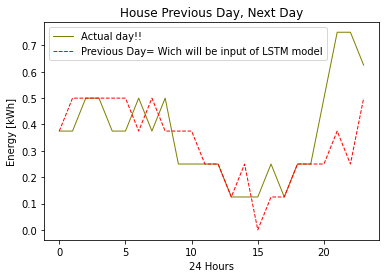

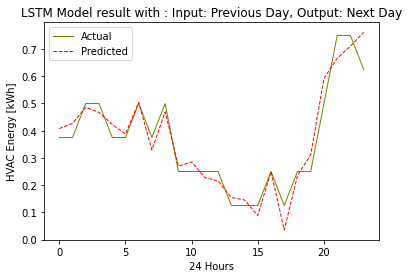

2020-02-24
 
 


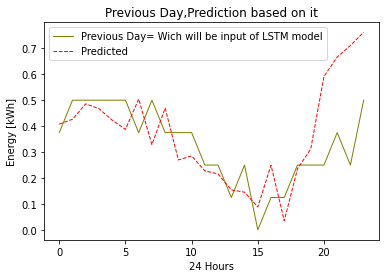

 
 
plot_act inversed:
[[3.]
 [3.]
 [4.]
 [4.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [4.]
 [6.]
 [6.]
 [5.]]
plot_act orginal (cheking inverse)
data_time
2020-02-24 00:00:00    3.0
2020-02-24 01:00:00    3.0
2020-02-24 02:00:00    4.0
2020-02-24 03:00:00    4.0
2020-02-24 04:00:00    3.0
2020-02-24 05:00:00    3.0
2020-02-24 06:00:00    4.0
2020-02-24 07:00:00    3.0
2020-02-24 08:00:00    4.0
2020-02-24 09:00:00    2.0
2020-02-24 10:00:00    2.0
2020-02-24 11:00:00    2.0
2020-02-24 12:00:00    2.0
2020-02-24 13:00:00    1.0
2020-02-24 14:00:00    1.0
2020-02-24 15:00:00    1.0
2020-02-24 16:00:00    2.0
2020-02-24 17:00:00    1.0
2020-02-24 18:00:00    2.0
2020-02-24 19:00:00    2.0
2020-02-24 20:00:00    4.0
2020-02-24 21:00:00    6.0
2020-02-24 22:00:00    6.0
2020-02-24 23:00:00    5.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.40783477 0.42664635 0.48581767 0.4673888  0.42288402 0.3875445

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2208, 6)
  
  
Previous Day : input 
[0.375 0.375 0.5   0.5   0.375 0.375 0.5   0.375 0.5   0.25  0.25  0.25
 0.25  0.125 0.125 0.125 0.25  0.125 0.25  0.25  0.5   0.75  0.75  0.625]
  
  
exact before put in the model 
[[[0.375]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.5  ]
  [0.75 ]
  [0.75 ]
  [0.625]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.875 0.75  0.875 0.75  0.625 0.625 1.    0.625 0.875 0.375 0.375 0.25
 0.25  0.125 0.25  0.125 0.25  0.125 0.25  0.5   0.5   0.75  0.625 1.   ]
  
test day i = 30
2020-02-25
 
 


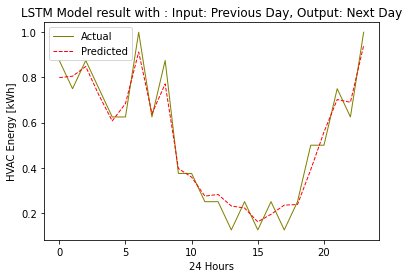

2020-02-25
 
 


 
 
plot_act inversed:
[[7.]
 [6.]
 [7.]
 [6.]
 [5.]
 [5.]
 [8.]
 [5.]
 [7.]
 [3.]
 [3.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [4.]
 [4.]
 [6.]
 [5.]
 [8.]]
plot_act orginal (cheking inverse)
data_time
2020-02-25 00:00:00    7.0
2020-02-25 01:00:00    6.0
2020-02-25 02:00:00    7.0
2020-02-25 03:00:00    6.0
2020-02-25 04:00:00    5.0
2020-02-25 05:00:00    5.0
2020-02-25 06:00:00    8.0
2020-02-25 07:00:00    5.0
2020-02-25 08:00:00    7.0
2020-02-25 09:00:00    3.0
2020-02-25 10:00:00    3.0
2020-02-25 11:00:00    2.0
2020-02-25 12:00:00    2.0
2020-02-25 13:00:00    1.0
2020-02-25 14:00:00    2.0
2020-02-25 15:00:00    1.0
2020-02-25 16:00:00    2.0
2020-02-25 17:00:00    1.0
2020-02-25 18:00:00    2.0
2020-02-25 19:00:00    4.0
2020-02-25 20:00:00    4.0
2020-02-25 21:00:00    6.0
2020-02-25 22:00:00    5.0
2020-02-25 23:00:00    8.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.7990544  0.80541795 0.8483323  0.72086847 0.6073917  0.6842218

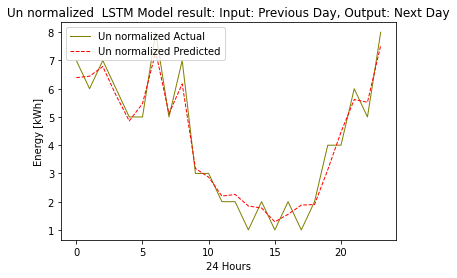

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2232, 6)
  
  
Previous Day : input 
[0.875 0.75  0.875 0.75  0.625 0.625 1.    0.625 0.875 0.375 0.375 0.25
 0.25  0.125 0.25  0.125 0.25  0.125 0.25  0.5   0.5   0.75  0.625 1.   ]
  
  
exact before put in the model 
[[[0.875]
  [0.75 ]
  [0.875]
  [0.75 ]
  [0.625]
  [0.625]
  [1.   ]
  [0.625]
  [0.875]
  [0.375]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.5  ]
  [0.5  ]
  [0.75 ]
  [0.625]
  [1.   ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.875 0.75  0.875 0.875 0.875 0.875 1.    0.875 0.625 0.75  0.5   0.375
 0.25  0.25  0.25  0.25  0.25  0.25  0.375 0.375 0.375 0.375 0.75  0.75 ]
  
test day i = 31
2020-02-26
 
 


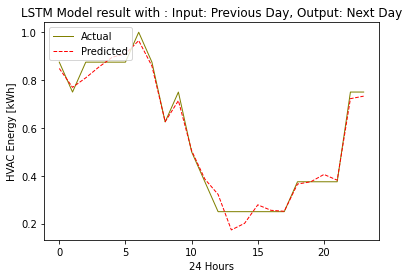

2020-02-26
 
 


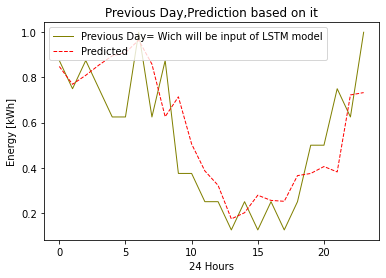

 
 
plot_act inversed:
[[7.]
 [6.]
 [7.]
 [7.]
 [7.]
 [7.]
 [8.]
 [7.]
 [5.]
 [6.]
 [4.]
 [3.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [6.]
 [6.]]
plot_act orginal (cheking inverse)
data_time
2020-02-26 00:00:00    7.0
2020-02-26 01:00:00    6.0
2020-02-26 02:00:00    7.0
2020-02-26 03:00:00    7.0
2020-02-26 04:00:00    7.0
2020-02-26 05:00:00    7.0
2020-02-26 06:00:00    8.0
2020-02-26 07:00:00    7.0
2020-02-26 08:00:00    5.0
2020-02-26 09:00:00    6.0
2020-02-26 10:00:00    4.0
2020-02-26 11:00:00    3.0
2020-02-26 12:00:00    2.0
2020-02-26 13:00:00    2.0
2020-02-26 14:00:00    2.0
2020-02-26 15:00:00    2.0
2020-02-26 16:00:00    2.0
2020-02-26 17:00:00    2.0
2020-02-26 18:00:00    3.0
2020-02-26 19:00:00    3.0
2020-02-26 20:00:00    3.0
2020-02-26 21:00:00    3.0
2020-02-26 22:00:00    6.0
2020-02-26 23:00:00    6.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.8485492  0.7696666  0.8094781  0.85500395 0.8954954  0.909628


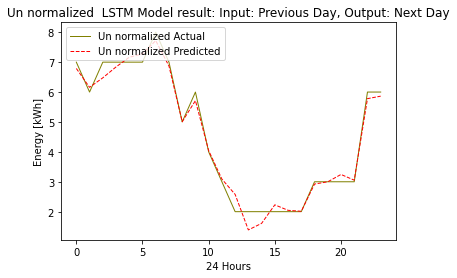

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2256, 6)
  
  
Previous Day : input 
[0.875 0.75  0.875 0.875 0.875 0.875 1.    0.875 0.625 0.75  0.5   0.375
 0.25  0.25  0.25  0.25  0.25  0.25  0.375 0.375 0.375 0.375 0.75  0.75 ]
  
  
exact before put in the model 
[[[0.875]
  [0.75 ]
  [0.875]
  [0.875]
  [0.875]
  [0.875]
  [1.   ]
  [0.875]
  [0.625]
  [0.75 ]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.375]
  [0.375]
  [0.75 ]
  [0.75 ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.625 0.875 0.75  0.75  0.875 1.    0.875 0.75  0.875 0.625 0.5   0.375
 0.25  0.125 0.125 0.    0.125 0.125 0.25  0.375 0.25  0.5   0.5   0.625]
  
test day i = 32
2020-02-27
 
 


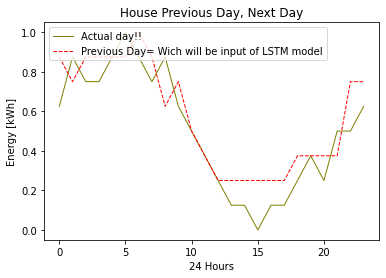

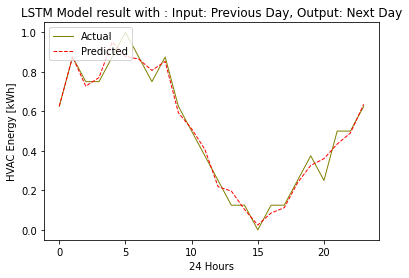

2020-02-27
 
 


 
 
plot_act inversed:
[[5.]
 [7.]
 [6.]
 [6.]
 [7.]
 [8.]
 [7.]
 [6.]
 [7.]
 [5.]
 [4.]
 [3.]
 [2.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [2.]
 [3.]
 [2.]
 [4.]
 [4.]
 [5.]]
plot_act orginal (cheking inverse)
data_time
2020-02-27 00:00:00    5.0
2020-02-27 01:00:00    7.0
2020-02-27 02:00:00    6.0
2020-02-27 03:00:00    6.0
2020-02-27 04:00:00    7.0
2020-02-27 05:00:00    8.0
2020-02-27 06:00:00    7.0
2020-02-27 07:00:00    6.0
2020-02-27 08:00:00    7.0
2020-02-27 09:00:00    5.0
2020-02-27 10:00:00    4.0
2020-02-27 11:00:00    3.0
2020-02-27 12:00:00    2.0
2020-02-27 13:00:00    1.0
2020-02-27 14:00:00    1.0
2020-02-27 15:00:00    0.0
2020-02-27 16:00:00    1.0
2020-02-27 17:00:00    1.0
2020-02-27 18:00:00    2.0
2020-02-27 19:00:00    3.0
2020-02-27 20:00:00    2.0
2020-02-27 21:00:00    4.0
2020-02-27 22:00:00    4.0
2020-02-27 23:00:00    5.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.6266527  0.8756573  0.7272157  0.770822   0.95072854 0.8775594

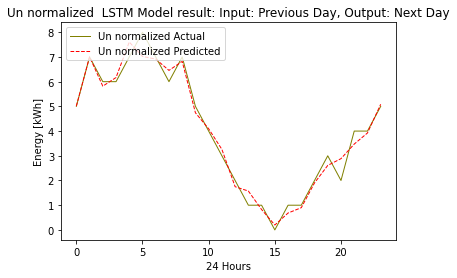

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2280, 6)
  
  
Previous Day : input 
[0.625 0.875 0.75  0.75  0.875 1.    0.875 0.75  0.875 0.625 0.5   0.375
 0.25  0.125 0.125 0.    0.125 0.125 0.25  0.375 0.25  0.5   0.5   0.625]
  
  
exact before put in the model 
[[[0.625]
  [0.875]
  [0.75 ]
  [0.75 ]
  [0.875]
  [1.   ]
  [0.875]
  [0.75 ]
  [0.875]
  [0.625]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.125]
  [0.125]
  [0.   ]
  [0.125]
  [0.125]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.5  ]
  [0.5  ]
  [0.625]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.625 0.625 0.625 0.5   0.875 0.75  0.75  0.625 1.    0.5   0.5   0.375
 0.375 0.25  0.125 0.25  0.125 0.25  0.25  0.375 0.25  0.375 0.625 0.625]
  
test day i = 33
2020-02-28
 
 


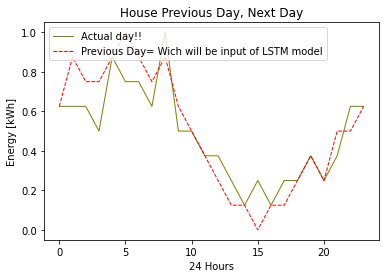

2020-02-28
 
 


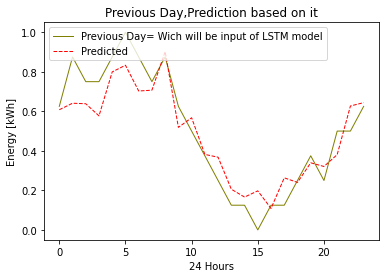

 
 
plot_act inversed:
[[5.]
 [5.]
 [5.]
 [4.]
 [7.]
 [6.]
 [6.]
 [5.]
 [8.]
 [4.]
 [4.]
 [3.]
 [3.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [3.]
 [2.]
 [3.]
 [5.]
 [5.]]
plot_act orginal (cheking inverse)
data_time
2020-02-28 00:00:00    5.0
2020-02-28 01:00:00    5.0
2020-02-28 02:00:00    5.0
2020-02-28 03:00:00    4.0
2020-02-28 04:00:00    7.0
2020-02-28 05:00:00    6.0
2020-02-28 06:00:00    6.0
2020-02-28 07:00:00    5.0
2020-02-28 08:00:00    8.0
2020-02-28 09:00:00    4.0
2020-02-28 10:00:00    4.0
2020-02-28 11:00:00    3.0
2020-02-28 12:00:00    3.0
2020-02-28 13:00:00    2.0
2020-02-28 14:00:00    1.0
2020-02-28 15:00:00    2.0
2020-02-28 16:00:00    1.0
2020-02-28 17:00:00    2.0
2020-02-28 18:00:00    2.0
2020-02-28 19:00:00    3.0
2020-02-28 20:00:00    2.0
2020-02-28 21:00:00    3.0
2020-02-28 22:00:00    5.0
2020-02-28 23:00:00    5.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.6080341  0.640874   0.63829833 0.5768137  0.7994101  0.8330968

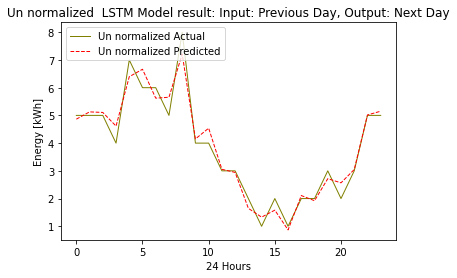

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2304, 6)
  
  
Previous Day : input 
[0.625 0.625 0.625 0.5   0.875 0.75  0.75  0.625 1.    0.5   0.5   0.375
 0.375 0.25  0.125 0.25  0.125 0.25  0.25  0.375 0.25  0.375 0.625 0.625]
  
  
exact before put in the model 
[[[0.625]
  [0.625]
  [0.625]
  [0.5  ]
  [0.875]
  [0.75 ]
  [0.75 ]
  [0.625]
  [1.   ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.375]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.375]
  [0.625]
  [0.625]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.625 0.625 0.75  0.625 0.75  0.75  0.75  0.75  0.5   0.375 0.25  0.375
 0.125 0.25  0.125 0.125 0.25  0.125 0.25  0.25  0.5   0.625 0.625 0.625]
  
test day i = 34
2020-02-29
 
 


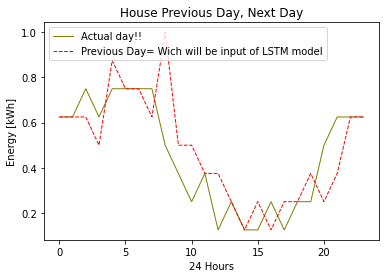

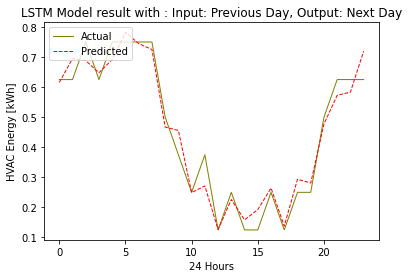

2020-02-29
 
 


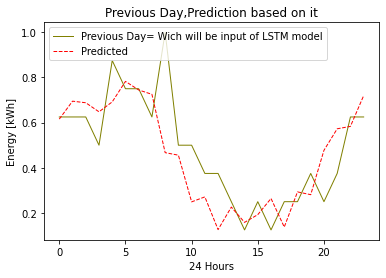

 
 
plot_act inversed:
[[5.]
 [5.]
 [6.]
 [5.]
 [6.]
 [6.]
 [6.]
 [6.]
 [4.]
 [3.]
 [2.]
 [3.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [4.]
 [5.]
 [5.]
 [5.]]
plot_act orginal (cheking inverse)
data_time
2020-02-29 00:00:00    5.0
2020-02-29 01:00:00    5.0
2020-02-29 02:00:00    6.0
2020-02-29 03:00:00    5.0
2020-02-29 04:00:00    6.0
2020-02-29 05:00:00    6.0
2020-02-29 06:00:00    6.0
2020-02-29 07:00:00    6.0
2020-02-29 08:00:00    4.0
2020-02-29 09:00:00    3.0
2020-02-29 10:00:00    2.0
2020-02-29 11:00:00    3.0
2020-02-29 12:00:00    1.0
2020-02-29 13:00:00    2.0
2020-02-29 14:00:00    1.0
2020-02-29 15:00:00    1.0
2020-02-29 16:00:00    2.0
2020-02-29 17:00:00    1.0
2020-02-29 18:00:00    2.0
2020-02-29 19:00:00    2.0
2020-02-29 20:00:00    4.0
2020-02-29 21:00:00    5.0
2020-02-29 22:00:00    5.0
2020-02-29 23:00:00    5.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.61559546 0.6949001  0.68791246 0.64777035 0.6917664  0.7823918

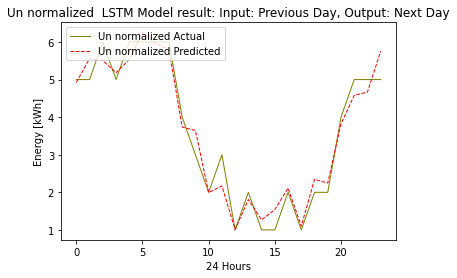

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2328, 6)
  
  
Previous Day : input 
[0.625 0.625 0.75  0.625 0.75  0.75  0.75  0.75  0.5   0.375 0.25  0.375
 0.125 0.25  0.125 0.125 0.25  0.125 0.25  0.25  0.5   0.625 0.625 0.625]
  
  
exact before put in the model 
[[[0.625]
  [0.625]
  [0.75 ]
  [0.625]
  [0.75 ]
  [0.75 ]
  [0.75 ]
  [0.75 ]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.375]
  [0.125]
  [0.25 ]
  [0.125]
  [0.125]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.5  ]
  [0.625]
  [0.625]
  [0.625]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.375 0.25  0.125
 0.125 0.125 0.25  0.125 0.25  0.25  0.375 0.375 0.5   0.375 0.5   0.5  ]
  
test day i = 35
2021-02-01
 
 


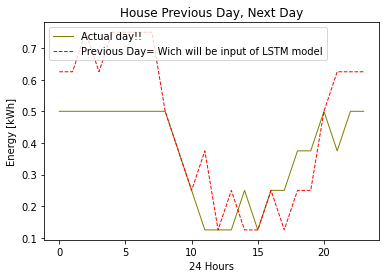

2021-02-01
 
 


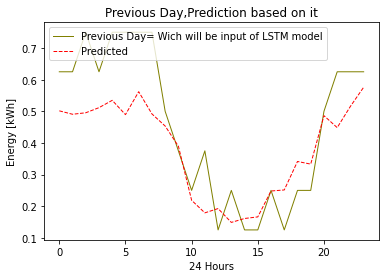

 
 
plot_act inversed:
[[4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [3.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2021-02-01 00:00:00    4.0
2021-02-01 01:00:00    4.0
2021-02-01 02:00:00    4.0
2021-02-01 03:00:00    4.0
2021-02-01 04:00:00    4.0
2021-02-01 05:00:00    4.0
2021-02-01 06:00:00    4.0
2021-02-01 07:00:00    4.0
2021-02-01 08:00:00    4.0
2021-02-01 09:00:00    3.0
2021-02-01 10:00:00    2.0
2021-02-01 11:00:00    1.0
2021-02-01 12:00:00    1.0
2021-02-01 13:00:00    1.0
2021-02-01 14:00:00    2.0
2021-02-01 15:00:00    1.0
2021-02-01 16:00:00    2.0
2021-02-01 17:00:00    2.0
2021-02-01 18:00:00    3.0
2021-02-01 19:00:00    3.0
2021-02-01 20:00:00    4.0
2021-02-01 21:00:00    3.0
2021-02-01 22:00:00    4.0
2021-02-01 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.5015074  0.49068916 0.49539632 0.51156676 0.5347079  0.4894923

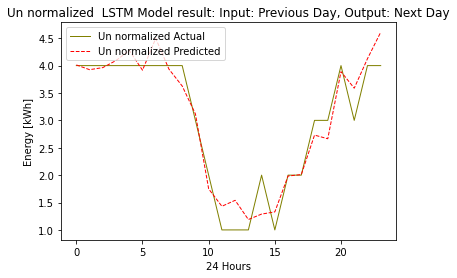

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2352, 6)
  
  
Previous Day : input 
[0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.375 0.25  0.125
 0.125 0.125 0.25  0.125 0.25  0.25  0.375 0.375 0.5   0.375 0.5   0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.625 0.5   0.5   0.5   0.5   0.5   0.375 0.375 0.375 0.375 0.375
 0.25  0.375 0.25  0.25  0.25  0.25  0.375 0.5   0.375 0.5   0.375 0.5  ]
  
test day i = 36
2021-02-02
 
 


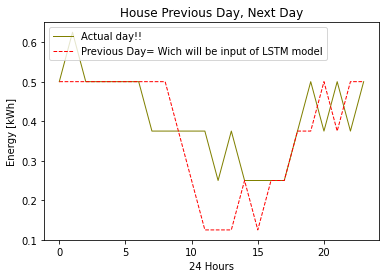

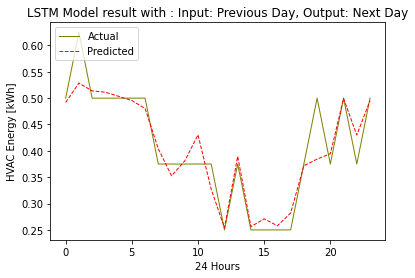

2021-02-02
 
 


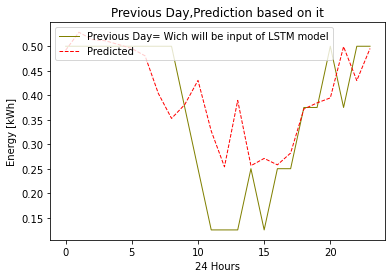

 
 
plot_act inversed:
[[4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [2.]
 [3.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [4.]
 [3.]
 [4.]
 [3.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2021-02-02 00:00:00    4.0
2021-02-02 01:00:00    5.0
2021-02-02 02:00:00    4.0
2021-02-02 03:00:00    4.0
2021-02-02 04:00:00    4.0
2021-02-02 05:00:00    4.0
2021-02-02 06:00:00    4.0
2021-02-02 07:00:00    3.0
2021-02-02 08:00:00    3.0
2021-02-02 09:00:00    3.0
2021-02-02 10:00:00    3.0
2021-02-02 11:00:00    3.0
2021-02-02 12:00:00    2.0
2021-02-02 13:00:00    3.0
2021-02-02 14:00:00    2.0
2021-02-02 15:00:00    2.0
2021-02-02 16:00:00    2.0
2021-02-02 17:00:00    2.0
2021-02-02 18:00:00    3.0
2021-02-02 19:00:00    4.0
2021-02-02 20:00:00    3.0
2021-02-02 21:00:00    4.0
2021-02-02 22:00:00    3.0
2021-02-02 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.49184167 0.52860916 0.513749   0.5112213  0.5034883  0.4954407

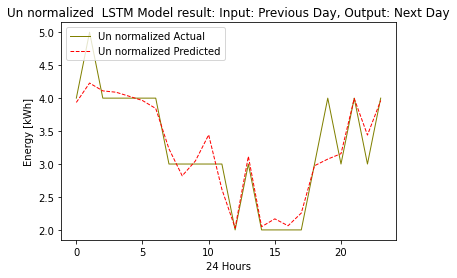

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2376, 6)
  
  
Previous Day : input 
[0.5   0.625 0.5   0.5   0.5   0.5   0.5   0.375 0.375 0.375 0.375 0.375
 0.25  0.375 0.25  0.25  0.25  0.25  0.375 0.5   0.375 0.5   0.375 0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.375]
  [0.375]
  [0.375]
  [0.375]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.625 0.75  0.625 0.625 0.625 0.625 0.625 0.75  0.5   0.375
 0.25  0.25  0.125 0.25  0.125 0.25  0.375 0.5   0.5   0.375 0.625 0.5  ]
  
test day i = 37
2021-02-03
 
 


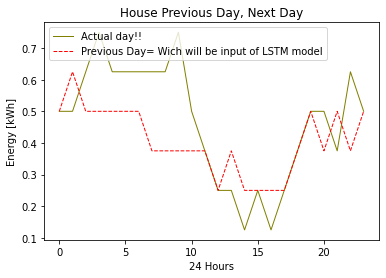

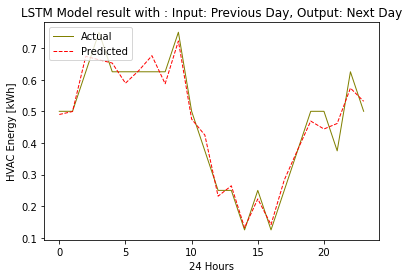

2021-02-03
 
 


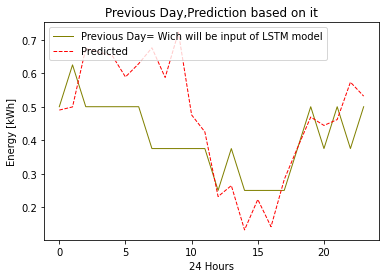

 
 
plot_act inversed:
[[4.]
 [4.]
 [5.]
 [6.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [4.]
 [3.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [3.]
 [4.]
 [4.]
 [3.]
 [5.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2021-02-03 00:00:00    4.0
2021-02-03 01:00:00    4.0
2021-02-03 02:00:00    5.0
2021-02-03 03:00:00    6.0
2021-02-03 04:00:00    5.0
2021-02-03 05:00:00    5.0
2021-02-03 06:00:00    5.0
2021-02-03 07:00:00    5.0
2021-02-03 08:00:00    5.0
2021-02-03 09:00:00    6.0
2021-02-03 10:00:00    4.0
2021-02-03 11:00:00    3.0
2021-02-03 12:00:00    2.0
2021-02-03 13:00:00    2.0
2021-02-03 14:00:00    1.0
2021-02-03 15:00:00    2.0
2021-02-03 16:00:00    1.0
2021-02-03 17:00:00    2.0
2021-02-03 18:00:00    3.0
2021-02-03 19:00:00    4.0
2021-02-03 20:00:00    4.0
2021-02-03 21:00:00    3.0
2021-02-03 22:00:00    5.0
2021-02-03 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.48997253 0.49934524 0.67384964 0.66294724 0.65254974 0.5888850

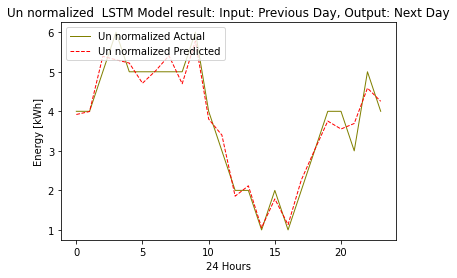

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2400, 6)
  
  
Previous Day : input 
[0.5   0.5   0.625 0.75  0.625 0.625 0.625 0.625 0.625 0.75  0.5   0.375
 0.25  0.25  0.125 0.25  0.125 0.25  0.375 0.5   0.5   0.375 0.625 0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.625]
  [0.75 ]
  [0.625]
  [0.625]
  [0.625]
  [0.625]
  [0.625]
  [0.75 ]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.625]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.625 0.625 0.625 0.625 0.625 0.5   0.625 0.5   0.625 0.5   0.5
 0.25  0.375 0.25  0.25  0.125 0.375 0.375 0.375 0.5   0.375 0.5   0.5  ]
  
test day i = 38
2021-02-04
 
 


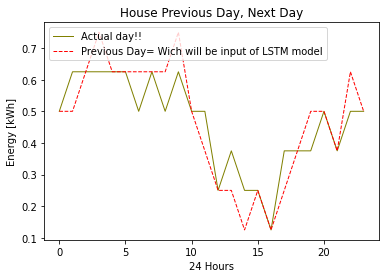

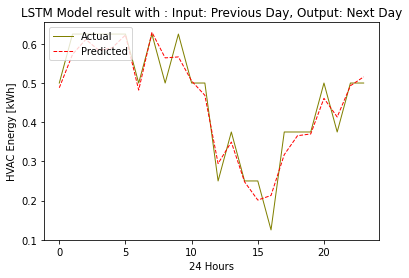

2021-02-04
 
 


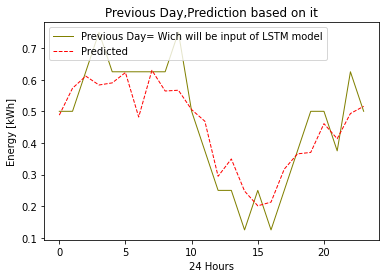

 
 
plot_act inversed:
[[4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [5.]
 [4.]
 [5.]
 [4.]
 [5.]
 [4.]
 [4.]
 [2.]
 [3.]
 [2.]
 [2.]
 [1.]
 [3.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2021-02-04 00:00:00    4.0
2021-02-04 01:00:00    5.0
2021-02-04 02:00:00    5.0
2021-02-04 03:00:00    5.0
2021-02-04 04:00:00    5.0
2021-02-04 05:00:00    5.0
2021-02-04 06:00:00    4.0
2021-02-04 07:00:00    5.0
2021-02-04 08:00:00    4.0
2021-02-04 09:00:00    5.0
2021-02-04 10:00:00    4.0
2021-02-04 11:00:00    4.0
2021-02-04 12:00:00    2.0
2021-02-04 13:00:00    3.0
2021-02-04 14:00:00    2.0
2021-02-04 15:00:00    2.0
2021-02-04 16:00:00    1.0
2021-02-04 17:00:00    3.0
2021-02-04 18:00:00    3.0
2021-02-04 19:00:00    3.0
2021-02-04 20:00:00    4.0
2021-02-04 21:00:00    3.0
2021-02-04 22:00:00    4.0
2021-02-04 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.48792714 0.5731095  0.6113085  0.58316994 0.589901   0.6226517

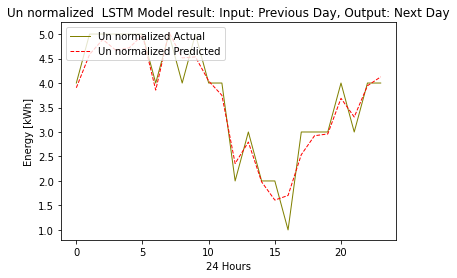

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2424, 6)
  
  
Previous Day : input 
[0.5   0.625 0.625 0.625 0.625 0.625 0.5   0.625 0.5   0.625 0.5   0.5
 0.25  0.375 0.25  0.25  0.125 0.375 0.375 0.375 0.5   0.375 0.5   0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.625]
  [0.625]
  [0.625]
  [0.625]
  [0.625]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.5   0.5   0.5   0.625 0.5   0.625 0.5   0.625 0.375 0.25
 0.25  0.125 0.125 0.125 0.125 0.125 0.375 0.375 0.5   0.625 0.5   0.625]
  
test day i = 39
2021-02-05
 
 


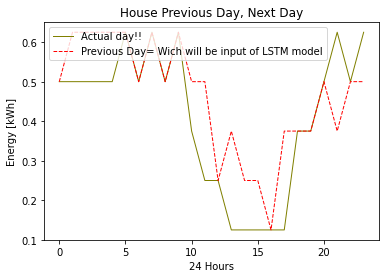

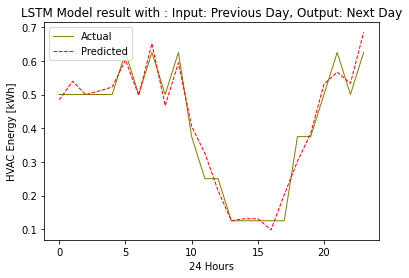

2021-02-05
 
 


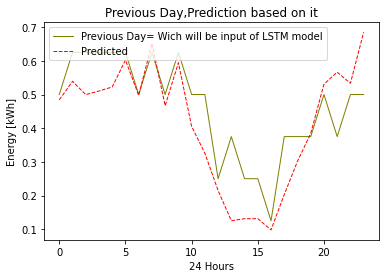

 
 
plot_act inversed:
[[4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [5.]
 [4.]
 [5.]
 [3.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [3.]
 [3.]
 [4.]
 [5.]
 [4.]
 [5.]]
plot_act orginal (cheking inverse)
data_time
2021-02-05 00:00:00    4.0
2021-02-05 01:00:00    4.0
2021-02-05 02:00:00    4.0
2021-02-05 03:00:00    4.0
2021-02-05 04:00:00    4.0
2021-02-05 05:00:00    5.0
2021-02-05 06:00:00    4.0
2021-02-05 07:00:00    5.0
2021-02-05 08:00:00    4.0
2021-02-05 09:00:00    5.0
2021-02-05 10:00:00    3.0
2021-02-05 11:00:00    2.0
2021-02-05 12:00:00    2.0
2021-02-05 13:00:00    1.0
2021-02-05 14:00:00    1.0
2021-02-05 15:00:00    1.0
2021-02-05 16:00:00    1.0
2021-02-05 17:00:00    1.0
2021-02-05 18:00:00    3.0
2021-02-05 19:00:00    3.0
2021-02-05 20:00:00    4.0
2021-02-05 21:00:00    5.0
2021-02-05 22:00:00    4.0
2021-02-05 23:00:00    5.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.48409778 0.53921866 0.49960375 0.510352   0.52234983 0.6023892

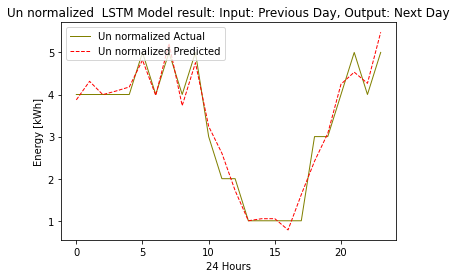

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2448, 6)
  
  
Previous Day : input 
[0.5   0.5   0.5   0.5   0.5   0.625 0.5   0.625 0.5   0.625 0.375 0.25
 0.25  0.125 0.125 0.125 0.125 0.125 0.375 0.375 0.5   0.625 0.5   0.625]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.625]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.125]
  [0.125]
  [0.375]
  [0.375]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.625]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.625 0.75  0.625 0.625 0.625 0.75  0.625 0.625 0.75  0.625 0.5   0.375
 0.125 0.25  0.125 0.125 0.25  0.125 0.375 0.375 0.5   0.5   0.625 0.625]
  
test day i = 40
2021-02-06
 
 


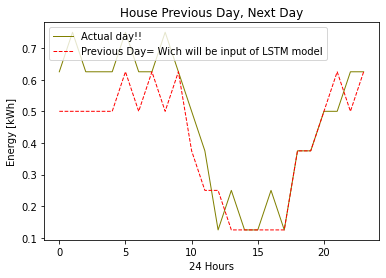

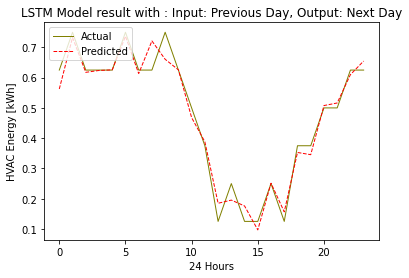

2021-02-06
 
 


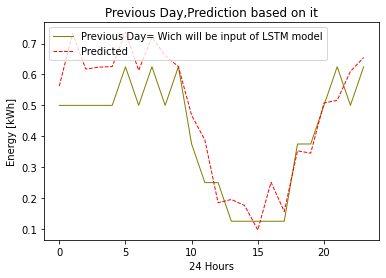

 
 
plot_act inversed:
[[5.]
 [6.]
 [5.]
 [5.]
 [5.]
 [6.]
 [5.]
 [5.]
 [6.]
 [5.]
 [4.]
 [3.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [3.]
 [3.]
 [4.]
 [4.]
 [5.]
 [5.]]
plot_act orginal (cheking inverse)
data_time
2021-02-06 00:00:00    5.0
2021-02-06 01:00:00    6.0
2021-02-06 02:00:00    5.0
2021-02-06 03:00:00    5.0
2021-02-06 04:00:00    5.0
2021-02-06 05:00:00    6.0
2021-02-06 06:00:00    5.0
2021-02-06 07:00:00    5.0
2021-02-06 08:00:00    6.0
2021-02-06 09:00:00    5.0
2021-02-06 10:00:00    4.0
2021-02-06 11:00:00    3.0
2021-02-06 12:00:00    1.0
2021-02-06 13:00:00    2.0
2021-02-06 14:00:00    1.0
2021-02-06 15:00:00    1.0
2021-02-06 16:00:00    2.0
2021-02-06 17:00:00    1.0
2021-02-06 18:00:00    3.0
2021-02-06 19:00:00    3.0
2021-02-06 20:00:00    4.0
2021-02-06 21:00:00    4.0
2021-02-06 22:00:00    5.0
2021-02-06 23:00:00    5.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.5625794  0.73262346 0.6175459  0.62371576 0.6256875  0.7367080

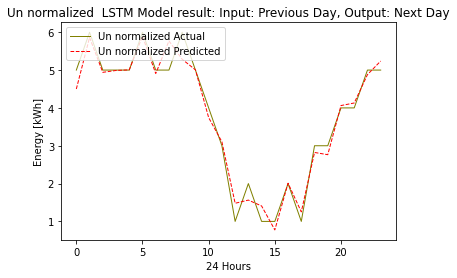

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2472, 6)
  
  
Previous Day : input 
[0.625 0.75  0.625 0.625 0.625 0.75  0.625 0.625 0.75  0.625 0.5   0.375
 0.125 0.25  0.125 0.125 0.25  0.125 0.375 0.375 0.5   0.5   0.625 0.625]
  
  
exact before put in the model 
[[[0.625]
  [0.75 ]
  [0.625]
  [0.625]
  [0.625]
  [0.75 ]
  [0.625]
  [0.625]
  [0.75 ]
  [0.625]
  [0.5  ]
  [0.375]
  [0.125]
  [0.25 ]
  [0.125]
  [0.125]
  [0.25 ]
  [0.125]
  [0.375]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.625]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.625 0.625 0.625 0.75  0.75  0.625 0.75  0.75  0.625 0.75  0.375 0.375
 0.25  0.25  0.125 0.125 0.25  0.25  0.25  0.375 0.5   0.5   0.625 0.625]
  
test day i = 41
2021-02-07
 
 


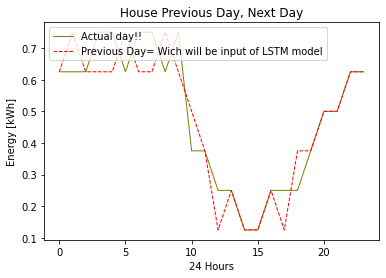

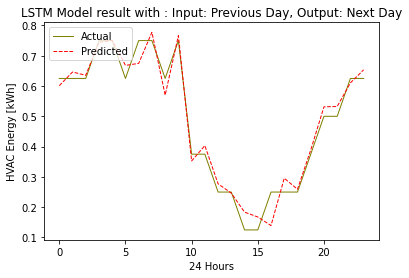

2021-02-07
 
 


 
 
plot_act inversed:
[[5.]
 [5.]
 [5.]
 [6.]
 [6.]
 [5.]
 [6.]
 [6.]
 [5.]
 [6.]
 [3.]
 [3.]
 [2.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [3.]
 [4.]
 [4.]
 [5.]
 [5.]]
plot_act orginal (cheking inverse)
data_time
2021-02-07 00:00:00    5.0
2021-02-07 01:00:00    5.0
2021-02-07 02:00:00    5.0
2021-02-07 03:00:00    6.0
2021-02-07 04:00:00    6.0
2021-02-07 05:00:00    5.0
2021-02-07 06:00:00    6.0
2021-02-07 07:00:00    6.0
2021-02-07 08:00:00    5.0
2021-02-07 09:00:00    6.0
2021-02-07 10:00:00    3.0
2021-02-07 11:00:00    3.0
2021-02-07 12:00:00    2.0
2021-02-07 13:00:00    2.0
2021-02-07 14:00:00    1.0
2021-02-07 15:00:00    1.0
2021-02-07 16:00:00    2.0
2021-02-07 17:00:00    2.0
2021-02-07 18:00:00    2.0
2021-02-07 19:00:00    3.0
2021-02-07 20:00:00    4.0
2021-02-07 21:00:00    4.0
2021-02-07 22:00:00    5.0
2021-02-07 23:00:00    5.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.6011252  0.64623684 0.63539577 0.7446236  0.7502457  0.6680655

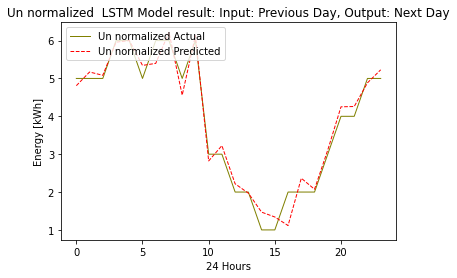

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2496, 6)
  
  
Previous Day : input 
[0.625 0.625 0.625 0.75  0.75  0.625 0.75  0.75  0.625 0.75  0.375 0.375
 0.25  0.25  0.125 0.125 0.25  0.25  0.25  0.375 0.5   0.5   0.625 0.625]
  
  
exact before put in the model 
[[[0.625]
  [0.625]
  [0.625]
  [0.75 ]
  [0.75 ]
  [0.625]
  [0.75 ]
  [0.75 ]
  [0.625]
  [0.75 ]
  [0.375]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.625]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.625 0.625 0.625 0.5   0.625 0.5   0.625 0.5   0.5   0.375 0.5
 0.25  0.125 0.125 0.125 0.25  0.25  0.375 0.375 0.5   0.375 0.5   0.5  ]
  
test day i = 42
2021-02-08
 
 


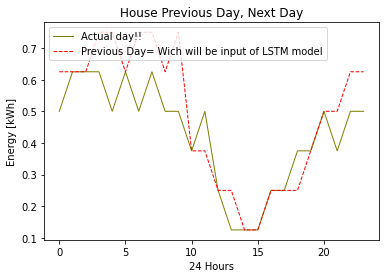

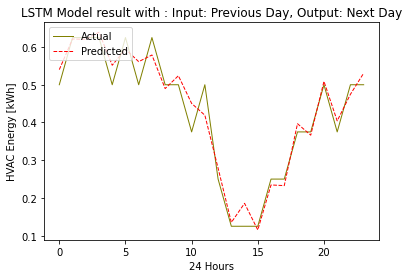

2021-02-08
 
 


 
 
plot_act inversed:
[[4.]
 [5.]
 [5.]
 [5.]
 [4.]
 [5.]
 [4.]
 [5.]
 [4.]
 [4.]
 [3.]
 [4.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2021-02-08 00:00:00    4.0
2021-02-08 01:00:00    5.0
2021-02-08 02:00:00    5.0
2021-02-08 03:00:00    5.0
2021-02-08 04:00:00    4.0
2021-02-08 05:00:00    5.0
2021-02-08 06:00:00    4.0
2021-02-08 07:00:00    5.0
2021-02-08 08:00:00    4.0
2021-02-08 09:00:00    4.0
2021-02-08 10:00:00    3.0
2021-02-08 11:00:00    4.0
2021-02-08 12:00:00    2.0
2021-02-08 13:00:00    1.0
2021-02-08 14:00:00    1.0
2021-02-08 15:00:00    1.0
2021-02-08 16:00:00    2.0
2021-02-08 17:00:00    2.0
2021-02-08 18:00:00    3.0
2021-02-08 19:00:00    3.0
2021-02-08 20:00:00    4.0
2021-02-08 21:00:00    3.0
2021-02-08 22:00:00    4.0
2021-02-08 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.5400613  0.6211806  0.62035114 0.6390872  0.5516557  0.5942291

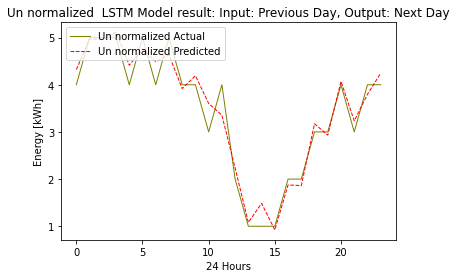

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2520, 6)
  
  
Previous Day : input 
[0.5   0.625 0.625 0.625 0.5   0.625 0.5   0.625 0.5   0.5   0.375 0.5
 0.25  0.125 0.125 0.125 0.25  0.25  0.375 0.375 0.5   0.375 0.5   0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.625]
  [0.625]
  [0.625]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.5   0.625 0.625 0.5   0.5   0.625 0.375 0.625 0.5   0.375
 0.5   0.375 0.375 0.375 0.375 0.25  0.5   0.375 0.5   0.375 0.5   0.5  ]
  
test day i = 43
2021-02-09
 
 


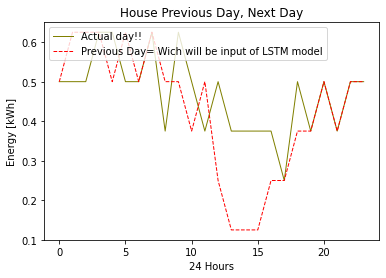

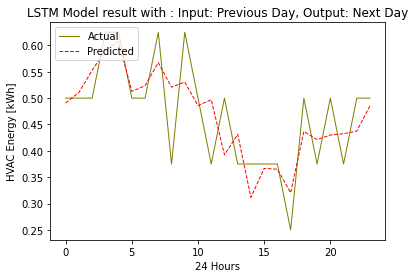

2021-02-09
 
 


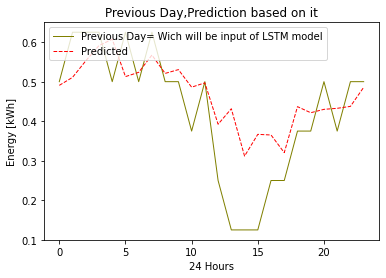

 
 
plot_act inversed:
[[4.]
 [4.]
 [4.]
 [5.]
 [5.]
 [4.]
 [4.]
 [5.]
 [3.]
 [5.]
 [4.]
 [3.]
 [4.]
 [3.]
 [3.]
 [3.]
 [3.]
 [2.]
 [4.]
 [3.]
 [4.]
 [3.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2021-02-09 00:00:00    4.0
2021-02-09 01:00:00    4.0
2021-02-09 02:00:00    4.0
2021-02-09 03:00:00    5.0
2021-02-09 04:00:00    5.0
2021-02-09 05:00:00    4.0
2021-02-09 06:00:00    4.0
2021-02-09 07:00:00    5.0
2021-02-09 08:00:00    3.0
2021-02-09 09:00:00    5.0
2021-02-09 10:00:00    4.0
2021-02-09 11:00:00    3.0
2021-02-09 12:00:00    4.0
2021-02-09 13:00:00    3.0
2021-02-09 14:00:00    3.0
2021-02-09 15:00:00    3.0
2021-02-09 16:00:00    3.0
2021-02-09 17:00:00    2.0
2021-02-09 18:00:00    4.0
2021-02-09 19:00:00    3.0
2021-02-09 20:00:00    4.0
2021-02-09 21:00:00    3.0
2021-02-09 22:00:00    4.0
2021-02-09 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.49065584 0.5108787  0.5526263  0.59120935 0.60730374 0.5127610

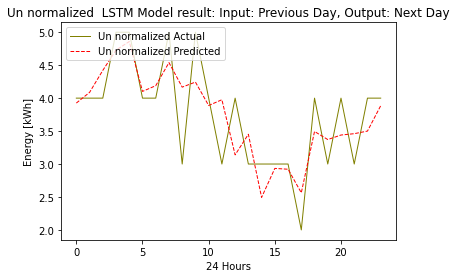

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2544, 6)
  
  
Previous Day : input 
[0.5   0.5   0.5   0.625 0.625 0.5   0.5   0.625 0.375 0.625 0.5   0.375
 0.5   0.375 0.375 0.375 0.375 0.25  0.5   0.375 0.5   0.375 0.5   0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.375]
  [0.625]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.375]
  [0.375]
  [0.25 ]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.625 0.5   0.5   0.5   0.375 0.5   0.5   0.375 0.5   0.375 0.375
 0.25  0.375 0.25  0.25  0.25  0.25  0.375 0.375 0.375 0.375 0.5   0.375]
  
test day i = 44
2021-02-10
 
 


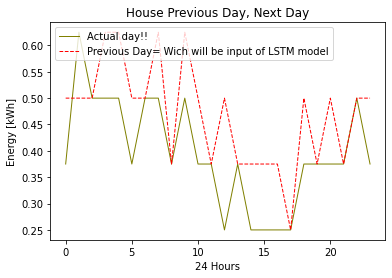

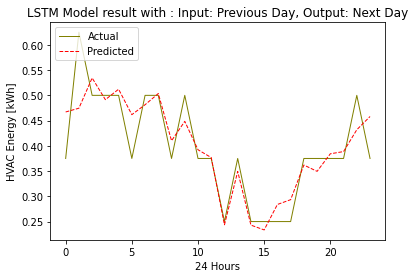

2021-02-10
 
 


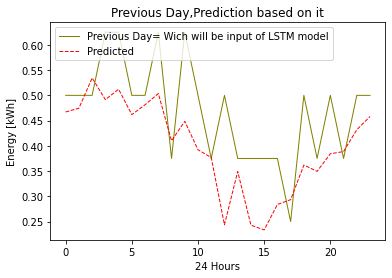

 
 
plot_act inversed:
[[3.]
 [5.]
 [4.]
 [4.]
 [4.]
 [3.]
 [4.]
 [4.]
 [3.]
 [4.]
 [3.]
 [3.]
 [2.]
 [3.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2021-02-10 00:00:00    3.0
2021-02-10 01:00:00    5.0
2021-02-10 02:00:00    4.0
2021-02-10 03:00:00    4.0
2021-02-10 04:00:00    4.0
2021-02-10 05:00:00    3.0
2021-02-10 06:00:00    4.0
2021-02-10 07:00:00    4.0
2021-02-10 08:00:00    3.0
2021-02-10 09:00:00    4.0
2021-02-10 10:00:00    3.0
2021-02-10 11:00:00    3.0
2021-02-10 12:00:00    2.0
2021-02-10 13:00:00    3.0
2021-02-10 14:00:00    2.0
2021-02-10 15:00:00    2.0
2021-02-10 16:00:00    2.0
2021-02-10 17:00:00    2.0
2021-02-10 18:00:00    3.0
2021-02-10 19:00:00    3.0
2021-02-10 20:00:00    3.0
2021-02-10 21:00:00    3.0
2021-02-10 22:00:00    4.0
2021-02-10 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.46708876 0.47452933 0.53448004 0.49147713 0.51213646 0.4617369

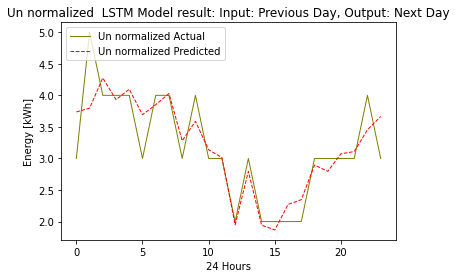

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2568, 6)
  
  
Previous Day : input 
[0.375 0.625 0.5   0.5   0.5   0.375 0.5   0.5   0.375 0.5   0.375 0.375
 0.25  0.375 0.25  0.25  0.25  0.25  0.375 0.375 0.375 0.375 0.5   0.375]
  
  
exact before put in the model 
[[[0.375]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.5   0.5   0.5   0.5   0.625 0.5   0.375 0.5   0.375 0.375
 0.125 0.125 0.125 0.    0.    0.125 0.25  0.25  0.5   0.5   0.5   0.5  ]
  
test day i = 45
2021-02-11
 
 


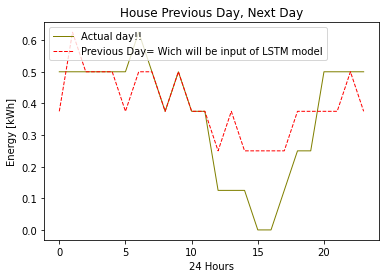

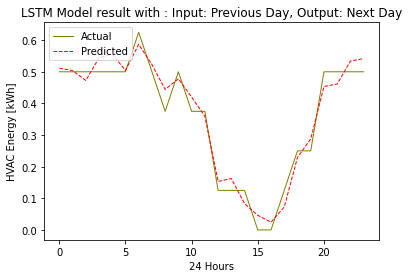

2021-02-11
 
 


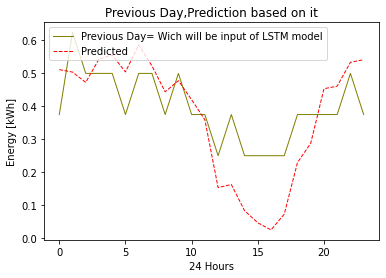

 
 
plot_act inversed:
[[4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [3.]
 [4.]
 [3.]
 [3.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [2.]
 [2.]
 [4.]
 [4.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2021-02-11 00:00:00    4.0
2021-02-11 01:00:00    4.0
2021-02-11 02:00:00    4.0
2021-02-11 03:00:00    4.0
2021-02-11 04:00:00    4.0
2021-02-11 05:00:00    4.0
2021-02-11 06:00:00    5.0
2021-02-11 07:00:00    4.0
2021-02-11 08:00:00    3.0
2021-02-11 09:00:00    4.0
2021-02-11 10:00:00    3.0
2021-02-11 11:00:00    3.0
2021-02-11 12:00:00    1.0
2021-02-11 13:00:00    1.0
2021-02-11 14:00:00    1.0
2021-02-11 15:00:00    0.0
2021-02-11 16:00:00    0.0
2021-02-11 17:00:00    1.0
2021-02-11 18:00:00    2.0
2021-02-11 19:00:00    2.0
2021-02-11 20:00:00    4.0
2021-02-11 21:00:00    4.0
2021-02-11 22:00:00    4.0
2021-02-11 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.5113602  0.5039904  0.47261578 0.54373837 0.55571353 0.5044521

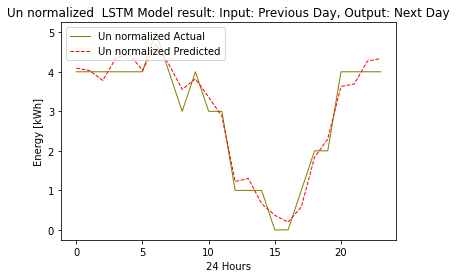

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2592, 6)
  
  
Previous Day : input 
[0.5   0.5   0.5   0.5   0.5   0.5   0.625 0.5   0.375 0.5   0.375 0.375
 0.125 0.125 0.125 0.    0.    0.125 0.25  0.25  0.5   0.5   0.5   0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.125]
  [0.125]
  [0.125]
  [0.   ]
  [0.   ]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.625 0.625 0.625 0.5   0.5   0.5   0.5   0.5   0.5   0.25  0.25
 0.25  0.    0.125 0.125 0.    0.125 0.25  0.375 0.25  0.375 0.25  0.375]
  
test day i = 46
2021-02-12
 
 


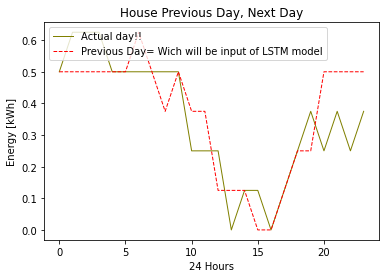

2021-02-12
 
 


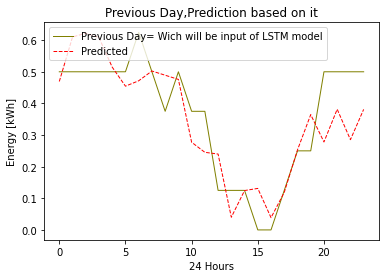

 
 
plot_act inversed:
[[4.]
 [5.]
 [5.]
 [5.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [2.]
 [2.]
 [2.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [2.]
 [3.]
 [2.]
 [3.]
 [2.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2021-02-12 00:00:00    4.0
2021-02-12 01:00:00    5.0
2021-02-12 02:00:00    5.0
2021-02-12 03:00:00    5.0
2021-02-12 04:00:00    4.0
2021-02-12 05:00:00    4.0
2021-02-12 06:00:00    4.0
2021-02-12 07:00:00    4.0
2021-02-12 08:00:00    4.0
2021-02-12 09:00:00    4.0
2021-02-12 10:00:00    2.0
2021-02-12 11:00:00    2.0
2021-02-12 12:00:00    2.0
2021-02-12 13:00:00    0.0
2021-02-12 14:00:00    1.0
2021-02-12 15:00:00    1.0
2021-02-12 16:00:00    0.0
2021-02-12 17:00:00    1.0
2021-02-12 18:00:00    2.0
2021-02-12 19:00:00    3.0
2021-02-12 20:00:00    2.0
2021-02-12 21:00:00    3.0
2021-02-12 22:00:00    2.0
2021-02-12 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.46931928 0.6099336  0.6220968  0.6080535  0.51454294 0.4544832

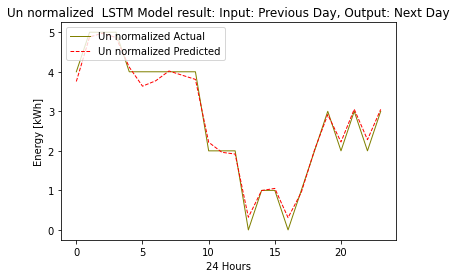

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2616, 6)
  
  
Previous Day : input 
[0.5   0.625 0.625 0.625 0.5   0.5   0.5   0.5   0.5   0.5   0.25  0.25
 0.25  0.    0.125 0.125 0.    0.125 0.25  0.375 0.25  0.375 0.25  0.375]
  
  
exact before put in the model 
[[[0.5  ]
  [0.625]
  [0.625]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.   ]
  [0.125]
  [0.125]
  [0.   ]
  [0.125]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.5   0.375 0.5   0.375 0.375 0.375 0.375 0.5   0.375 0.375 0.25
 0.25  0.125 0.125 0.125 0.25  0.125 0.25  0.25  0.375 0.25  0.375 0.375]
  
test day i = 47
2021-02-13
 
 


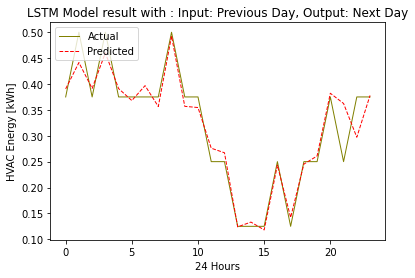

2021-02-13
 
 


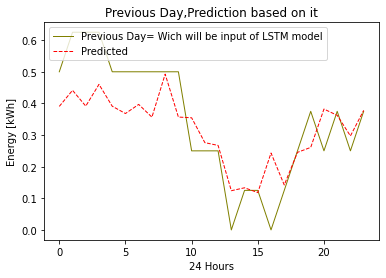

 
 
plot_act inversed:
[[3.]
 [4.]
 [3.]
 [4.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [3.]
 [3.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [3.]
 [2.]
 [3.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2021-02-13 00:00:00    3.0
2021-02-13 01:00:00    4.0
2021-02-13 02:00:00    3.0
2021-02-13 03:00:00    4.0
2021-02-13 04:00:00    3.0
2021-02-13 05:00:00    3.0
2021-02-13 06:00:00    3.0
2021-02-13 07:00:00    3.0
2021-02-13 08:00:00    4.0
2021-02-13 09:00:00    3.0
2021-02-13 10:00:00    3.0
2021-02-13 11:00:00    2.0
2021-02-13 12:00:00    2.0
2021-02-13 13:00:00    1.0
2021-02-13 14:00:00    1.0
2021-02-13 15:00:00    1.0
2021-02-13 16:00:00    2.0
2021-02-13 17:00:00    1.0
2021-02-13 18:00:00    2.0
2021-02-13 19:00:00    2.0
2021-02-13 20:00:00    3.0
2021-02-13 21:00:00    2.0
2021-02-13 22:00:00    3.0
2021-02-13 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.3905465  0.4413819  0.39147466 0.46018195 0.39111426 0.3680238

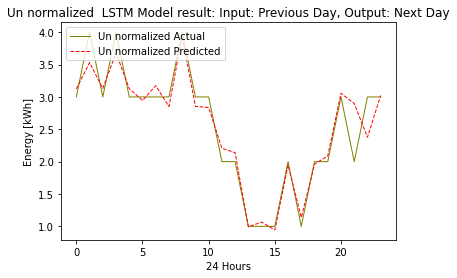

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2640, 6)
  
  
Previous Day : input 
[0.375 0.5   0.375 0.5   0.375 0.375 0.375 0.375 0.5   0.375 0.375 0.25
 0.25  0.125 0.125 0.125 0.25  0.125 0.25  0.25  0.375 0.25  0.375 0.375]
  
  
exact before put in the model 
[[[0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.375]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.375 0.375 0.5   0.375 0.5   0.5   0.5   0.5   0.375 0.375 0.125
 0.125 0.125 0.    0.    0.125 0.25  0.25  0.25  0.375 0.375 0.5   0.375]
  
test day i = 48
2021-02-14
 
 


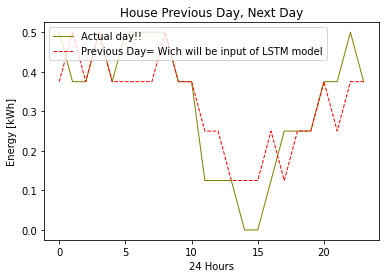

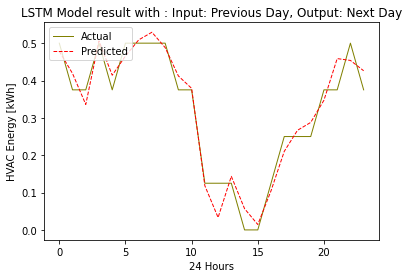

2021-02-14
 
 


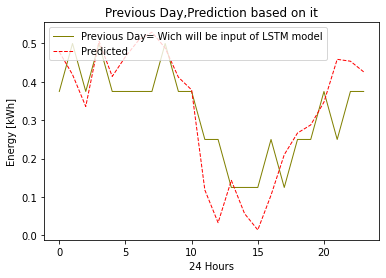

 
 
plot_act inversed:
[[4.]
 [3.]
 [3.]
 [4.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [3.]
 [3.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [4.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2021-02-14 00:00:00    4.0
2021-02-14 01:00:00    3.0
2021-02-14 02:00:00    3.0
2021-02-14 03:00:00    4.0
2021-02-14 04:00:00    3.0
2021-02-14 05:00:00    4.0
2021-02-14 06:00:00    4.0
2021-02-14 07:00:00    4.0
2021-02-14 08:00:00    4.0
2021-02-14 09:00:00    3.0
2021-02-14 10:00:00    3.0
2021-02-14 11:00:00    1.0
2021-02-14 12:00:00    1.0
2021-02-14 13:00:00    1.0
2021-02-14 14:00:00    0.0
2021-02-14 15:00:00    0.0
2021-02-14 16:00:00    1.0
2021-02-14 17:00:00    2.0
2021-02-14 18:00:00    2.0
2021-02-14 19:00:00    2.0
2021-02-14 20:00:00    3.0
2021-02-14 21:00:00    3.0
2021-02-14 22:00:00    4.0
2021-02-14 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.4781509  0.41885868 0.33584127 0.5060707  0.41414303 0.4655789

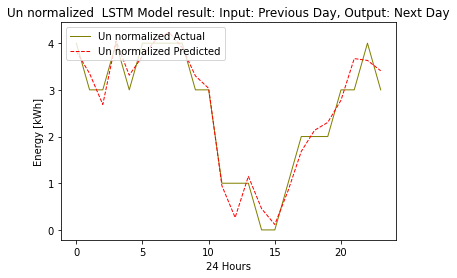

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2664, 6)
  
  
Previous Day : input 
[0.5   0.375 0.375 0.5   0.375 0.5   0.5   0.5   0.5   0.375 0.375 0.125
 0.125 0.125 0.    0.    0.125 0.25  0.25  0.25  0.375 0.375 0.5   0.375]
  
  
exact before put in the model 
[[[0.5  ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.375]
  [0.125]
  [0.125]
  [0.125]
  [0.   ]
  [0.   ]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.5   0.375 0.5   0.375 0.375 0.375 0.375 0.5   0.375 0.375 0.375
 0.25  0.375 0.25  0.25  0.25  0.25  0.25  0.375 0.375 0.375 0.5   0.375]
  
test day i = 49
2021-02-15
 
 


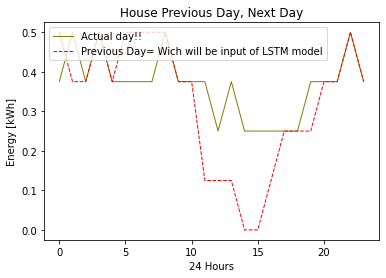

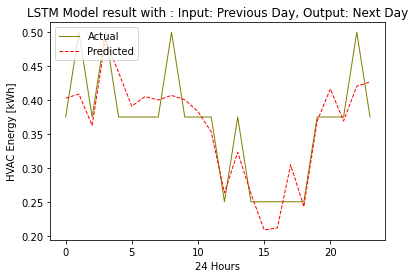

2021-02-15
 
 


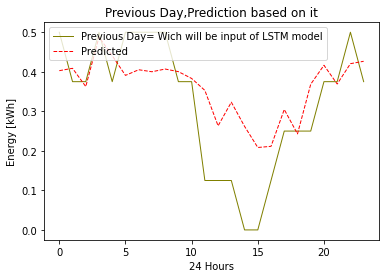

 
 
plot_act inversed:
[[3.]
 [4.]
 [3.]
 [4.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [3.]
 [3.]
 [3.]
 [2.]
 [3.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [4.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2021-02-15 00:00:00    3.0
2021-02-15 01:00:00    4.0
2021-02-15 02:00:00    3.0
2021-02-15 03:00:00    4.0
2021-02-15 04:00:00    3.0
2021-02-15 05:00:00    3.0
2021-02-15 06:00:00    3.0
2021-02-15 07:00:00    3.0
2021-02-15 08:00:00    4.0
2021-02-15 09:00:00    3.0
2021-02-15 10:00:00    3.0
2021-02-15 11:00:00    3.0
2021-02-15 12:00:00    2.0
2021-02-15 13:00:00    3.0
2021-02-15 14:00:00    2.0
2021-02-15 15:00:00    2.0
2021-02-15 16:00:00    2.0
2021-02-15 17:00:00    2.0
2021-02-15 18:00:00    2.0
2021-02-15 19:00:00    3.0
2021-02-15 20:00:00    3.0
2021-02-15 21:00:00    3.0
2021-02-15 22:00:00    4.0
2021-02-15 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.40280545 0.40878248 0.36262432 0.4879685  0.44070256 0.3908794

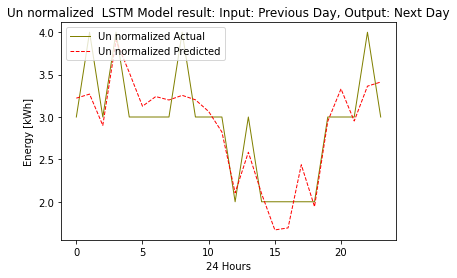

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2688, 6)
  
  
Previous Day : input 
[0.375 0.5   0.375 0.5   0.375 0.375 0.375 0.375 0.5   0.375 0.375 0.375
 0.25  0.375 0.25  0.25  0.25  0.25  0.25  0.375 0.375 0.375 0.5   0.375]
  
  
exact before put in the model 
[[[0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.375]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.5   0.625 0.5   0.625 0.5   0.5   0.5   0.5   0.625 0.375 0.375
 0.25  0.25  0.25  0.125 0.25  0.125 0.375 0.25  0.25  0.375 0.5   0.5  ]
  
test day i = 50
2021-02-16
 
 


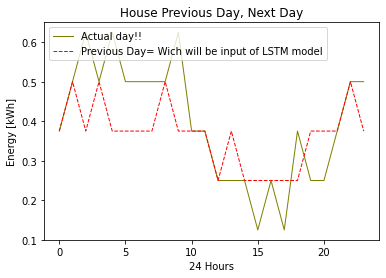

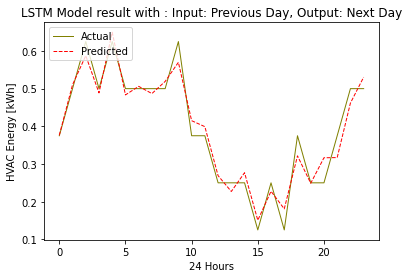

2021-02-16
 
 


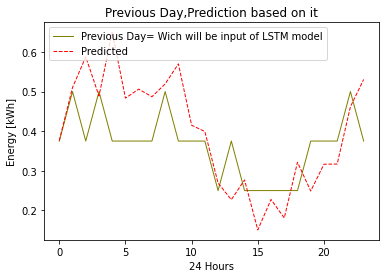

 
 
plot_act inversed:
[[3.]
 [4.]
 [5.]
 [4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [3.]
 [3.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [3.]
 [2.]
 [2.]
 [3.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2021-02-16 00:00:00    3.0
2021-02-16 01:00:00    4.0
2021-02-16 02:00:00    5.0
2021-02-16 03:00:00    4.0
2021-02-16 04:00:00    5.0
2021-02-16 05:00:00    4.0
2021-02-16 06:00:00    4.0
2021-02-16 07:00:00    4.0
2021-02-16 08:00:00    4.0
2021-02-16 09:00:00    5.0
2021-02-16 10:00:00    3.0
2021-02-16 11:00:00    3.0
2021-02-16 12:00:00    2.0
2021-02-16 13:00:00    2.0
2021-02-16 14:00:00    2.0
2021-02-16 15:00:00    1.0
2021-02-16 16:00:00    2.0
2021-02-16 17:00:00    1.0
2021-02-16 18:00:00    3.0
2021-02-16 19:00:00    2.0
2021-02-16 20:00:00    2.0
2021-02-16 21:00:00    3.0
2021-02-16 22:00:00    4.0
2021-02-16 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.37643638 0.5103026  0.5875315  0.48874623 0.6497084  0.4833772

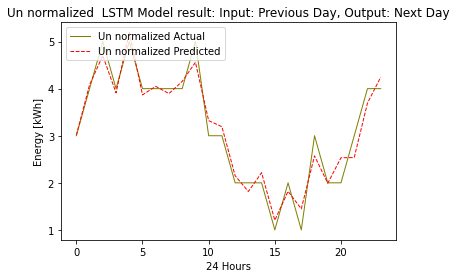

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2712, 6)
  
  
Previous Day : input 
[0.375 0.5   0.625 0.5   0.625 0.5   0.5   0.5   0.5   0.625 0.375 0.375
 0.25  0.25  0.25  0.125 0.25  0.125 0.375 0.25  0.25  0.375 0.5   0.5  ]
  
  
exact before put in the model 
[[[0.375]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.375]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.125]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.625 0.5   0.75  0.625 0.625 0.625 0.5   0.625 0.5   0.5   0.375
 0.25  0.25  0.125 0.125 0.125 0.25  0.25  0.25  0.375 0.5   0.5   0.5  ]
  
test day i = 51
2021-02-17
 
 


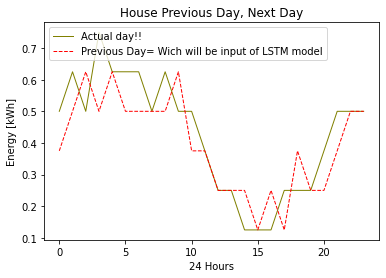

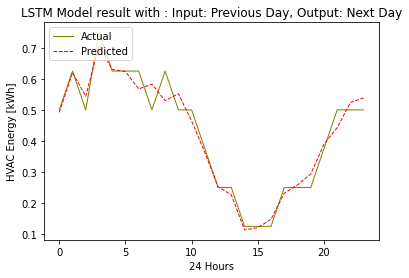

2021-02-17
 
 


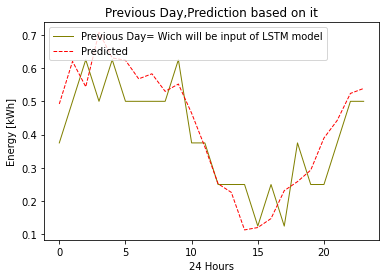

 
 
plot_act inversed:
[[4.]
 [5.]
 [4.]
 [6.]
 [5.]
 [5.]
 [5.]
 [4.]
 [5.]
 [4.]
 [4.]
 [3.]
 [2.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [3.]
 [4.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2021-02-17 00:00:00    4.0
2021-02-17 01:00:00    5.0
2021-02-17 02:00:00    4.0
2021-02-17 03:00:00    6.0
2021-02-17 04:00:00    5.0
2021-02-17 05:00:00    5.0
2021-02-17 06:00:00    5.0
2021-02-17 07:00:00    4.0
2021-02-17 08:00:00    5.0
2021-02-17 09:00:00    4.0
2021-02-17 10:00:00    4.0
2021-02-17 11:00:00    3.0
2021-02-17 12:00:00    2.0
2021-02-17 13:00:00    2.0
2021-02-17 14:00:00    1.0
2021-02-17 15:00:00    1.0
2021-02-17 16:00:00    1.0
2021-02-17 17:00:00    2.0
2021-02-17 18:00:00    2.0
2021-02-17 19:00:00    2.0
2021-02-17 20:00:00    3.0
2021-02-17 21:00:00    4.0
2021-02-17 22:00:00    4.0
2021-02-17 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.49215102 0.62010235 0.5437042  0.7076048  0.63045704 0.6233933

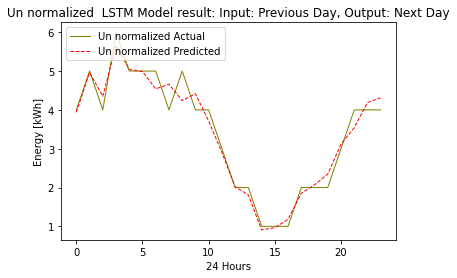

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2736, 6)
  
  
Previous Day : input 
[0.5   0.625 0.5   0.75  0.625 0.625 0.625 0.5   0.625 0.5   0.5   0.375
 0.25  0.25  0.125 0.125 0.125 0.25  0.25  0.25  0.375 0.5   0.5   0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.625]
  [0.5  ]
  [0.75 ]
  [0.625]
  [0.625]
  [0.625]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.625 0.625 0.75  0.625 0.875 0.75  0.625 0.875 0.625 0.625 0.375 0.375
 0.25  0.125 0.125 0.125 0.125 0.25  0.25  0.25  0.375 0.375 0.5   0.5  ]
  
test day i = 52
2021-02-18
 
 


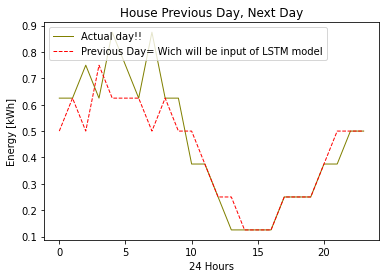

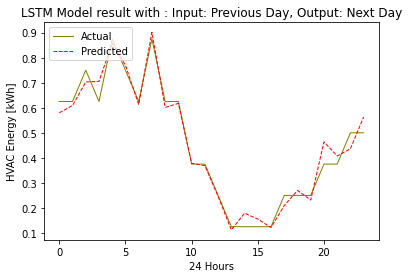

2021-02-18
 
 


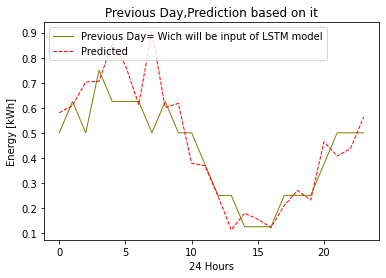

 
 
plot_act inversed:
[[5.]
 [5.]
 [6.]
 [5.]
 [7.]
 [6.]
 [5.]
 [7.]
 [5.]
 [5.]
 [3.]
 [3.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2021-02-18 00:00:00    5.0
2021-02-18 01:00:00    5.0
2021-02-18 02:00:00    6.0
2021-02-18 03:00:00    5.0
2021-02-18 04:00:00    7.0
2021-02-18 05:00:00    6.0
2021-02-18 06:00:00    5.0
2021-02-18 07:00:00    7.0
2021-02-18 08:00:00    5.0
2021-02-18 09:00:00    5.0
2021-02-18 10:00:00    3.0
2021-02-18 11:00:00    3.0
2021-02-18 12:00:00    2.0
2021-02-18 13:00:00    1.0
2021-02-18 14:00:00    1.0
2021-02-18 15:00:00    1.0
2021-02-18 16:00:00    1.0
2021-02-18 17:00:00    2.0
2021-02-18 18:00:00    2.0
2021-02-18 19:00:00    2.0
2021-02-18 20:00:00    3.0
2021-02-18 21:00:00    3.0
2021-02-18 22:00:00    4.0
2021-02-18 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.5798895  0.6091975  0.7027705  0.7057421  0.857826   0.7696067

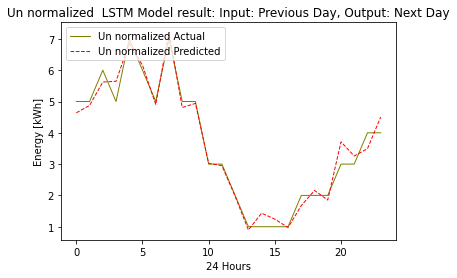

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2760, 6)
  
  
Previous Day : input 
[0.625 0.625 0.75  0.625 0.875 0.75  0.625 0.875 0.625 0.625 0.375 0.375
 0.25  0.125 0.125 0.125 0.125 0.25  0.25  0.25  0.375 0.375 0.5   0.5  ]
  
  
exact before put in the model 
[[[0.625]
  [0.625]
  [0.75 ]
  [0.625]
  [0.875]
  [0.75 ]
  [0.625]
  [0.875]
  [0.625]
  [0.625]
  [0.375]
  [0.375]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.5   0.5   0.625 0.5   0.5   0.5   0.625 0.5   0.25  0.25
 0.125 0.    0.    0.    0.    0.125 0.125 0.25  0.375 0.375 0.375 0.375]
  
test day i = 53
2021-02-19
 
 


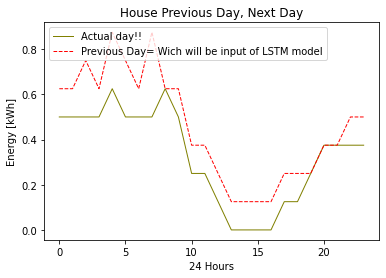

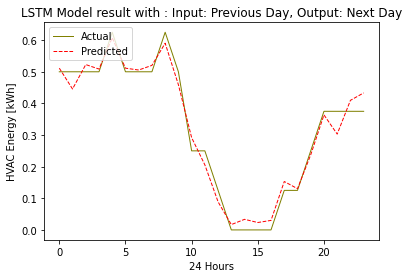

2021-02-19
 
 


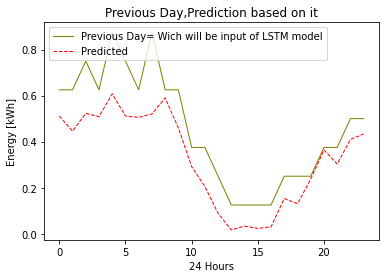

 
 
plot_act inversed:
[[4.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [4.]
 [4.]
 [5.]
 [4.]
 [2.]
 [2.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2021-02-19 00:00:00    4.0
2021-02-19 01:00:00    4.0
2021-02-19 02:00:00    4.0
2021-02-19 03:00:00    4.0
2021-02-19 04:00:00    5.0
2021-02-19 05:00:00    4.0
2021-02-19 06:00:00    4.0
2021-02-19 07:00:00    4.0
2021-02-19 08:00:00    5.0
2021-02-19 09:00:00    4.0
2021-02-19 10:00:00    2.0
2021-02-19 11:00:00    2.0
2021-02-19 12:00:00    1.0
2021-02-19 13:00:00    0.0
2021-02-19 14:00:00    0.0
2021-02-19 15:00:00    0.0
2021-02-19 16:00:00    0.0
2021-02-19 17:00:00    1.0
2021-02-19 18:00:00    1.0
2021-02-19 19:00:00    2.0
2021-02-19 20:00:00    3.0
2021-02-19 21:00:00    3.0
2021-02-19 22:00:00    3.0
2021-02-19 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.5114189  0.4455971  0.52275807 0.5086013  0.60742974 0.5113959

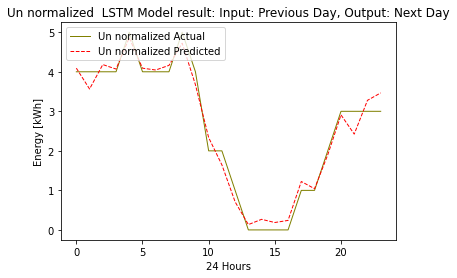

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2784, 6)
  
  
Previous Day : input 
[0.5   0.5   0.5   0.5   0.625 0.5   0.5   0.5   0.625 0.5   0.25  0.25
 0.125 0.    0.    0.    0.    0.125 0.125 0.25  0.375 0.375 0.375 0.375]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.625]
  [0.5  ]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.   ]
  [0.   ]
  [0.   ]
  [0.   ]
  [0.125]
  [0.125]
  [0.25 ]
  [0.375]
  [0.375]
  [0.375]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.625 0.625 0.625 0.625 0.75  0.625 0.625 0.625 0.625 0.375 0.25
 0.25  0.125 0.    0.125 0.    0.125 0.125 0.375 0.375 0.375 0.5   0.5  ]
  
test day i = 54
2021-02-20
 
 


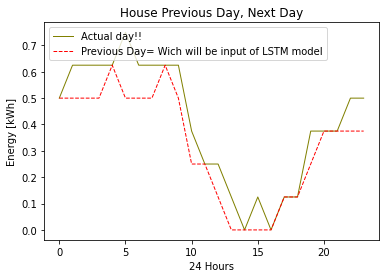

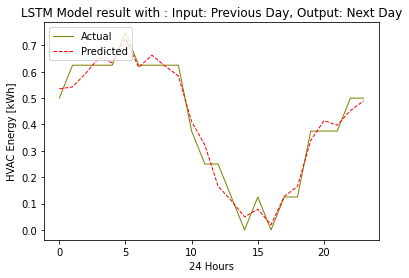

2021-02-20
 
 


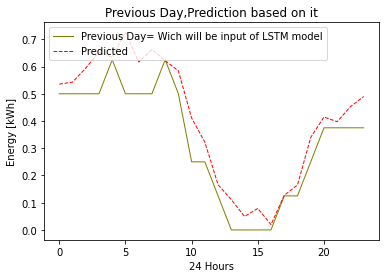

 
 
plot_act inversed:
[[4.]
 [5.]
 [5.]
 [5.]
 [5.]
 [6.]
 [5.]
 [5.]
 [5.]
 [5.]
 [3.]
 [2.]
 [2.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2021-02-20 00:00:00    4.0
2021-02-20 01:00:00    5.0
2021-02-20 02:00:00    5.0
2021-02-20 03:00:00    5.0
2021-02-20 04:00:00    5.0
2021-02-20 05:00:00    6.0
2021-02-20 06:00:00    5.0
2021-02-20 07:00:00    5.0
2021-02-20 08:00:00    5.0
2021-02-20 09:00:00    5.0
2021-02-20 10:00:00    3.0
2021-02-20 11:00:00    2.0
2021-02-20 12:00:00    2.0
2021-02-20 13:00:00    1.0
2021-02-20 14:00:00    0.0
2021-02-20 15:00:00    1.0
2021-02-20 16:00:00    0.0
2021-02-20 17:00:00    1.0
2021-02-20 18:00:00    1.0
2021-02-20 19:00:00    3.0
2021-02-20 20:00:00    3.0
2021-02-20 21:00:00    3.0
2021-02-20 22:00:00    4.0
2021-02-20 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.53532124 0.54252815 0.5943317  0.6533293  0.6342244  0.7259235

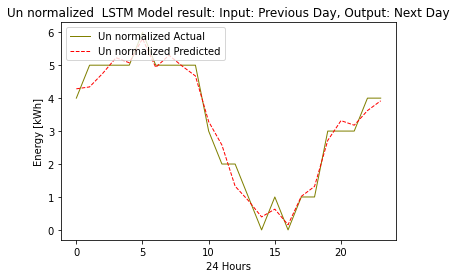

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2808, 6)
  
  
Previous Day : input 
[0.5   0.625 0.625 0.625 0.625 0.75  0.625 0.625 0.625 0.625 0.375 0.25
 0.25  0.125 0.    0.125 0.    0.125 0.125 0.375 0.375 0.375 0.5   0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.625]
  [0.625]
  [0.625]
  [0.625]
  [0.75 ]
  [0.625]
  [0.625]
  [0.625]
  [0.625]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.   ]
  [0.125]
  [0.   ]
  [0.125]
  [0.125]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.5   0.5   0.5   0.375 0.5   0.375 0.375 0.375 0.5   0.5   0.125 0.375
 0.125 0.    0.125 0.    0.125 0.125 0.125 0.25  0.375 0.375 0.375 0.5  ]
  
test day i = 55
2021-02-21
 
 


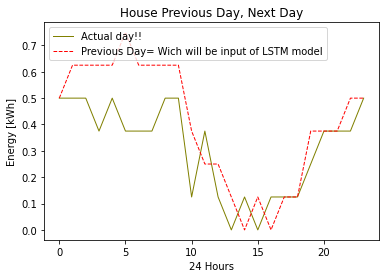

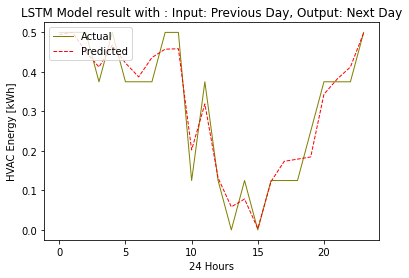

2021-02-21
 
 


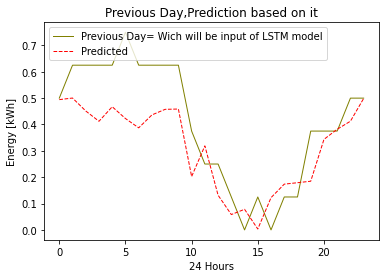

 
 
plot_act inversed:
[[4.]
 [4.]
 [4.]
 [3.]
 [4.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [1.]
 [3.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [3.]
 [3.]
 [3.]
 [4.]]
plot_act orginal (cheking inverse)
data_time
2021-02-21 00:00:00    4.0
2021-02-21 01:00:00    4.0
2021-02-21 02:00:00    4.0
2021-02-21 03:00:00    3.0
2021-02-21 04:00:00    4.0
2021-02-21 05:00:00    3.0
2021-02-21 06:00:00    3.0
2021-02-21 07:00:00    3.0
2021-02-21 08:00:00    4.0
2021-02-21 09:00:00    4.0
2021-02-21 10:00:00    1.0
2021-02-21 11:00:00    3.0
2021-02-21 12:00:00    1.0
2021-02-21 13:00:00    0.0
2021-02-21 14:00:00    1.0
2021-02-21 15:00:00    0.0
2021-02-21 16:00:00    1.0
2021-02-21 17:00:00    1.0
2021-02-21 18:00:00    1.0
2021-02-21 19:00:00    2.0
2021-02-21 20:00:00    3.0
2021-02-21 21:00:00    3.0
2021-02-21 22:00:00    3.0
2021-02-21 23:00:00    4.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.49432546 0.5004     0.45122063 0.41225204 0.4673295  0.4226060

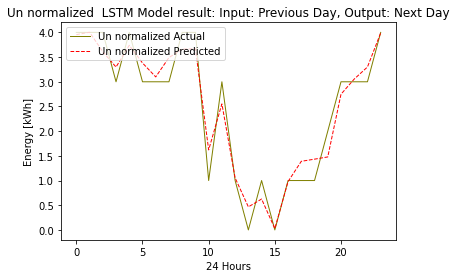

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2832, 6)
  
  
Previous Day : input 
[0.5   0.5   0.5   0.375 0.5   0.375 0.375 0.375 0.5   0.5   0.125 0.375
 0.125 0.    0.125 0.    0.125 0.125 0.125 0.25  0.375 0.375 0.375 0.5  ]
  
  
exact before put in the model 
[[[0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.125]
  [0.375]
  [0.125]
  [0.   ]
  [0.125]
  [0.   ]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.375 0.5   0.5   0.375 0.5   0.375 0.375 0.5   0.5   0.375 0.25
 0.25  0.    0.125 0.125 0.125 0.25  0.25  0.375 0.375 0.375 0.5   0.375]
  
test day i = 56
2021-02-22
 
 


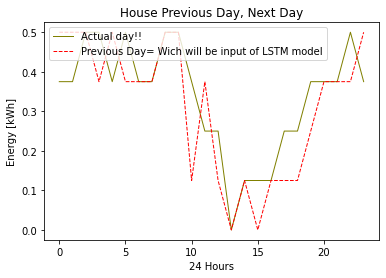

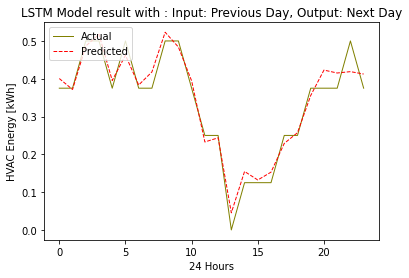

2021-02-22
 
 


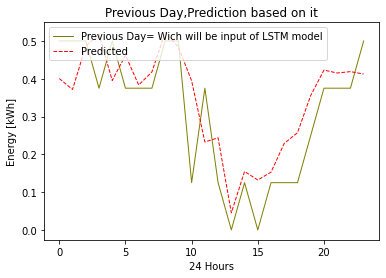

 
 
plot_act inversed:
[[3.]
 [3.]
 [4.]
 [4.]
 [3.]
 [4.]
 [3.]
 [3.]
 [4.]
 [4.]
 [3.]
 [2.]
 [2.]
 [0.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [4.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2021-02-22 00:00:00    3.0
2021-02-22 01:00:00    3.0
2021-02-22 02:00:00    4.0
2021-02-22 03:00:00    4.0
2021-02-22 04:00:00    3.0
2021-02-22 05:00:00    4.0
2021-02-22 06:00:00    3.0
2021-02-22 07:00:00    3.0
2021-02-22 08:00:00    4.0
2021-02-22 09:00:00    4.0
2021-02-22 10:00:00    3.0
2021-02-22 11:00:00    2.0
2021-02-22 12:00:00    2.0
2021-02-22 13:00:00    0.0
2021-02-22 14:00:00    1.0
2021-02-22 15:00:00    1.0
2021-02-22 16:00:00    1.0
2021-02-22 17:00:00    2.0
2021-02-22 18:00:00    2.0
2021-02-22 19:00:00    3.0
2021-02-22 20:00:00    3.0
2021-02-22 21:00:00    3.0
2021-02-22 22:00:00    4.0
2021-02-22 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.40052336 0.37156492 0.48640496 0.51761186 0.3953855  0.4621849

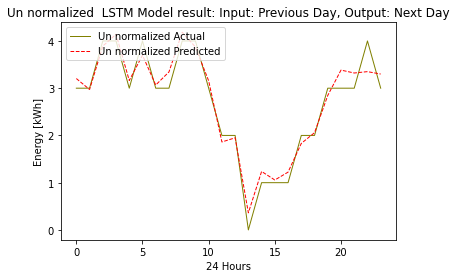

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2856, 6)
  
  
Previous Day : input 
[0.375 0.375 0.5   0.5   0.375 0.5   0.375 0.375 0.5   0.5   0.375 0.25
 0.25  0.    0.125 0.125 0.125 0.25  0.25  0.375 0.375 0.375 0.5   0.375]
  
  
exact before put in the model 
[[[0.375]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.   ]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.5   0.5   0.5   0.5   0.375 0.5   0.375 0.5   0.375 0.25  0.375
 0.25  0.125 0.125 0.125 0.125 0.125 0.25  0.25  0.25  0.25  0.375 0.375]
  
test day i = 57
2021-02-23
 
 


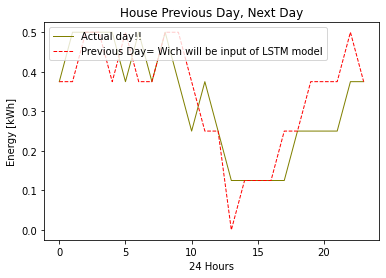

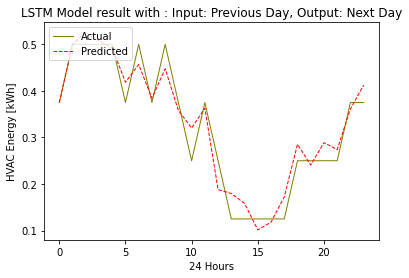

2021-02-23
 
 


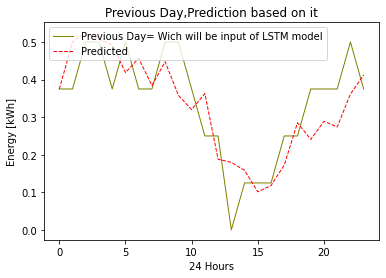

 
 
plot_act inversed:
[[3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [3.]
 [4.]
 [3.]
 [4.]
 [3.]
 [2.]
 [3.]
 [2.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]]
plot_act orginal (cheking inverse)
data_time
2021-02-23 00:00:00    3.0
2021-02-23 01:00:00    4.0
2021-02-23 02:00:00    4.0
2021-02-23 03:00:00    4.0
2021-02-23 04:00:00    4.0
2021-02-23 05:00:00    3.0
2021-02-23 06:00:00    4.0
2021-02-23 07:00:00    3.0
2021-02-23 08:00:00    4.0
2021-02-23 09:00:00    3.0
2021-02-23 10:00:00    2.0
2021-02-23 11:00:00    3.0
2021-02-23 12:00:00    2.0
2021-02-23 13:00:00    1.0
2021-02-23 14:00:00    1.0
2021-02-23 15:00:00    1.0
2021-02-23 16:00:00    1.0
2021-02-23 17:00:00    1.0
2021-02-23 18:00:00    2.0
2021-02-23 19:00:00    2.0
2021-02-23 20:00:00    2.0
2021-02-23 21:00:00    2.0
2021-02-23 22:00:00    3.0
2021-02-23 23:00:00    3.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.3748294  0.49984908 0.52595764 0.5073881  0.49224782 0.4185533

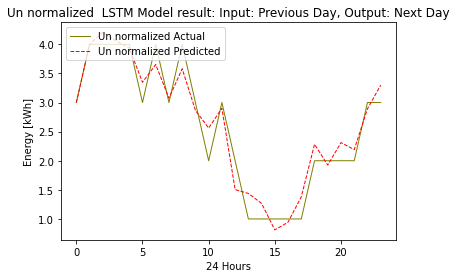

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2880, 6)
  
  
Previous Day : input 
[0.375 0.5   0.5   0.5   0.5   0.375 0.5   0.375 0.5   0.375 0.25  0.375
 0.25  0.125 0.125 0.125 0.125 0.125 0.25  0.25  0.25  0.25  0.375 0.375]
  
  
exact before put in the model 
[[[0.375]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.375]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.375]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.375 0.5   0.375 0.5   0.5   0.375 0.375 0.5   0.375 0.375 0.25  0.25
 0.125 0.25  0.125 0.125 0.125 0.25  0.125 0.375 0.5   0.625 0.75  0.75 ]
  
test day i = 58
2021-02-24
 
 


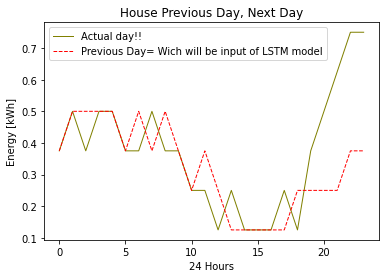

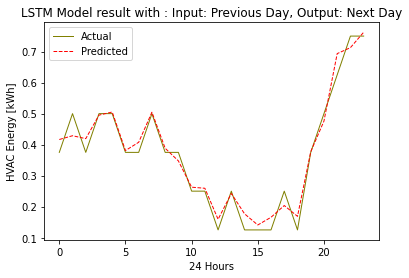

2021-02-24
 
 


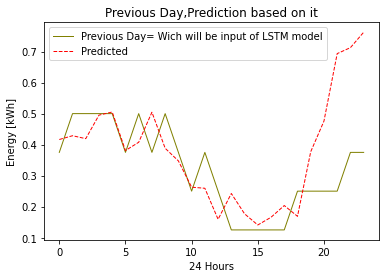

 
 
plot_act inversed:
[[3.]
 [4.]
 [3.]
 [4.]
 [4.]
 [3.]
 [3.]
 [4.]
 [3.]
 [3.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [1.]
 [1.]
 [2.]
 [1.]
 [3.]
 [4.]
 [5.]
 [6.]
 [6.]]
plot_act orginal (cheking inverse)
data_time
2021-02-24 00:00:00    3.0
2021-02-24 01:00:00    4.0
2021-02-24 02:00:00    3.0
2021-02-24 03:00:00    4.0
2021-02-24 04:00:00    4.0
2021-02-24 05:00:00    3.0
2021-02-24 06:00:00    3.0
2021-02-24 07:00:00    4.0
2021-02-24 08:00:00    3.0
2021-02-24 09:00:00    3.0
2021-02-24 10:00:00    2.0
2021-02-24 11:00:00    2.0
2021-02-24 12:00:00    1.0
2021-02-24 13:00:00    2.0
2021-02-24 14:00:00    1.0
2021-02-24 15:00:00    1.0
2021-02-24 16:00:00    1.0
2021-02-24 17:00:00    2.0
2021-02-24 18:00:00    1.0
2021-02-24 19:00:00    3.0
2021-02-24 20:00:00    4.0
2021-02-24 21:00:00    5.0
2021-02-24 22:00:00    6.0
2021-02-24 23:00:00    6.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.4165357  0.42869914 0.41930795 0.49515742 0.505177   0.3809190

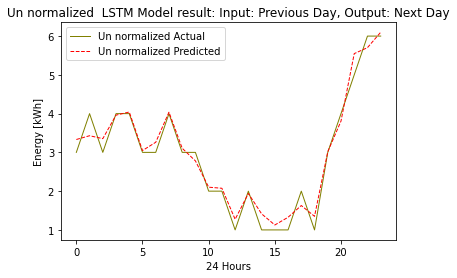

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2904, 6)
  
  
Previous Day : input 
[0.375 0.5   0.375 0.5   0.5   0.375 0.375 0.5   0.375 0.375 0.25  0.25
 0.125 0.25  0.125 0.125 0.125 0.25  0.125 0.375 0.5   0.625 0.75  0.75 ]
  
  
exact before put in the model 
[[[0.375]
  [0.5  ]
  [0.375]
  [0.5  ]
  [0.5  ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.375]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.125]
  [0.125]
  [0.125]
  [0.25 ]
  [0.125]
  [0.375]
  [0.5  ]
  [0.625]
  [0.75 ]
  [0.75 ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.875 0.75  0.875 0.625 0.625 0.75  0.875 0.75  0.75  0.375 0.375 0.25
 0.25  0.25  0.125 0.25  0.125 0.25  0.25  0.375 0.625 0.625 0.75  0.875]
  
test day i = 59
2021-02-25
 
 


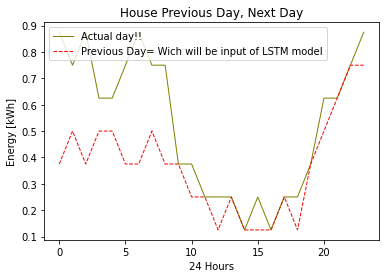

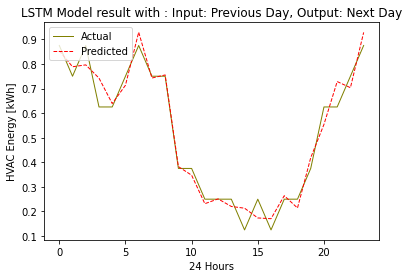

2021-02-25
 
 


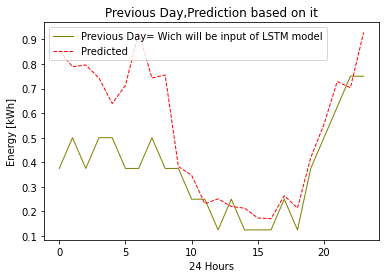

 
 
plot_act inversed:
[[7.]
 [6.]
 [7.]
 [5.]
 [5.]
 [6.]
 [7.]
 [6.]
 [6.]
 [3.]
 [3.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [1.]
 [2.]
 [2.]
 [3.]
 [5.]
 [5.]
 [6.]
 [7.]]
plot_act orginal (cheking inverse)
data_time
2021-02-25 00:00:00    7.0
2021-02-25 01:00:00    6.0
2021-02-25 02:00:00    7.0
2021-02-25 03:00:00    5.0
2021-02-25 04:00:00    5.0
2021-02-25 05:00:00    6.0
2021-02-25 06:00:00    7.0
2021-02-25 07:00:00    6.0
2021-02-25 08:00:00    6.0
2021-02-25 09:00:00    3.0
2021-02-25 10:00:00    3.0
2021-02-25 11:00:00    2.0
2021-02-25 12:00:00    2.0
2021-02-25 13:00:00    2.0
2021-02-25 14:00:00    1.0
2021-02-25 15:00:00    2.0
2021-02-25 16:00:00    1.0
2021-02-25 17:00:00    2.0
2021-02-25 18:00:00    2.0
2021-02-25 19:00:00    3.0
2021-02-25 20:00:00    5.0
2021-02-25 21:00:00    5.0
2021-02-25 22:00:00    6.0
2021-02-25 23:00:00    7.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.85398716 0.7884609  0.79610455 0.7423589  0.6388721  0.7133142

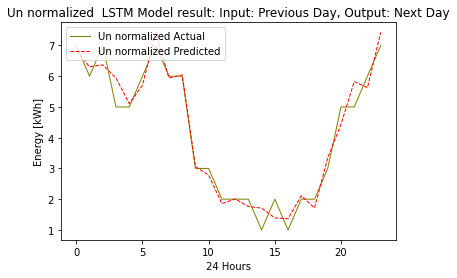

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2928, 6)
  
  
Previous Day : input 
[0.875 0.75  0.875 0.625 0.625 0.75  0.875 0.75  0.75  0.375 0.375 0.25
 0.25  0.25  0.125 0.25  0.125 0.25  0.25  0.375 0.625 0.625 0.75  0.875]
  
  
exact before put in the model 
[[[0.875]
  [0.75 ]
  [0.875]
  [0.625]
  [0.625]
  [0.75 ]
  [0.875]
  [0.75 ]
  [0.75 ]
  [0.375]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.625]
  [0.625]
  [0.75 ]
  [0.875]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[1.    0.75  0.75  1.    0.875 0.875 0.875 0.875 0.75  0.625 0.625 0.375
 0.25  0.25  0.125 0.25  0.25  0.375 0.25  0.375 0.375 0.5   0.625 0.75 ]
  
test day i = 60
2021-02-26
 
 


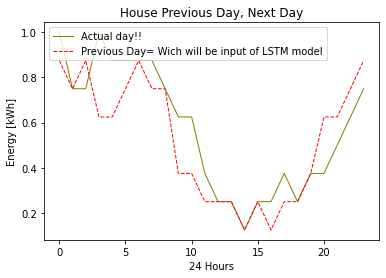

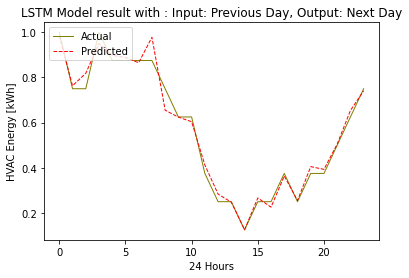

2021-02-26
 
 


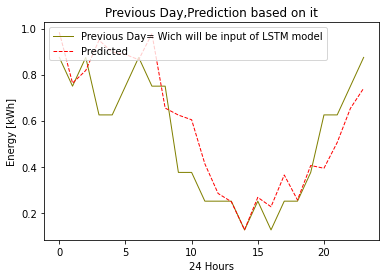

 
 
plot_act inversed:
[[8.]
 [6.]
 [6.]
 [8.]
 [7.]
 [7.]
 [7.]
 [7.]
 [6.]
 [5.]
 [5.]
 [3.]
 [2.]
 [2.]
 [1.]
 [2.]
 [2.]
 [3.]
 [2.]
 [3.]
 [3.]
 [4.]
 [5.]
 [6.]]
plot_act orginal (cheking inverse)
data_time
2021-02-26 00:00:00    8.0
2021-02-26 01:00:00    6.0
2021-02-26 02:00:00    6.0
2021-02-26 03:00:00    8.0
2021-02-26 04:00:00    7.0
2021-02-26 05:00:00    7.0
2021-02-26 06:00:00    7.0
2021-02-26 07:00:00    7.0
2021-02-26 08:00:00    6.0
2021-02-26 09:00:00    5.0
2021-02-26 10:00:00    5.0
2021-02-26 11:00:00    3.0
2021-02-26 12:00:00    2.0
2021-02-26 13:00:00    2.0
2021-02-26 14:00:00    1.0
2021-02-26 15:00:00    2.0
2021-02-26 16:00:00    2.0
2021-02-26 17:00:00    3.0
2021-02-26 18:00:00    2.0
2021-02-26 19:00:00    3.0
2021-02-26 20:00:00    3.0
2021-02-26 21:00:00    4.0
2021-02-26 22:00:00    5.0
2021-02-26 23:00:00    6.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[0.98436576 0.7631763  0.81813365 0.9498773  0.89796853 0.8876643

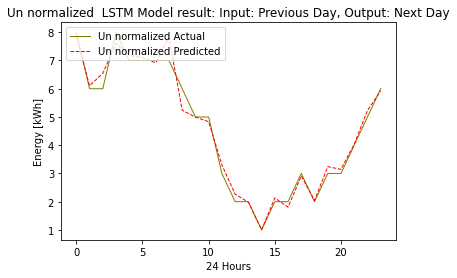

  
  
  
  
  
  
  
  
  
 data.shape  for new prediction
(2952, 6)
  
  
Previous Day : input 
[1.    0.75  0.75  1.    0.875 0.875 0.875 0.875 0.75  0.625 0.625 0.375
 0.25  0.25  0.125 0.25  0.25  0.375 0.25  0.375 0.375 0.5   0.625 0.75 ]
  
  
exact before put in the model 
[[[1.   ]
  [0.75 ]
  [0.75 ]
  [1.   ]
  [0.875]
  [0.875]
  [0.875]
  [0.875]
  [0.75 ]
  [0.625]
  [0.625]
  [0.375]
  [0.25 ]
  [0.25 ]
  [0.125]
  [0.25 ]
  [0.25 ]
  [0.375]
  [0.25 ]
  [0.375]
  [0.375]
  [0.5  ]
  [0.625]
  [0.75 ]]]
(1, 24, 1)
<class 'tuple'>
  
Actual day normalized:
[0.75  0.75  0.75  0.875 0.875 0.875 0.875 0.875 0.75  0.625 0.625 0.25
 0.375 0.125 0.125 0.    0.125 0.125 0.125 0.375 0.375 0.5   0.375 0.625]
  
test day i = 61
2021-02-27
 
 


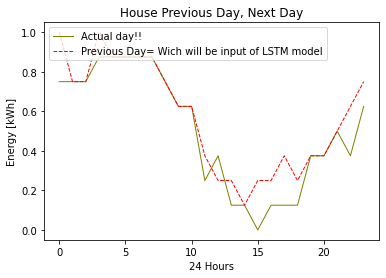

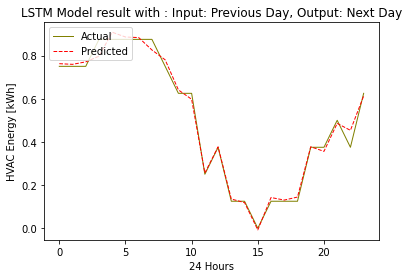

2021-02-27
 
 


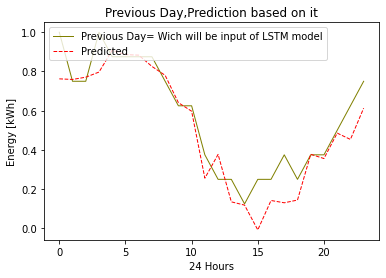

 
 
plot_act inversed:
[[6.]
 [6.]
 [6.]
 [7.]
 [7.]
 [7.]
 [7.]
 [7.]
 [6.]
 [5.]
 [5.]
 [2.]
 [3.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [3.]
 [3.]
 [4.]
 [3.]
 [5.]]
plot_act orginal (cheking inverse)
data_time
2021-02-27 00:00:00    6.0
2021-02-27 01:00:00    6.0
2021-02-27 02:00:00    6.0
2021-02-27 03:00:00    7.0
2021-02-27 04:00:00    7.0
2021-02-27 05:00:00    7.0
2021-02-27 06:00:00    7.0
2021-02-27 07:00:00    7.0
2021-02-27 08:00:00    6.0
2021-02-27 09:00:00    5.0
2021-02-27 10:00:00    5.0
2021-02-27 11:00:00    2.0
2021-02-27 12:00:00    3.0
2021-02-27 13:00:00    1.0
2021-02-27 14:00:00    1.0
2021-02-27 15:00:00    0.0
2021-02-27 16:00:00    1.0
2021-02-27 17:00:00    1.0
2021-02-27 18:00:00    1.0
2021-02-27 19:00:00    3.0
2021-02-27 20:00:00    3.0
2021-02-27 21:00:00    4.0
2021-02-27 22:00:00    3.0
2021-02-27 23:00:00    5.0
Name: House_1_HVAC_energy_real, dtype: float64
 
 
predicted normalized:
[[ 0.76237816  0.7593194   0.77076465  0.7969673   0.90799975  0.8

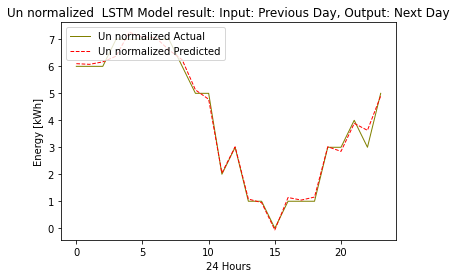

actuals 
(62, 24, 1)
predictions
(62, 24, 1)
#########################################################################
#################evaluate_forecasts_MAPE##########################################
 
mape
6.576778342097586
mape
6.6557702994383225
mape
6.335671478152825
mape
5.4014549762605695
mape
6.418526258703018
mape
7.15754679271153
mape
6.710064033941923
mape
8.77961473073095
mape
9.246408241685087
mape
7.404473923867748
mape
11.445584207452754
mape
12.118402187542248
mape
17.566332237053942
mape
20.132873419632194
mape
23.950030991146644
mape
19.412842448500374
mape
18.025719467049804
mape
20.33231405601386
mape
11.33381676289343
mape
13.362202464893299
mape
11.969762688042014
mape
9.836051079534716
mape
8.74514224708721
mape
7.97603460409308
RMSE　Result
lstm_RMSEs: [0.3734274993292278, 0.39730990973965125, 0.35197231018113617, 0.33843603081979245, 0.41361972125149726, 0.562800549345728, 0.3949212827842813, 0.5270302318323868, 0.592127568826524, 0.3674514769017164, 0.46798104

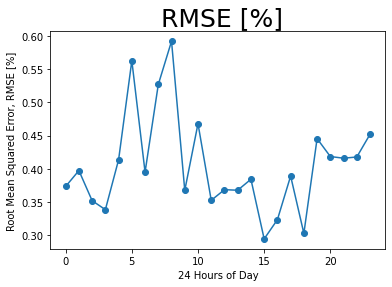

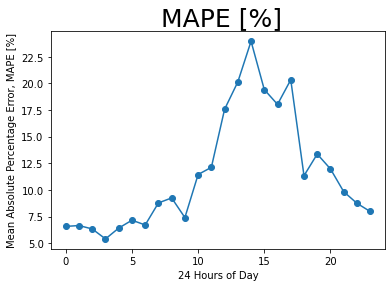

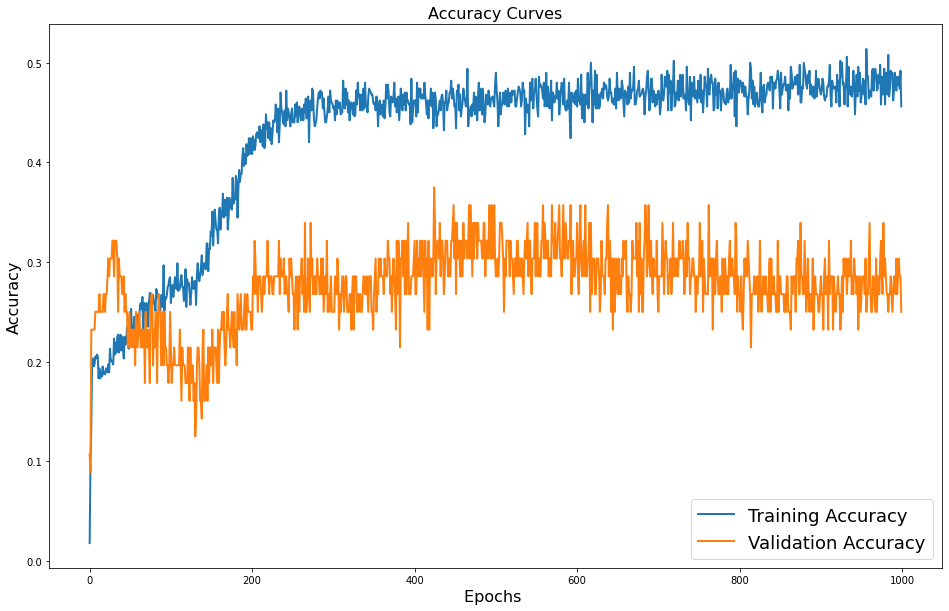

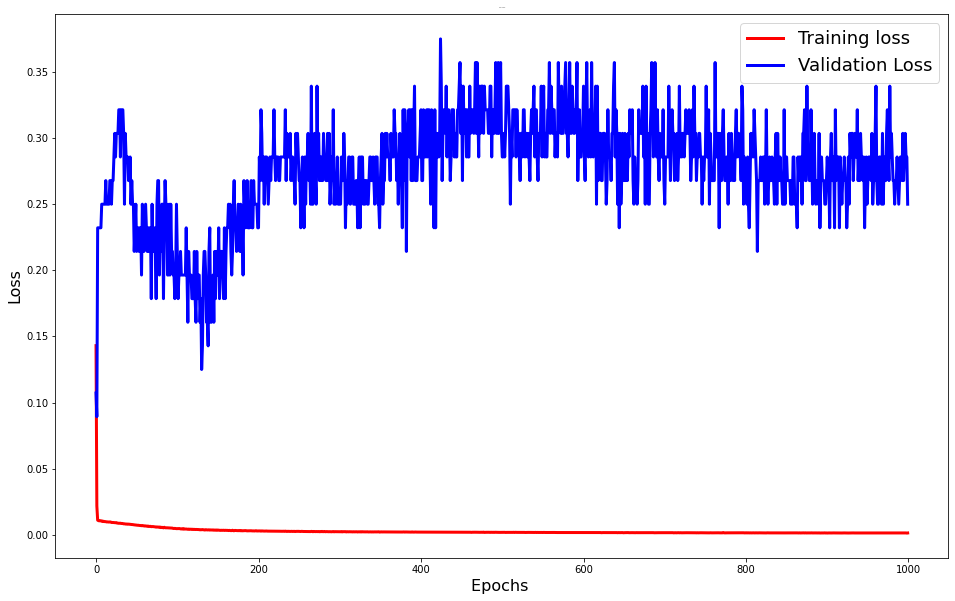

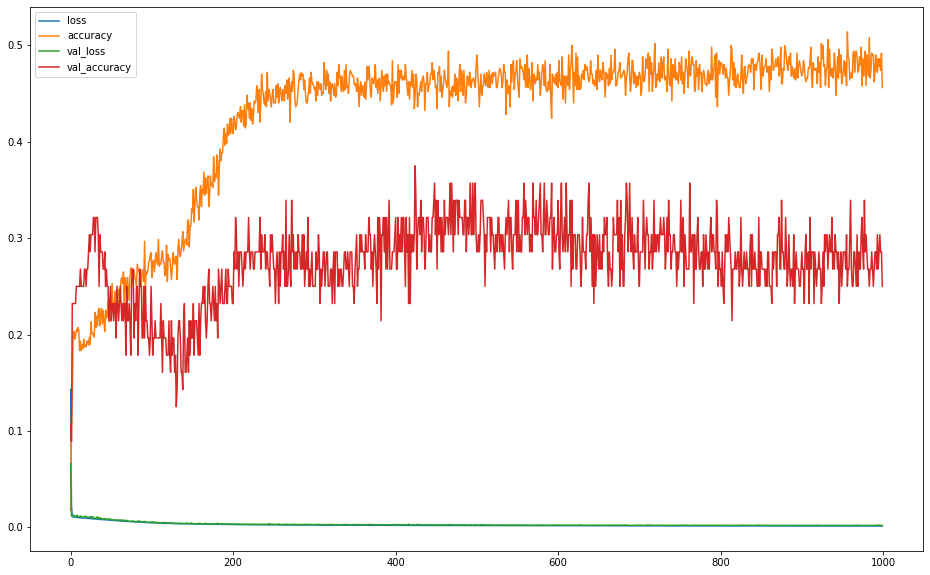

 
 
#########################################################################
########################Summary of Updated_model #######################
#########################################################################
 
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 24, 72)            21312     
                                                                 
 dropout_1 (Dropout)         (None, 24, 72)            0         
                                                                 
 lstm_3 (LSTM)               (None, 36)                15696     
                                                                 
 dense_2 (Dense)             (None, 96)                3552      
                                                                 
 dense_3 (Dense)             (None, 24)                2328      
                         

In [ ]:
verbose=1
################################################################################################
LOSS ="mse"
epochs=1000
batch_size=24
lr=0.001
patience=135
OPTIMIZER="RMSprop"
################################################################################################

list_activation=['tanh']
list_activation_rec=['relu']

Model_iteration=0
for act_sel in list_activation:
  for Num_LSTM_output_space in [72]:###### dimention##
    for rec_act_sel in list_activation_rec:#### recurrent_activation="sigmoid", activation="tanh",
      for Dropout_level in [0.2]:
        for recurrent_dropout_level in [0.4]:
          for Dense_output in [96]:#
              ################################################################################################
              ################################################################################################
              version='U3_V10_House1_Feb_06_13_2022_save_best_only=False_'
              version+="LOSS="+str(LOSS)+"_"
              version+="epochs="+str(epochs)+"_"
              version+="batchSize="+str(batch_size)+"_"
              version+="lr="+str(lr)+"_"
              version+="patience="+str(patience)+"_"
              version+="OPTIMIZER="+str(OPTIMIZER)+"_"
              version+="Activation="+str(act_sel)+"_"
              version+="LSTMOutputSpace="+str(Num_LSTM_output_space)+"_"
              version+="RecurrentActivation="+str(rec_act_sel)+"_"
              version+="Dropout="+str(Dropout_level)+"_"
              version+="RecurrentDropout="+str(recurrent_dropout_level)+"_"
              version+="DenseOutput="+str(Dense_output)
              print(" ")
              print("version =",version)
              print(" ")
              print(" ")
              Model_iteration=Model_iteration+1
              print("Model_iteration =", Model_iteration)
              print(" ")
              ####Define some hyper plane
              print(" ")
              print("################################################################")
              print("################# Run ##########################################")
              print("################################################################")
              print(" ")
              score_MAPE, scores_MAPE, score_RMSE,scores_RMSE,network_history= evaluate_model(train, test, n_input, min_max_scaler,version,epochs,batch_size,lr,patience,verbose,LOSS,OPTIMIZER,act_sel,Num_LSTM_output_space,rec_act_sel,Dropout_level,Dense_output,recurrent_dropout_level,List_testDates_D,test_HVAC_energy_H_UN_Normalized)
              summarize_scores(score_MAPE, scores_MAPE, score_RMSE,scores_RMSE)
              ##### making a list form results
              loss_s_Dec.append(network_history.history['loss'])
              accuracy_s_Dec.append(network_history.history['accuracy'])
              val_loss_s_Dec.append(network_history.history['val_loss'])
              val_accuracy_s_Dec.append(network_history.history['val_accuracy'])
              loss_s_Dec.append(network_history.history['loss'])
              accuracy_s_Dec.append(network_history.history['accuracy'])
              val_loss_s_Dec.append(network_history.history['val_loss'])
              val_accuracy_s_Dec.append(network_history.history['val_accuracy'])
              scores_RMSE_Dec_list.append(scores_RMSE)
              score_RMSE_Dec_list.append(score_RMSE)
              scores_MAPE_Dec_list.append(scores_MAPE)
              score_MAPE_Dec_list.append(score_MAPE)
              EPOCH = network_history.epoch
              print(" ")
              print("#########################################################################")
              print("################# final figures ##########################################")
              print("#########################################################################")
              print(" ")
              plt.title(' RMSE [%]',fontsize=25)
              # plot scores
              hours = list(range(0, 24))
              plt.plot(hours, scores_RMSE, marker='o', label='lstm_RMSEs')
              #plt.title('LSTM Model Performance Evaluation')
              plt.xlabel('24 Hours of Day')
              #plt.ylabel('Root Mean Squared Error, RMSE [kWh]')
              plt.ylabel('Root Mean Squared Error, RMSE [%]')
              #plt.legend(loc="upper left")
              plt.savefig('RMSE'+ version +'.png')
              plt.show()
              print(" ")
              print(" ")

              ###############################*****************************************###############################*****************************************
              plt.title(' MAPE [%]',fontsize=25)
              # plot scores
              hours = list(range(0, 24))
              plt.plot(hours, scores_MAPE, marker='o', label='lstm_MAPEs')
              #plt.title('LSTM Model Performance Evaluation')
              plt.xlabel('24 Hours of Day')
              #plt.ylabel('Root Mean Squared Error, RMSE [kWh]')
              plt.ylabel('Mean Absolute Percentage Error, MAPE [%]')
              #plt.legend(loc="upper left")
              plt.savefig('MAPE'+ version +'.png')
              plt.show()
              print(" ")
              print(" ")

              ###############################*****************************************###############################*****************************************

              plt.figure(figsize=[16,10])
              plt.plot(EPOCH,network_history.history['accuracy'],linewidth=2.0)
              plt.plot(EPOCH,network_history.history['val_accuracy'],linewidth=2.0)
              plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
              plt.xlabel('Epochs ',fontsize=16)
              plt.ylabel('Accuracy',fontsize=16)
              plt.title('Accuracy Curves',fontsize=16)
              plt.savefig('Accuracy_Curves'+ version +'.png')
              plt.show()
              print(" ")
              print(" ")

              ###############################*****************************************###############################*****************************************
              plt.figure(figsize=[16,10])
              plt.plot(EPOCH, network_history.history['loss'],'r',linewidth=3.0)
              plt.plot(EPOCH, network_history.history['val_accuracy'],'b',linewidth=3.0)
              plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
              plt.xlabel('Epochs ',fontsize=16)
              plt.ylabel('Loss',fontsize=16)
              plt.title('Loss Curves',fontsize=1)
              plt.savefig('Loss_Curves'+ version +'.png')
              plt.show()
              print(" ")
              print(" ")

              ###############################*****************************************###############################*****************************************
              pd.DataFrame(network_history.history).plot(figsize=(16,10))#plt.figure(figsize=[16,10])
              plt.savefig('All'+ version +'.png')
              #files.download('All'+ version +'.png')
              plt.show()


              print(" ")
              print(" ")
              print("#########################################################################")
              print("########################Summary of Updated_model #######################")
              print("#########################################################################")
              print(" ")
              Savnig_Link='/content/drive/MyDrive/Colab Notebooks/GridlabD_LSTM_1/Results_House1/'+ version +'.hdf5'
              Updated_model=keras.models.load_model(Savnig_Link)
              print(Updated_model.summary())
              print(" ")

              '''
              for keys in Dec_network_history.history.keys() :
                  print("key = {}".format(keys))
              print(" ")

              loss=network_history.history['loss']
              print(loss)

              for value in Dec_network_history.history.values() :
                  print("value = {}".format(value))


              table=pd.DataFrame(columns=["Name","Type","input_shape","output_shape","losses"])
              for layer in Updated_model.layers:
                print(layer.get_config())
                table = table.append({"Name":layer.name, "Type": layer.class.name,"input_shape":layer.input_shape,"output_shape":layer.output_shape,"losses":layer.losses}, ignore_index=True)
              table
              '''

print(" ")
print("Model_iteration =", Model_iteration)
print(" ")

In [ ]:
loss_s_Dec
with open("loss_"+ version +"_"+".txt", "w") as f:
    for s in loss_s_Dec:
        f.write(str(s) +"\n")

#score = []
#with open("file.txt", "r") as f:
#  for line in f:
#    score.append(int(line.strip()))

accuracy_s_Dec
with open("accuracy_"+ version +"_" +".txt", "w") as f:
    for s in accuracy_s_Dec:
        f.write(str(s) +"\n")

val_loss_s_Dec
with open("val_loss_"+ version +"_" +".txt", "w") as f:
    for s in val_loss_s_Dec:
        f.write(str(s) +"\n")

val_accuracy_s_Dec
with open("val_accuracy_"+ version +"_" +".txt", "w") as f:
    for s in val_accuracy_s_Dec:
        f.write(str(s) +"\n")

scores_RMSE_Dec_list
with open("scores_RMSE_"+ version +"_"+".txt", "w") as f:
    for s in scores_RMSE_Dec_list:
        f.write(str(s) +"\n")


score_RMSE_Dec_list
with open("score_RMSE_"+ version +"_" +".txt", "w") as f:
    for s in score_RMSE_Dec_list:
        f.write(str(s) +"\n")


scores_MAPE_Dec_list
with open("scores_MAPE_"+ version +"_" +".txt", "w") as f:
    for s in scores_MAPE_Dec_list:
        f.write(str(s) +"\n")


score_MAPE_Dec_list
with open("score_MAPE_"+ version +"_" +".txt", "w") as f:
    for s in score_MAPE_Dec_list:
        f.write(str(s) +"\n")

Model_iteration_list
with open("Model_iteration_list"+".txt", "w") as f:
    for s in Model_iteration_list:
        f.write(str(s) +"\n")
############################################################################
############################################################################


zip_iterator = zip(Model_iteration_list, accuracy_s_Dec)
Dict_accuracy_s_Dec_Adamax_175 = dict(zip_iterator)

zip_iterator = zip(Model_iteration_list, loss_s_Dec)
Dict_loss_s_Dec_Adamax_175 = dict(zip_iterator)

zip_iterator = zip(Model_iteration_list, val_loss_s_Dec)
Dict_val_loss_s_Dec_Adamax_175 = dict(zip_iterator)

zip_iterator = zip(Model_iteration_list, val_accuracy_s_Dec)
Dict_val_accuracy_s_Dec_Adamax_175 = dict(zip_iterator)

zip_iterator = zip(Model_iteration_list, scores_RMSE_Dec_list)
Dict_scores_RMSE_Dec_Adamax_175_list = dict(zip_iterator)

zip_iterator = zip(Model_iteration_list, score_RMSE_Dec_list)
Dict_score_RMSE_Dec_Adamax_175_list = dict(zip_iterator)

zip_iterator = zip(Model_iteration_list, scores_MAPE_Dec_list)
Dict_scores_MAPE_Dec_Adamax_175_list = dict(zip_iterator)

zip_iterator = zip(Model_iteration_list, score_MAPE_Dec_list)
Dict_score_MAPE_Dec_Adamax_175_list = dict(zip_iterator)




###Result

In [ ]:
ls

len(RMSE_Dec_list35) =  1
len(MAPE_Dec_list35) =  1


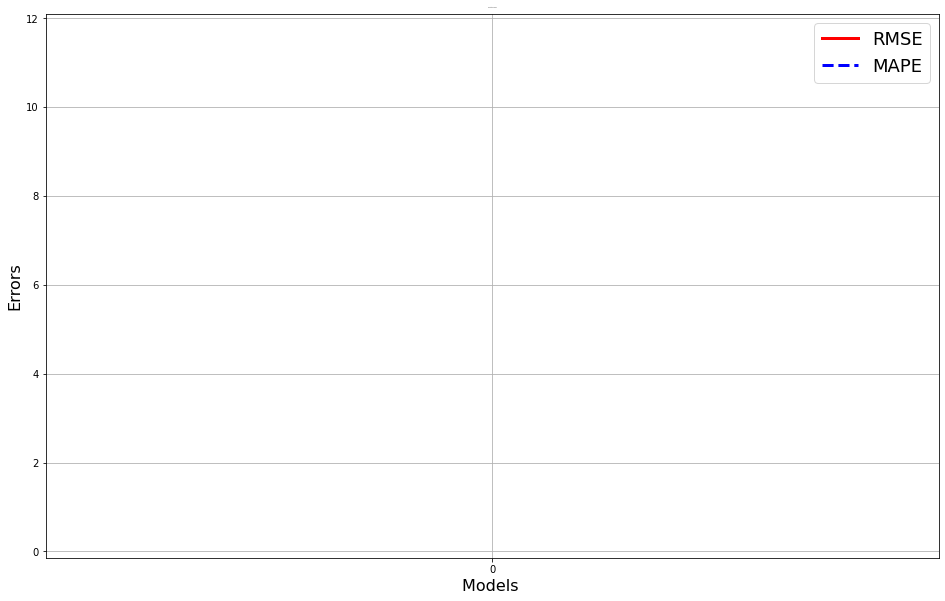

In [ ]:
RMSE_Dec_list35 = []
numberInList=1
with open("score_RMSE_"+ version +"_.txt", "r") as f:
  for line in f:
    #print(line.strip())
    #if (numberInList>70):
      RMSE_Dec_list35.append(float((line.strip())))
      numberInList=numberInList+1

#print(score)
print("len(RMSE_Dec_list35) = ",len(RMSE_Dec_list35))

NumberOfiteration = list(range(0, len(RMSE_Dec_list35)))


########################################################################################################################################################
MAPE_Dec_list35 = []
numberInList=1
with open("score_MAPE_"+ version +"_.txt", "r") as f:
  for line in f:
    #print(line.strip())
    #if (numberInList>70):
      MAPE_Dec_list35.append(float((line.strip())))
      numberInList=numberInList+1

#print(score)
print("len(MAPE_Dec_list35) = ",len(MAPE_Dec_list35))
NumberOfiteration = list(range(0, len(MAPE_Dec_list35)))

############################################################################################################################################################
plt.figure(figsize=[16,10])
plt.plot(NumberOfiteration, RMSE_Dec_list35,'r',linewidth=3.0)
plt.plot(NumberOfiteration, MAPE_Dec_list35,'b',linewidth=3.0, linestyle='dashed')
plt.legend(['RMSE', 'MAPE'],fontsize=18)
plt.xlabel('Models ',fontsize=16)
plt.ylabel('Errors',fontsize=16)
#plt.yticks(np.arange(MAPE_Dec_list35[1]-1, RMSE_Dec_list35[0]+.5, 0.2))
plt.xticks(NumberOfiteration)
plt.title('Evalution Curves',fontsize=1)
plt.savefig('Com'+ version +'.png')
plt.grid()
plt.show()
print(" ")
print(" ")

In [ ]:
RMSE_Dec_list35

[0.4115191280306348]

In [ ]:
MAPE_Dec_list35

[11.537225747438546]

In [ ]:
accuracy_Dec_list35 = []
numberInList=1
with open("accuracy_"+ version +"_.txt", "r") as f:
  for line in f:
    #print(line.strip())
    #if (numberInList>70):
      accuracy_Dec_list35.append((line.strip()))
      numberInList=numberInList+1

#print(score)
print("len(accuracy_Dec_list35) = ",len(accuracy_Dec_list35))

NumberOfiteration_accuracy = list(range(0, len(accuracy_Dec_list35)))

len(accuracy_Dec_list35) =  2


In [ ]:
## txt to array
accuracy_Dec_list35[0]=np.array(eval(accuracy_Dec_list35[0].replace(' ','')))
accuracy_Dec_list35[1]=np.array(eval(accuracy_Dec_list35[1].replace(' ','')))




In [ ]:
accuracy_Dec_list35[0]=accuracy_Dec_list35[0]*100
accuracy_Dec_list35[1]=accuracy_Dec_list35[1]*100




In [ ]:
print("len(accuracy_Dec_list35[0]) = ",len(accuracy_Dec_list35[0]))
print("len(accuracy_Dec_list35[1]) = ",len(accuracy_Dec_list35[1]))



NumberOfiteration_accuracy_1 = list(range(0, len(accuracy_Dec_list35[1])))
NumberOfiteration_accuracy = list(range(0, len(accuracy_Dec_list35[0])))

len(accuracy_Dec_list35[0]) =  1000
len(accuracy_Dec_list35[1]) =  1000


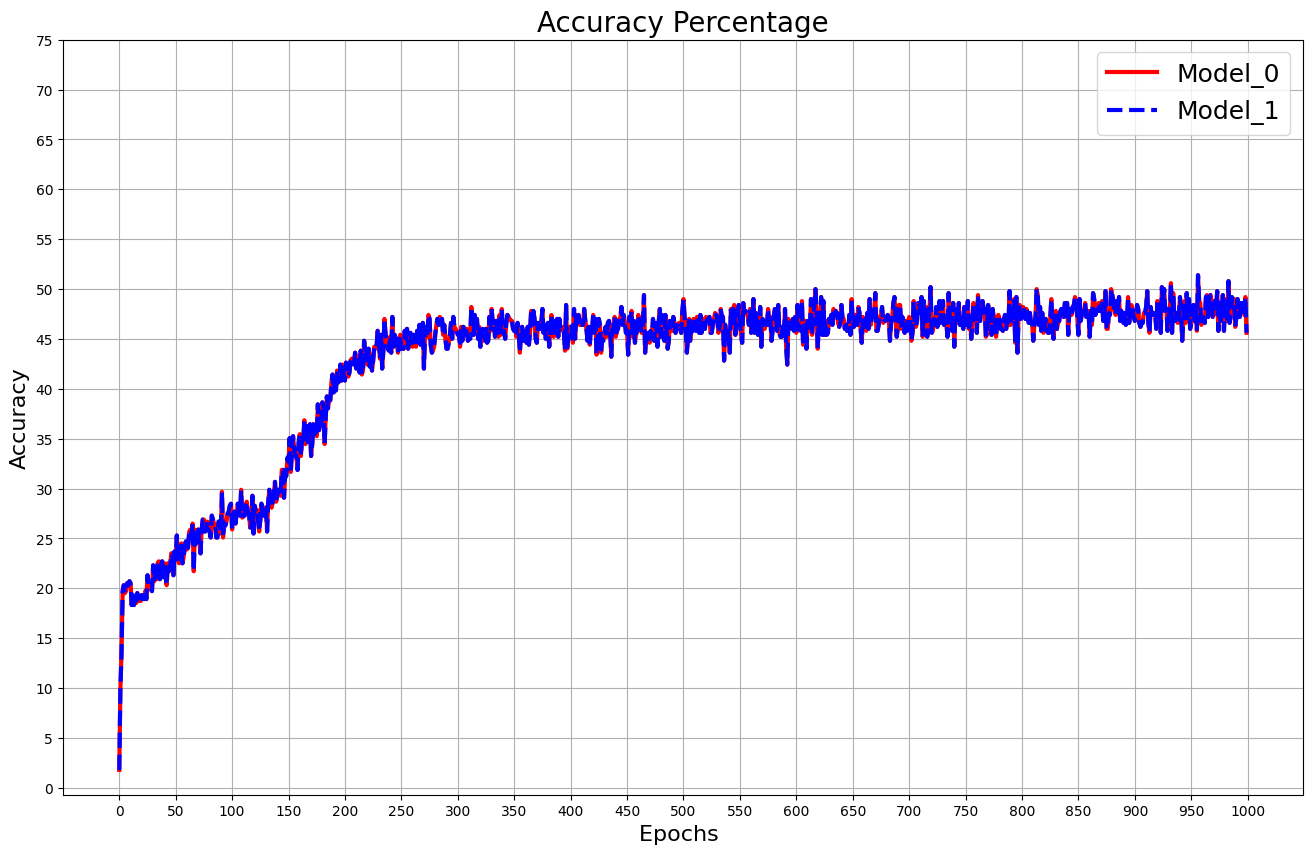

In [ ]:
plt.figure(figsize=[16,10], frameon=False, dpi=100)
plt.plot(NumberOfiteration_accuracy_1, accuracy_Dec_list35[0],'r',linewidth=3.0)
plt.plot(NumberOfiteration_accuracy, accuracy_Dec_list35[1],'b',linewidth=3.0, linestyle='dashed')


plt.legend(['Model_0', 'Model_1'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
#plt.yticks(np.arange(0, RMSE_Dec_list35[100]+5, 5))
plt.yticks(np.arange(0,80, 5))

#plt.xticks(NumberOfiteration)
plt.xticks(np.arange(0,1050, 50))

plt.title('Accuracy Percentage',fontsize=20)
plt.savefig('Com_Acc'+ version +'.png')
plt.grid()
plt.show()
print(" ")
print(" ")



In [ ]:
val_accuracy_Dec_list35 = []
numberInList=1
with open("val_accuracy_"+ version +"_.txt", "r") as f:
  for line in f:
    #print(line.strip())
    #if (numberInList>70):
      val_accuracy_Dec_list35.append((line.strip()))
      numberInList=numberInList+1

#print(score)
print("len(val_accuracy_Dec_list35) = ",len(val_accuracy_Dec_list35))

len(val_accuracy_Dec_list35) =  2


In [ ]:
## txt to array
val_accuracy_Dec_list35[0]=np.array(eval(val_accuracy_Dec_list35[0].replace(' ','')))
val_accuracy_Dec_list35[1]=np.array(eval(val_accuracy_Dec_list35[1].replace(' ','')))



In [ ]:
val_accuracy_Dec_list35[0]=val_accuracy_Dec_list35[0]*100
val_accuracy_Dec_list35[1]=val_accuracy_Dec_list35[1]*100



In [ ]:
print("len(val_accuracy_Dec_list35[0]) = ",len(val_accuracy_Dec_list35[0]))
print("len(val_accuracy_Dec_list35[1]) = ",len(val_accuracy_Dec_list35[1]))


NumberOfiteration_loss_1 = list(range(0, len(val_accuracy_Dec_list35[1])))
NumberOfiteration_loss= list(range(0, len(val_accuracy_Dec_list35[0])))

len(val_accuracy_Dec_list35[0]) =  1000
len(val_accuracy_Dec_list35[1]) =  1000


In [ ]:
Temp_1=val_accuracy_Dec_list35[0][-20:]
Temp_2=val_accuracy_Dec_list35[1][-20:]

print(Temp_1)
print(Temp_2)

Val_Accuracy_1_Aug=sum(Temp_1)/len(Temp_1)
Val_Accuracy_2_Aug=sum(Temp_2)/len(Temp_1)
print(" ")
print(" ")
print(Val_Accuracy_1_Aug)
print(Val_Accuracy_2_Aug)

[28.57142985 26.78571343 26.78571343 25.         26.78571343 26.78571343
 28.57142985 26.78571343 25.         26.78571343 28.57142985 28.57142985
 26.78571343 30.35714328 26.78571343 28.57142985 30.35714328 28.57142985
 28.57142985 25.        ]
[28.57142985 26.78571343 26.78571343 25.         26.78571343 26.78571343
 28.57142985 26.78571343 25.         26.78571343 28.57142985 28.57142985
 26.78571343 30.35714328 26.78571343 28.57142985 30.35714328 28.57142985
 28.57142985 25.        ]
 
 
27.500000149011612
27.500000149011612


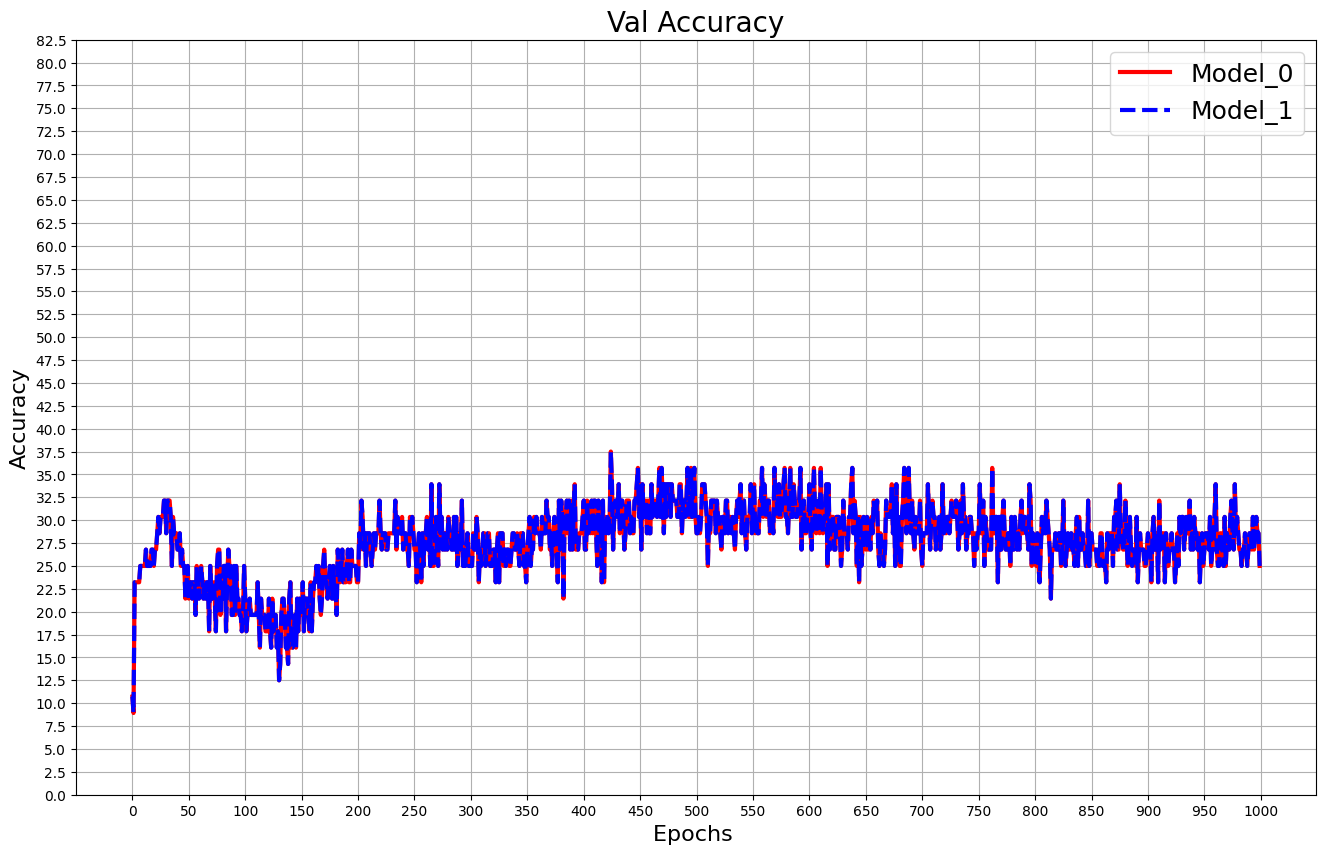

In [ ]:
plt.figure(figsize=[16,10], frameon=False, dpi=100)
plt.plot(NumberOfiteration_loss_1, val_accuracy_Dec_list35[0],'r',linewidth=3.0)
plt.plot(NumberOfiteration_loss, val_accuracy_Dec_list35[1],'b',linewidth=3.0, linestyle='dashed')



plt.legend(['Model_0', 'Model_1', 'Model_2', 'Model_3'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.yticks(np.arange(0,85, 2.5))

plt.xticks(np.arange(0,1050, 50))

plt.title('Val Accuracy',fontsize=20)
plt.savefig('Val_Accuracy'+ version +'.png')
plt.grid()
plt.show()
print(" ")
print(" ")

